In [1]:
#
# This script is used to:
# 1) Calculate the distribution of the strength of the nonlinear lenses 
#    inside the nonlinear insertion;
# 2) Plot dependence of strength 't' of the central lens of nonlinear 
#    insertion lens on parameter 'knll' of this lens.
# 
# Script will be used as corresponding part of the script 
#      variabledNLsimulation_v2.py 
# to simulate IOTA ring with possibility to update the strength of the
# nonlinear lenses 'in-fly' of simulation
#
# Version 0, Yury Eidelman, 07/11/2019
#
import os, sys
import numpy as np
import inspect
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec

def printAttributes(object,name,title):
#
# List of all attributes of 'object' for checking:
#
    attrList = inspect.getmembers(object)
    strTitle = "\nattrList ("+name+" = "+title+"):\n{}\n"
    print strTitle.format(attrList)

def plotParamLens(s_center,knll,cnll,title0,title1):
    knll_plot = np.zeros(len(knll))
    for n in range(len(knll)):
        knll_plot[n]=1.e6*knll[n]
# Another way - use gridspec
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
    
    ax0 = plt.subplot(gs[0])
    plt.plot(s_center,knll_plot,'-x',color='r')
    ax0.set_xlabel('s, m')
    ax0.set_ylabel('10^6 * knll, m')
    ax0.set_title(title0,color='m',fontsize=14)
    ax0.grid(True)

    ax1 = plt.subplot(gs[1])
    plt.plot(s_center,cnll,'-x',color='r')
    ax1.set_xlabel('s, m')
    ax1.set_ylabel('cnll, m^1/2')
    ax1.set_title(title1,color='m',fontsize=14)
    ax1.grid(True)
       
    fig.tight_layout()
    plt.show()
    return

class NonlinearInsertion(object):
  
    # Generation of the nonlinear lenses as set of segments of the nonlinear insertion
    #
    # Source: 
    #   1) Nonlinear Accelerator Lattices with One and Two Analytic Invariants.
    #      V. Danilov and S. Nagaitsev. Phys. Rev. ST Accel. Beams 13, 084002 (2010);
    #      https://journals.aps.org/prab/pdf/10.1103/PhysRevSTAB.13.084002.  
    #   2) Complex Representation of Potentials and Fields for the Nonlinear 
    #      Magnetic Insert of the Integrable Optics Test Accelerator.
    #      Chad Mitchell. March 2017; https://esholarship.org/uc/item/7dt4t236.
    #   3) Madx CERN User Guide. Chapter 10.10 - Nonlinear Lens with Elliptical Potential.
    #      http://mad.web.cern.ch/mad/
    #
    # Input attributes:
    #   length:     the length of the nonlinear inserttion (float, m);
    #   phase:      the phase advance modulo 2pi through the nonlinear insertion;
    #   t:          the nonlinear strength parameter (float, dimensionless, defaults to 0.1);
    #   c:          the nonlinear aperture parameter (float, m^1/2, is defined by poles in the x-axis,
    #               defaults to 0.01);
    #   num_lens:   the number of lonlinear lenses as  an parts of the nonlinear insertion (int, 
    #               defaults to 18).
    #   
    # Output attributes:
    #   s_vals (ndArray): coordinates of the center of each nonlinear lens (float ndArray, m);
    #   knll (ndArray):   "strength" of each nonlinear lens (float ndArray, m);
    #   cnll (ndArray):   aperture parameters for each nonlinear lens (float ndArray, m^1/2).
    #   
    def __init__(self, length, phase, t = 0.1, c = 0.01, num_lens = 20):
        print "Input data:\nlength = ",length,", phase = ",phase,", t = ",t, \
            ", c = ",c,", num_lens = ",num_lens
        self.length = length
        self.phase = phase
        self.t = t
        self._c = c
        self.num_lens = num_lens
# Aperture parameter c must be positive:
    @property
    def c(self):
        return self._c
    @c.setter
    def c(self, cval):
        if cval < 0:
            raise ValueError("Aperture parameter c must be positive")     
        self._c = c

    def generate_lens(self,flag):
        indxShift = num_lens-2*((num_lens+1)/2)+1
# Focal length f0 of the insertion (m):
        f0 = self.length/4.0*(1.0+1.0/np.tan(np.pi*self.phase)**2)
        print "f0 = ",f0
# Coordinates s_vals of the center of each nonlinear lens (m):
        first_lens = .5*(self.length/self.num_lens)
        last_lens = self.length - first_lens
        s_vals = np.linspace(first_lens,last_lens,self.num_lens) 
        self.s_vals = s_vals
        
# Set of rge strucrural beta-function of nonlinear magnet (m):
        beta_n = self.length*(1.-s_vals*(self.length-s_vals)/self.length/f0)/np.sqrt(1.0-(1.0-self.length/2.0/f0)**2)
#        self.betas = beta_n
        
        cnll = self.c*np.sqrt(beta_n)

        knn = self.t*self.length/self.num_lens/beta_n**2
        knll = knn*cnll**2
# Sequence of lenses start from the minimal value of knll:
        self.cnll = cnll
        self.knll = knll
# Sequence of lenses start from the maximal value of knll:
        if flag == 2:
            cnll_help = []
            knll_help = []
            indMax = 0
            for n in range(num_lens-1):
                if knll[n] < knll[n+1]:
                    indMax = n+1
                else:
                    break
            print "indMax = ",indMax
            for n in range (num_lens):
                if n <= indMax:
                    cnll_help.append(float(cnll[indMax-n]))
                    knll_help.append(float(knll[indMax-n]))
                else:
                    cnll_help.append(float(cnll[n-indMax-indxShift]))
                    knll_help.append(float(knll[n-indMax-indxShift]))
            self.cnll = cnll_help
            self.knll = knll_help
        return self
        
def validate_lens(self, beta_values):
#
# Method to valdate parameters of the nonlinear lens from method
# 'generate_lens', using approach from S. Romanov MADX-structure
# of the IOTA ring.
#
    return

# Verifying of the script:    
l0 = 1.8
mu0 = .3
cval = .01
tval = .4
num_lens = 18

#-------- Only for checking: ------------
# insertionNL  = NonlinearInsertion(l0, mu0, tval, cval, num_lens)
# To recognize attributes of 'insertionNL':
# printAttributes(insertionNL,'insertionNL','NonlinearInsertion(l0, mu0, cval, tval)')
# dataInsertion = insertionNL.generate_lens()
# To recognize attributes of '':
# printAttributes(dataInsertion,'dataInsertion','insertionNL.generate_lens()')
#-------End of checking -------------

dataInsertion = NonlinearInsertion(l0, mu0, tval, cval, num_lens).generate_lens(1)
coords_lens = dataInsertion.s_vals
knll_lens = dataInsertion.knll
cnll_lens = dataInsertion.cnll
print "Output data:"
print "coords_lens = ",coords_lens
print "knll_lens = ",knll_lens
print "cnll_lens = ",cnll_lens

title = "Nonlinear Insertion: L={:.3f} m, phase= {:.2f}, t={:.2f}, c={:.2f} m^1/2".format(l0,mu0,tval,cval)
print "title = ",title
plotParamLens(coords_lens,knll_lens,cnll_lens,title,title)

#
# Result shows, that input value 'tval' strength ('knll') of the set of lenses corresponds to the
# central lens(es) of nonlinear insertion!
#

#
# "Reverse" dependence dimensionless strength 'tval' of nonlinear central lens on 
# parameter 'knll' of this lens
#
nPoints = 50
knll = np.zeros(nPoints)
t = np.zeros(nPoints)
knll_logMin = math.log10(1.e-7)
knll_logMax = math.log10(1.e-4)

l0 = 1.8
mu0 = .3
cval = .01
num_lens = 20

# Focal length f0 of the insertion (m):
f0 = l0/4.0*(1.0+1.0/np.tan(np.pi*mu0)**2)
print "f0 = ",f0," m"

# Coordinates of the center of the nonlinear lenses in the nonlinear inserion (m):
first_lens_center = .5*(l0/num_lens)
last_lens_center = l0 - first_lens_center
s_vals = np.linspace(first_lens_center,last_lens_center,num_lens) 
print "s_val =",s_vals        
# Coordinate of the center of the nonlinear lens in the middle of nonlinear inserion (m):
s_center = s_vals[(num_lens+1)/2]
# Structural beta-function of the nonlinear magnet in the middle of nonlinear inserion (m):
beta_center = l0*(1.-s_center*(l0-s_center)/l0/f0)/np.sqrt(1.0-(1.0-l0/2.0/f0)**2)
cnll_center = cval*np.sqrt(beta_center)
print "s_center = ",s_center," m, beta_center = ",beta_center," m, cnll_center = ",cnll_center," m"

for n in range(nPoints):
    knll_log10 = knll_logMin + n*(knll_logMax - knll_logMin)/nPoints
    knll[n] = math.pow(10.,knll_log10)
    t[n] = knll[n]*beta_center**2/(l0/num_lens*cnll_center**2)
    
fig_10 = plt.figure(figsize=(15,5))
gs_10 = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
    
ax_10 = plt.subplot(gs_10[0])
# plt.semilogx(knll,t,'-x',color='r')
plt.loglog(knll,t,'-x',color='r')
ax_10.set_xlabel('knnl, m',color='m',fontsize=14)
ax_10.set_ylabel('Srength Parameter of Central Lens, t',color='m',fontsize=14)

# start, end = ax_10.get_xlim()
# ax_10.xaxis.set_ticks(np.arange(start, end, (end-start)/30))

title_t = "Nonlinear Insertion ({} Lenses): L={:.3f} m, phase={:.2f}, c={:.2f} m^1/2". \
          format(num_lens, l0, mu0, cval)
ax_10.set_title(title_t,color='m',fontsize=14)
ax_10.grid(True)

fig_10.tight_layout()
plt.show()
    
#
# This script is used to:
# 1) Calculate the distribution of the strength of the nonlinear lenses 
#    inside the nonlinear insertion;
# 2) Plot dependence of strength 't' of the central lens of nonlinear 
#    insertion lens on parameter 'knll' of this lens.
# 
# Script will be used as corresponding part of the script 
#      variabledNLsimulation_v2.py 
# to simulate IOTA ring with possibility to update the strength of the
# nonlinear lenses 'in-fly' of simulation
#
# Version 0, Yury Eidelman, 07/11/2019
#
import os, sys
import numpy as np
import inspect
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec

def printAttributes(object,name,title):
#
# List of all attributes of 'object' for checking:
#
    attrList = inspect.getmembers(object)
    strTitle = "\nattrList ("+name+" = "+title+"):\n{}\n"
    print strTitle.format(attrList)

def plotParamLens(s_center,knll,cnll,title0,title1):
    knll_plot = np.zeros(len(knll))
    for n in range(len(knll)):
        knll_plot[n]=1.e6*knll[n]
# Another way - use gridspec
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
    
    ax0 = plt.subplot(gs[0])
    plt.plot(s_center,knll_plot,'-x',color='r')
    ax0.set_xlabel('s, m')
    ax0.set_ylabel('10^6 * knll, m')
    ax0.set_title(title0,color='m',fontsize=14)
    ax0.grid(True)

    ax1 = plt.subplot(gs[1])
    plt.plot(s_center,cnll,'-x',color='r')
    ax1.set_xlabel('s, m')
    ax1.set_ylabel('cnll, m^1/2')
    ax1.set_title(title1,color='m',fontsize=14)
    ax1.grid(True)
       
    fig.tight_layout()
    plt.show()
    return

class NonlinearInsertion(object):
  
    # Generation of the nonlinear lenses as set of segments of the nonlinear insertion
    #
    # Source: 
    #   1) Nonlinear Accelerator Lattices with One and Two Analytic Invariants.
    #      V. Danilov and S. Nagaitsev. Phys. Rev. ST Accel. Beams 13, 084002 (2010);
    #      https://journals.aps.org/prab/pdf/10.1103/PhysRevSTAB.13.084002.  
    #   2) Complex Representation of Potentials and Fields for the Nonlinear 
    #      Magnetic Insert of the Integrable Optics Test Accelerator.
    #      Chad Mitchell. March 2017; https://esholarship.org/uc/item/7dt4t236.
    #   3) Madx CERN User Guide. Chapter 10.10 - Nonlinear Lens with Elliptical Potential.
    #      http://mad.web.cern.ch/mad/
    #
    # Input attributes:
    #   length:     the length of the nonlinear inserttion (float, m);
    #   phase:      the phase advance modulo 2pi through the nonlinear insertion;
    #   t:          the nonlinear strength parameter (float, dimensionless, defaults to 0.1);
    #   c:          the nonlinear aperture parameter (float, m^1/2, is defined by poles in the x-axis,
    #               defaults to 0.01);
    #   num_lens:   the number of lonlinear lenses as  an parts of the nonlinear insertion (int, 
    #               defaults to 18).
    #   
    # Output attributes:
    #   s_vals (ndArray): coordinates of the center of each nonlinear lens (float ndArray, m);
    #   knll (ndArray):   "strength" of each nonlinear lens (float ndArray, m);
    #   cnll (ndArray):   aperture parameters for each nonlinear lens (float ndArray, m^1/2).
    #   
    def __init__(self, length, phase, t = 0.1, c = 0.01, num_lens = 20):
        print "Input data:\nlength = ",length,", phase = ",phase,", t = ",t, \
            ", c = ",c,", num_lens = ",num_lens
        self.length = length
        self.phase = phase
        self.t = t
        self._c = c
        self.num_lens = num_lens
# Aperture parameter c must be positive:
    @property
    def c(self):
        return self._c
    @c.setter
    def c(self, cval):
        if cval < 0:
            raise ValueError("Aperture parameter c must be positive")     
        self._c = c

    def generate_lens(self,flag):
        indxShift = num_lens-2*((num_lens+1)/2)+1
# Focal length f0 of the insertion (m):
        f0 = self.length/4.0*(1.0+1.0/np.tan(np.pi*self.phase)**2)
        print "f0 = ",f0
# Coordinates s_vals of the center of each nonlinear lens (m):
        first_lens = .5*(self.length/self.num_lens)
        last_lens = self.length - first_lens
        s_vals = np.linspace(first_lens,last_lens,self.num_lens) 
        self.s_vals = s_vals
        
# Set of rge strucrural beta-function of nonlinear magnet (m):
        beta_n = self.length*(1.-s_vals*(self.length-s_vals)/self.length/f0)/np.sqrt(1.0-(1.0-self.length/2.0/f0)**2)
#        self.betas = beta_n
        
        cnll = self.c*np.sqrt(beta_n)

        knn = self.t*self.length/self.num_lens/beta_n**2
        knll = knn*cnll**2
# Sequence of lenses start from the minimal value of knll:
        self.cnll = cnll
        self.knll = knll
# Sequence of lenses start from the maximal value of knll:
        if flag == 2:
            cnll_help = []
            knll_help = []
            indMax = 0
            for n in range(num_lens-1):
                if knll[n] < knll[n+1]:
                    indMax = n+1
                else:
                    break
            print "indMax = ",indMax
            for n in range (num_lens):
                if n <= indMax:
                    cnll_help.append(float(cnll[indMax-n]))
                    knll_help.append(float(knll[indMax-n]))
                else:
                    cnll_help.append(float(cnll[n-indMax-indxShift]))
                    knll_help.append(float(knll[n-indMax-indxShift]))
            self.cnll = cnll_help
            self.knll = knll_help
        return self
        
def validate_lens(self, beta_values):
#
# Method to valdate parameters of the nonlinear lens from method
# 'generate_lens', using approach from S. Romanov MADX-structure
# of the IOTA ring.
#
    return

# Verifying of the script:    
l0 = 1.8
mu0 = .3
cval = .01
tval = .4
num_lens = 18

#-------- Only for checking: ------------
# insertionNL  = NonlinearInsertion(l0, mu0, tval, cval, num_lens)
# To recognize attributes of 'insertionNL':
# printAttributes(insertionNL,'insertionNL','NonlinearInsertion(l0, mu0, cval, tval)')
# dataInsertion = insertionNL.generate_lens()
# To recognize attributes of '':
# printAttributes(dataInsertion,'dataInsertion','insertionNL.generate_lens()')
#-------End of checking -------------

dataInsertion = NonlinearInsertion(l0, mu0, tval, cval, num_lens).generate_lens(1)
coords_lens = dataInsertion.s_vals
knll_lens = dataInsertion.knll
cnll_lens = dataInsertion.cnll
print "Output data:"
print "coords_lens = ",coords_lens
print "knll_lens = ",knll_lens
print "cnll_lens = ",cnll_lens

title = "Nonlinear Insertion: L={:.3f} m, phase= {:.2f}, t={:.2f}, c={:.2f} m^1/2".format(l0,mu0,tval,cval)
print "title = ",title
plotParamLens(coords_lens,knll_lens,cnll_lens,title,title)

#
# Result shows, that input value 'tval' strength ('knll') of the set of lenses corresponds to the
# central lens(es) of nonlinear insertion!
#

#
# "Reverse" dependence dimensionless strength 'tval' of nonlinear central lens on 
# parameter 'knll' of this lens
#
nPoints = 50
knll = np.zeros(nPoints)
t = np.zeros(nPoints)
knll_logMin = math.log10(1.e-7)
knll_logMax = math.log10(1.e-4)

l0 = 1.8
mu0 = .3
cval = .01
num_lens = 20

# Focal length f0 of the insertion (m):
f0 = l0/4.0*(1.0+1.0/np.tan(np.pi*mu0)**2)
print "f0 = ",f0," m"

# Coordinates of the center of the nonlinear lenses in the nonlinear inserion (m):
first_lens_center = .5*(l0/num_lens)
last_lens_center = l0 - first_lens_center
s_vals = np.linspace(first_lens_center,last_lens_center,num_lens) 
print "s_val =",s_vals        
# Coordinate of the center of the nonlinear lens in the middle of nonlinear inserion (m):
s_center = s_vals[(num_lens+1)/2]
# Structural beta-function of the nonlinear magnet in the middle of nonlinear inserion (m):
beta_center = l0*(1.-s_center*(l0-s_center)/l0/f0)/np.sqrt(1.0-(1.0-l0/2.0/f0)**2)
cnll_center = cval*np.sqrt(beta_center)
print "s_center = ",s_center," m, beta_center = ",beta_center," m, cnll_center = ",cnll_center," m"

for n in range(nPoints):
    knll_log10 = knll_logMin + n*(knll_logMax - knll_logMin)/nPoints
    knll[n] = math.pow(10.,knll_log10)
    t[n] = knll[n]*beta_center**2/(l0/num_lens*cnll_center**2)
    
fig_10 = plt.figure(figsize=(15,5))
gs_10 = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
    
ax_10 = plt.subplot(gs_10[0])
# plt.semilogx(knll,t,'-x',color='r')
plt.loglog(knll,t,'-x',color='r')
ax_10.set_xlabel('knnl, m',color='m',fontsize=14)
ax_10.set_ylabel('Srength Parameter of Central Lens, t',color='m',fontsize=14)

# start, end = ax_10.get_xlim()
# ax_10.xaxis.set_ticks(np.arange(start, end, (end-start)/30))

title_t = "Nonlinear Insertion ({} Lenses): L={:.3f} m, phase={:.2f}, c={:.2f} m^1/2". \
          format(num_lens, l0, mu0, cval)
ax_10.set_title(title_t,color='m',fontsize=14)
ax_10.grid(True)

fig_10.tight_layout()
plt.show()
    


Input data:
length =  1.8 , phase =  0.3 , t =  0.4 , c =  0.01 , num_lens =  18
f0 =  0.6875388202501894
Output data:
coords_lens =  [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75]
knll_lens =  [2.27425581e-06 2.64178637e-06 3.07686835e-06 3.58260652e-06
 4.15121116e-06 4.75494699e-06 5.33710237e-06 5.81143782e-06
 6.08169333e-06 6.08169333e-06 5.81143782e-06 5.33710237e-06
 4.75494699e-06 4.15121116e-06 3.58260652e-06 3.07686835e-06
 2.64178637e-06 2.27425581e-06]
cnll_lens =  [0.01326204 0.01230499 0.01140186 0.01056648 0.00981618 0.00917185
 0.0086572  0.00829637 0.00810994 0.00810994 0.00829637 0.0086572
 0.00917185 0.00981618 0.01056648 0.01140186 0.01230499 0.01326204]
title =  Nonlinear Insertion: L=1.800 m, phase= 0.30, t=0.40, c=0.01 m^1/2


<Figure size 1500x500 with 2 Axes>

f0 =  0.6875388202501894  m
s_val = [0.045 0.135 0.225 0.315 0.405 0.495 0.585 0.675 0.765 0.855 0.945 1.035
 1.125 1.215 1.305 1.395 1.485 1.575 1.665 1.755]
s_center =  0.9450000000000002  m, beta_center =  0.6569851345258851  m, cnll_center =  0.008105461951831525  m


<Figure size 1500x500 with 1 Axes>

Input data:
length =  1.8 , phase =  0.3 , t =  0.4 , c =  0.01 , num_lens =  18
f0 =  0.6875388202501894
Output data:
coords_lens =  [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75]
knll_lens =  [2.27425581e-06 2.64178637e-06 3.07686835e-06 3.58260652e-06
 4.15121116e-06 4.75494699e-06 5.33710237e-06 5.81143782e-06
 6.08169333e-06 6.08169333e-06 5.81143782e-06 5.33710237e-06
 4.75494699e-06 4.15121116e-06 3.58260652e-06 3.07686835e-06
 2.64178637e-06 2.27425581e-06]
cnll_lens =  [0.01326204 0.01230499 0.01140186 0.01056648 0.00981618 0.00917185
 0.0086572  0.00829637 0.00810994 0.00810994 0.00829637 0.0086572
 0.00917185 0.00981618 0.01056648 0.01140186 0.01230499 0.01326204]
title =  Nonlinear Insertion: L=1.800 m, phase= 0.30, t=0.40, c=0.01 m^1/2


<Figure size 1500x500 with 2 Axes>

f0 =  0.6875388202501894  m
s_val = [0.045 0.135 0.225 0.315 0.405 0.495 0.585 0.675 0.765 0.855 0.945 1.035
 1.125 1.215 1.305 1.395 1.485 1.575 1.665 1.755]
s_center =  0.9450000000000002  m, beta_center =  0.6569851345258851  m, cnll_center =  0.008105461951831525  m


<Figure size 1500x500 with 1 Axes>


IOTA Nonlinear lattice: .../ioptics/ioptics/lattices/Iota8-2/lattice_1IO_nll_center.madx 


These distributions were constructed using 'synergia.optics.generated_matched_bunch_transverse' method
and plotted using two methods - 'pltbunch.plot_bunch' from the code synergia
and 'plotcoordDistr' from this script (to verify method 'plotcoordDistr'):


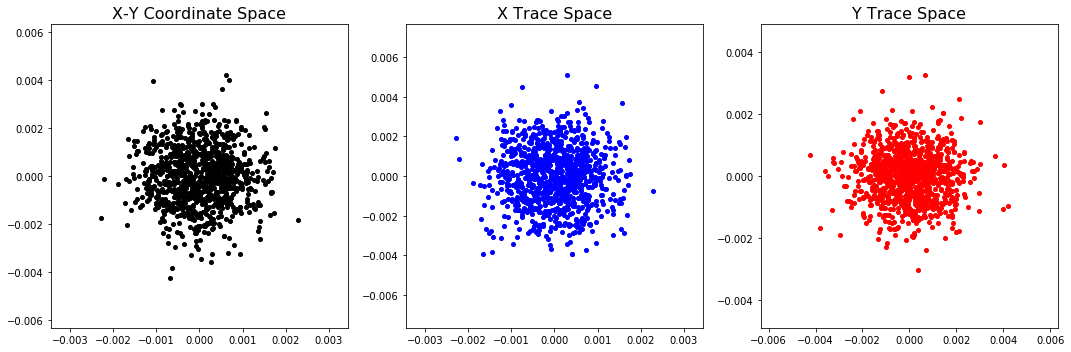

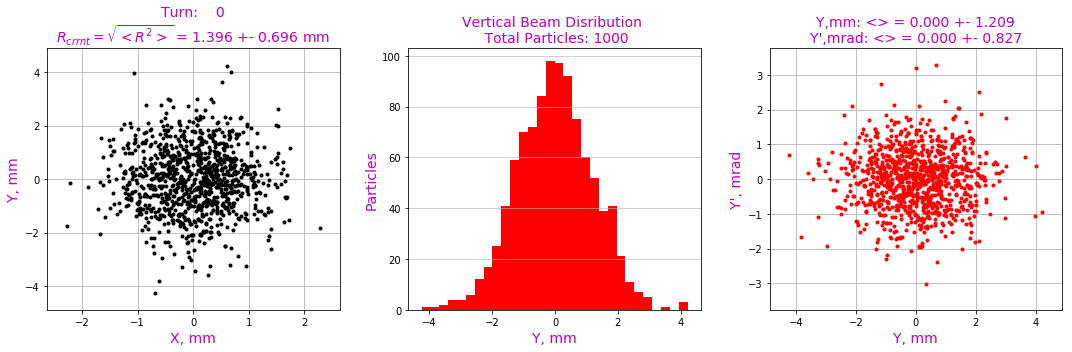


Total number of particles (= -1 to interrupt simulation): 1000

Total number of turns (= -1 to interrupt simulation): 50000

Number turns for ramp (= -1 to interrupt simulation): 45000

Periodicity (in turns) to update the parameters and nonlinear insertion 
 (= -1 to interrupt simulation): 1000


Steps for magnification:  50 , steps for ramp =  45



updateOutputFlag (0 - no, 1 - yes, -1 - to interrupt simulation): 1

Magnification type 
(1 - relative, 2 - absolute, 0 - to interrupt simulation): 2



Information for help (20 nonlinear lenses inside of the insertion): 



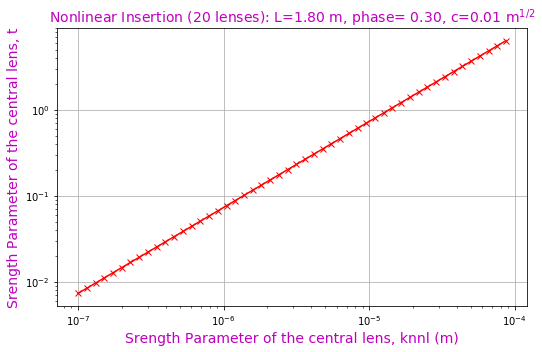


Initial value 't_i' of the strength of the central (!) nonlinear lens 
 (-1.- to interrupt simulation): 0.

Final value 't_f' of the strength of nonlinear lens 
 (-1.- to interrupt simulation): 1.


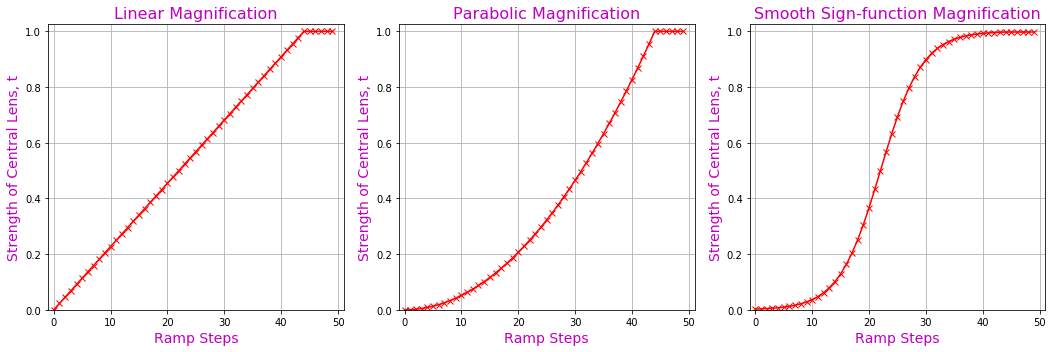


Your selection of the law magnification     
(1 - linear, 2 - parabolic, 3 - smooth sign-function; -1 - exit):  3


Your selection of law magnification:  3



Round aperture for losted particles (mm; -1.- to interrupt simulation): 9.



################################################################
###
###            Parameters for simulation:
###
###     Particles in the bunch =  1000
###     Total number of turns =  50000
###     Number of turns for ramp =  45000
###     Periodicity (in turns) to update the parameters =  1000
###     magnificationType =  2
###     For absolute magnification (AM) initial value t_i =  0.0
###     For absolute magnification (AM) final value t_f =  1.0
###     Law of magnification:  smooth sign-function
###     Steps of ramps:  50
###     Round aperture:  9.0  mm
###
###        Predefined parameters for nonlinear insertion:
###
###     Length, l0 =  1.8  m
###     Phase, mu0 =  0.3  rad (/2pi)
###     Aperture factor, cval =  0.01  m^(1/2)
###     Number of lens inside insertion =  20
###
################################################################

Strengths 't' and corresponding values 'knll' of cenrtal lens for absolute magnification:
   t[0]] = 0.00247262315663 ==> knll = 3.3

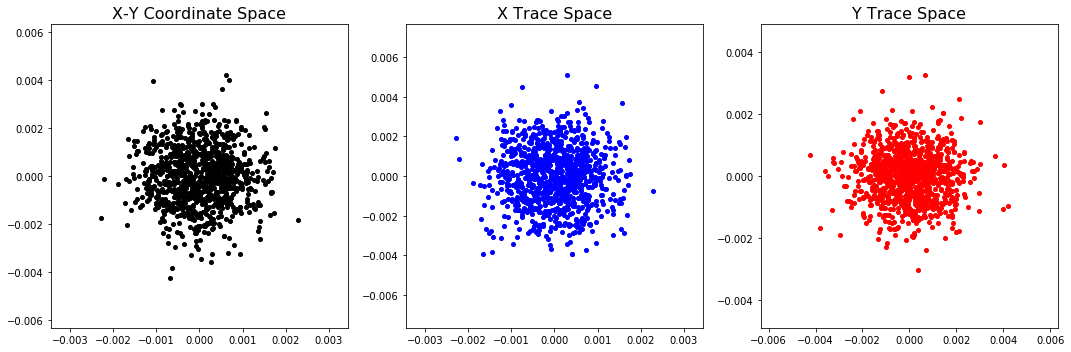

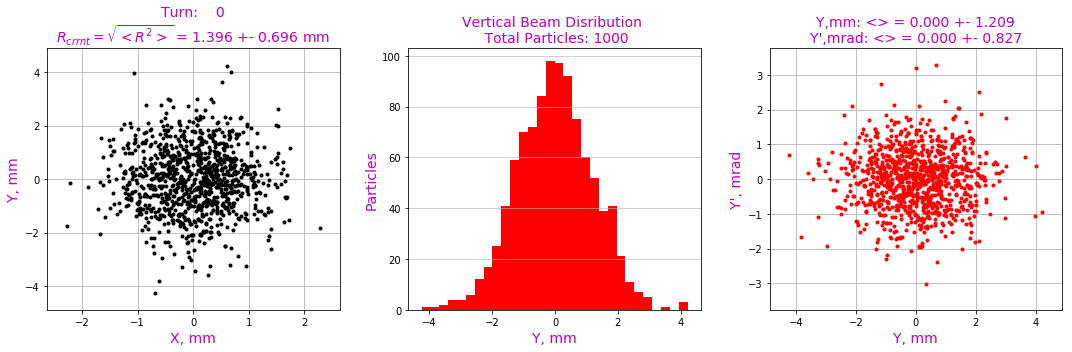


-------------------

           Nonlinear parameters will be CHANGED after each 1000 turns

-------------------



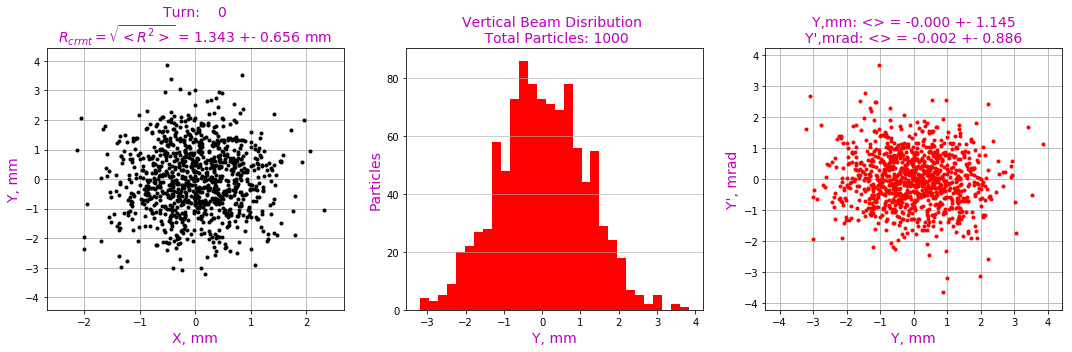

Turn   1 is completed (CPU time =  1.530 seconds)
Turn   2 is completed (CPU time =  0.560 seconds)
Turn   3 is completed (CPU time =  0.570 seconds)
Turn   4 is completed (CPU time =  0.560 seconds)
Turn   5 is completed (CPU time =  0.560 seconds)
Turn   6 is completed (CPU time =  0.560 seconds)
Turn   7 is completed (CPU time =  0.580 seconds)
Turn   8 is completed (CPU time =  0.630 seconds)
Turn   9 is completed (CPU time =  0.570 seconds)
Turn  10 is completed (CPU time =  0.620 seconds)
Turn  11 is completed (CPU time =  0.580 seconds)
Turn  12 is completed (CPU time =  0.570 seconds)
Turn  13 is completed (CPU time =  0.570 seconds)
Turn  14 is completed (CPU time =  0.560 seconds)
Turn  15 is completed (CPU time =  0.580 seconds)
Turn  16 is completed (CPU time =  0.560 seconds)
Turn  17 is completed (CPU time =  0.560 seconds)
Turn  18 is completed (CPU time =  0.630 seconds)
Turn  19 is completed (CPU time =  0.620 seconds)
Turn  20 is completed (CPU time =  0.630 seconds)


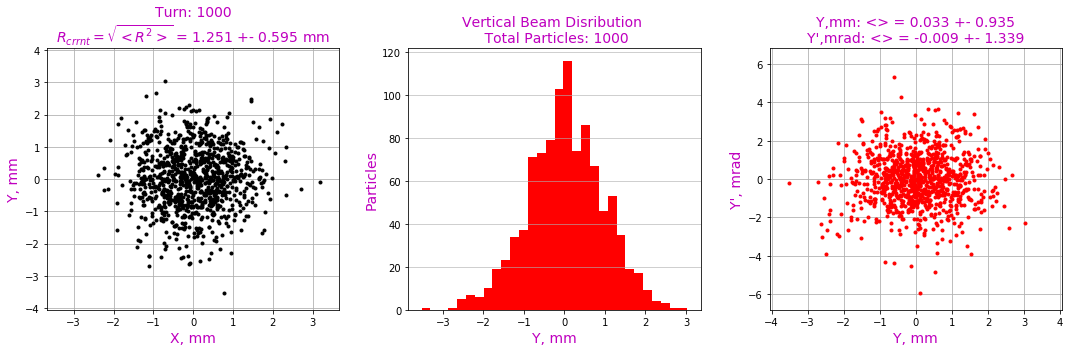


              After 1000 turns:


Update and plotting are completed (CPU time =  1.520 seconds)

Turn 1001 is completed (CPU time =  0.580 seconds)
Turn 1002 is completed (CPU time =  0.570 seconds)
Turn 1003 is completed (CPU time =  0.570 seconds)
Turn 1004 is completed (CPU time =  0.560 seconds)
Turn 1005 is completed (CPU time =  0.560 seconds)
Turn 1006 is completed (CPU time =  0.570 seconds)
Turn 1007 is completed (CPU time =  0.580 seconds)
Turn 1008 is completed (CPU time =  0.560 seconds)
Turn 1009 is completed (CPU time =  0.560 seconds)
Turn 1010 is completed (CPU time =  0.570 seconds)
Turn 1011 is completed (CPU time =  0.560 seconds)
Turn 1012 is completed (CPU time =  0.570 seconds)
Turn 1013 is completed (CPU time =  0.570 seconds)
Turn 1014 is completed (CPU time =  0.560 seconds)
Turn 1015 is completed (CPU time =  0.550 seconds)
Turn 1016 is completed (CPU time =  0.560 seconds)
Turn 1017 is completed (CPU time =  0.570 seconds)
Turn 1018 is completed (CPU time = 

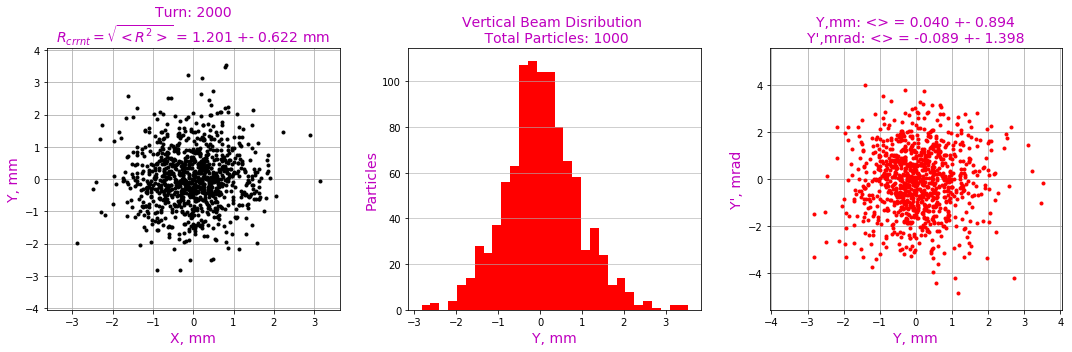


              After 2000 turns:


Update and plotting are completed (CPU time =  1.450 seconds)

Turn 2001 is completed (CPU time =  0.620 seconds)
Turn 2002 is completed (CPU time =  0.630 seconds)
Turn 2003 is completed (CPU time =  0.570 seconds)
Turn 2004 is completed (CPU time =  0.560 seconds)
Turn 2005 is completed (CPU time =  0.570 seconds)
Turn 2006 is completed (CPU time =  0.560 seconds)
Turn 2007 is completed (CPU time =  0.610 seconds)
Turn 2008 is completed (CPU time =  0.670 seconds)
Turn 2009 is completed (CPU time =  0.580 seconds)
Turn 2010 is completed (CPU time =  0.580 seconds)
Turn 2011 is completed (CPU time =  0.570 seconds)
Turn 2012 is completed (CPU time =  0.560 seconds)
Turn 2013 is completed (CPU time =  0.580 seconds)
Turn 2014 is completed (CPU time =  0.560 seconds)
Turn 2015 is completed (CPU time =  0.610 seconds)
Turn 2016 is completed (CPU time =  0.630 seconds)
Turn 2017 is completed (CPU time =  0.630 seconds)
Turn 2018 is completed (CPU time = 

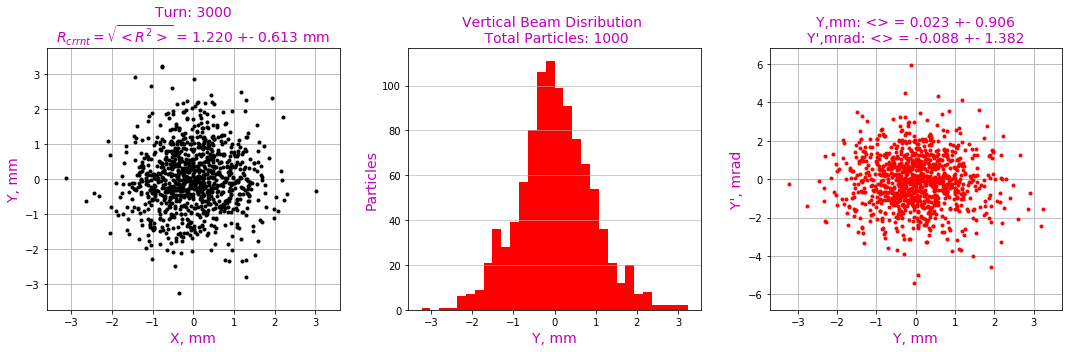


              After 3000 turns:


Update and plotting are completed (CPU time =  1.500 seconds)

Turn 3001 is completed (CPU time =  0.620 seconds)
Turn 3002 is completed (CPU time =  0.610 seconds)
Turn 3003 is completed (CPU time =  0.570 seconds)
Turn 3004 is completed (CPU time =  0.570 seconds)
Turn 3005 is completed (CPU time =  0.560 seconds)
Turn 3006 is completed (CPU time =  0.570 seconds)
Turn 3007 is completed (CPU time =  0.580 seconds)
Turn 3008 is completed (CPU time =  0.580 seconds)
Turn 3009 is completed (CPU time =  0.590 seconds)
Turn 3010 is completed (CPU time =  0.590 seconds)
Turn 3011 is completed (CPU time =  0.610 seconds)
Turn 3012 is completed (CPU time =  0.570 seconds)
Turn 3013 is completed (CPU time =  0.570 seconds)
Turn 3014 is completed (CPU time =  0.580 seconds)
Turn 3015 is completed (CPU time =  0.600 seconds)
Turn 3016 is completed (CPU time =  0.560 seconds)
Turn 3017 is completed (CPU time =  0.580 seconds)
Turn 3018 is completed (CPU time = 

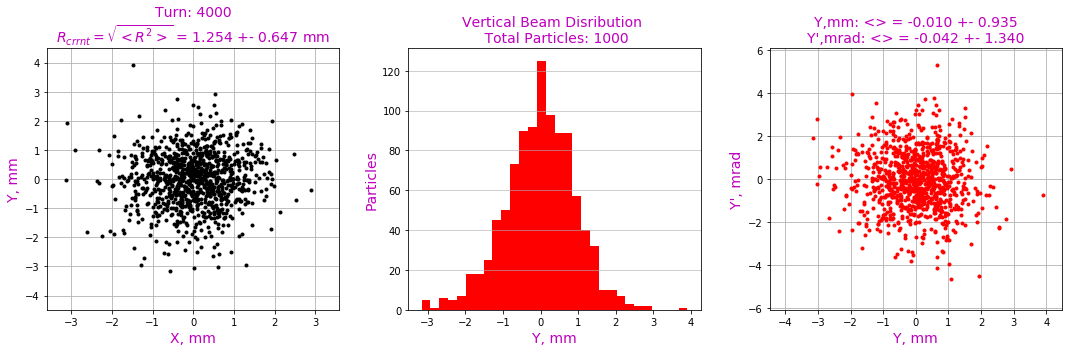


              After 4000 turns:


Update and plotting are completed (CPU time =  1.580 seconds)

Turn 4001 is completed (CPU time =  0.580 seconds)
Turn 4002 is completed (CPU time =  0.570 seconds)
Turn 4003 is completed (CPU time =  0.560 seconds)
Turn 4004 is completed (CPU time =  0.560 seconds)
Turn 4005 is completed (CPU time =  0.570 seconds)
Turn 4006 is completed (CPU time =  0.570 seconds)
Turn 4007 is completed (CPU time =  0.570 seconds)
Turn 4008 is completed (CPU time =  0.570 seconds)
Turn 4009 is completed (CPU time =  0.560 seconds)
Turn 4010 is completed (CPU time =  0.570 seconds)
Turn 4011 is completed (CPU time =  0.560 seconds)
Turn 4012 is completed (CPU time =  0.570 seconds)
Turn 4013 is completed (CPU time =  0.560 seconds)
Turn 4014 is completed (CPU time =  0.560 seconds)
Turn 4015 is completed (CPU time =  0.570 seconds)
Turn 4016 is completed (CPU time =  0.560 seconds)
Turn 4017 is completed (CPU time =  0.570 seconds)
Turn 4018 is completed (CPU time = 

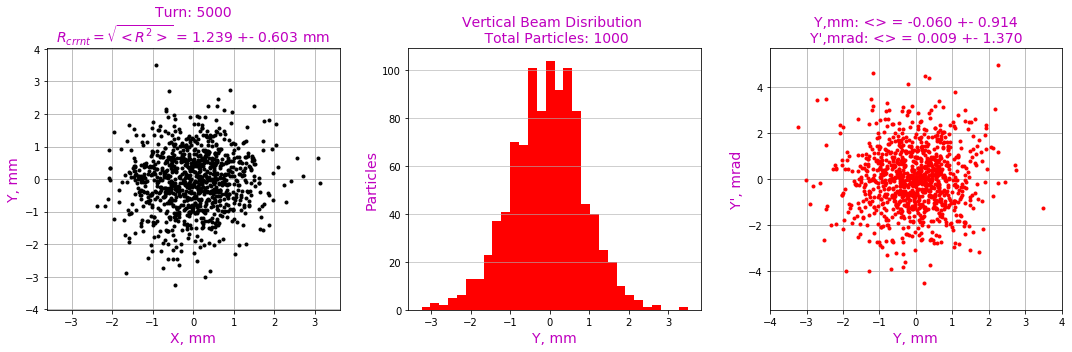


              After 5000 turns:


Update and plotting are completed (CPU time =  1.450 seconds)

Turn 5001 is completed (CPU time =  0.580 seconds)
Turn 5002 is completed (CPU time =  0.580 seconds)
Turn 5003 is completed (CPU time =  0.560 seconds)
Turn 5004 is completed (CPU time =  0.560 seconds)
Turn 5005 is completed (CPU time =  0.560 seconds)
Turn 5006 is completed (CPU time =  0.570 seconds)
Turn 5007 is completed (CPU time =  0.560 seconds)
Turn 5008 is completed (CPU time =  0.560 seconds)
Turn 5009 is completed (CPU time =  0.570 seconds)
Turn 5010 is completed (CPU time =  0.560 seconds)
Turn 5011 is completed (CPU time =  0.560 seconds)
Turn 5012 is completed (CPU time =  0.570 seconds)
Turn 5013 is completed (CPU time =  0.560 seconds)
Turn 5014 is completed (CPU time =  0.570 seconds)
Turn 5015 is completed (CPU time =  0.560 seconds)
Turn 5016 is completed (CPU time =  0.560 seconds)
Turn 5017 is completed (CPU time =  0.560 seconds)
Turn 5018 is completed (CPU time = 

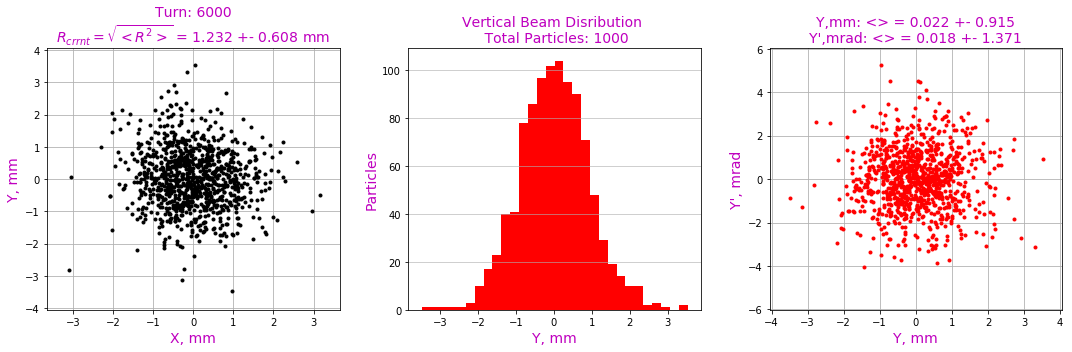


              After 6000 turns:


Update and plotting are completed (CPU time =  1.570 seconds)

Turn 6001 is completed (CPU time =  0.580 seconds)
Turn 6002 is completed (CPU time =  0.570 seconds)
Turn 6003 is completed (CPU time =  0.590 seconds)
Turn 6004 is completed (CPU time =  0.560 seconds)
Turn 6005 is completed (CPU time =  0.580 seconds)
Turn 6006 is completed (CPU time =  0.560 seconds)
Turn 6007 is completed (CPU time =  0.560 seconds)
Turn 6008 is completed (CPU time =  0.570 seconds)
Turn 6009 is completed (CPU time =  0.560 seconds)
Turn 6010 is completed (CPU time =  0.570 seconds)
Turn 6011 is completed (CPU time =  0.570 seconds)
Turn 6012 is completed (CPU time =  0.560 seconds)
Turn 6013 is completed (CPU time =  0.560 seconds)
Turn 6014 is completed (CPU time =  0.570 seconds)
Turn 6015 is completed (CPU time =  0.560 seconds)
Turn 6016 is completed (CPU time =  0.570 seconds)
Turn 6017 is completed (CPU time =  0.560 seconds)
Turn 6018 is completed (CPU time = 

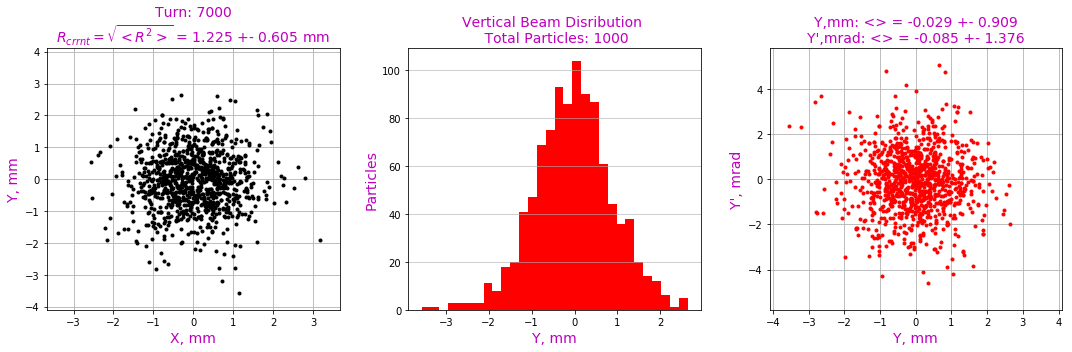


              After 7000 turns:


Update and plotting are completed (CPU time =  1.440 seconds)

Turn 7001 is completed (CPU time =  0.590 seconds)
Turn 7002 is completed (CPU time =  0.580 seconds)
Turn 7003 is completed (CPU time =  0.570 seconds)
Turn 7004 is completed (CPU time =  0.560 seconds)
Turn 7005 is completed (CPU time =  0.560 seconds)
Turn 7006 is completed (CPU time =  0.560 seconds)
Turn 7007 is completed (CPU time =  0.560 seconds)
Turn 7008 is completed (CPU time =  0.560 seconds)
Turn 7009 is completed (CPU time =  0.560 seconds)
Turn 7010 is completed (CPU time =  0.570 seconds)
Turn 7011 is completed (CPU time =  0.560 seconds)
Turn 7012 is completed (CPU time =  0.560 seconds)
Turn 7013 is completed (CPU time =  0.560 seconds)
Turn 7014 is completed (CPU time =  0.560 seconds)
Turn 7015 is completed (CPU time =  0.560 seconds)
Turn 7016 is completed (CPU time =  0.560 seconds)
Turn 7017 is completed (CPU time =  0.570 seconds)
Turn 7018 is completed (CPU time = 

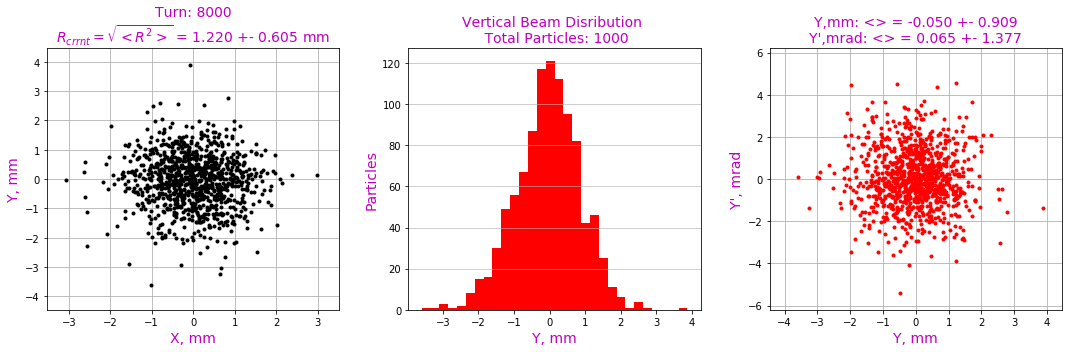


              After 8000 turns:


Update and plotting are completed (CPU time =  1.450 seconds)

Turn 8001 is completed (CPU time =  0.560 seconds)
Turn 8002 is completed (CPU time =  0.580 seconds)
Turn 8003 is completed (CPU time =  0.580 seconds)
Turn 8004 is completed (CPU time =  0.570 seconds)
Turn 8005 is completed (CPU time =  0.560 seconds)
Turn 8006 is completed (CPU time =  0.570 seconds)
Turn 8007 is completed (CPU time =  0.570 seconds)
Turn 8008 is completed (CPU time =  0.560 seconds)
Turn 8009 is completed (CPU time =  0.580 seconds)
Turn 8010 is completed (CPU time =  0.580 seconds)
Turn 8011 is completed (CPU time =  0.580 seconds)
Turn 8012 is completed (CPU time =  0.580 seconds)
Turn 8013 is completed (CPU time =  0.580 seconds)
Turn 8014 is completed (CPU time =  0.580 seconds)
Turn 8015 is completed (CPU time =  0.570 seconds)
Turn 8016 is completed (CPU time =  0.570 seconds)
Turn 8017 is completed (CPU time =  0.580 seconds)
Turn 8018 is completed (CPU time = 

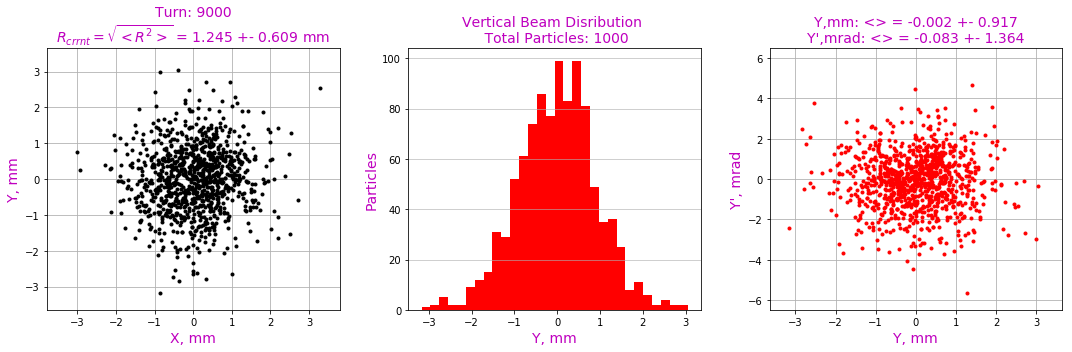


              After 9000 turns:


Update and plotting are completed (CPU time =  1.470 seconds)

Turn 9001 is completed (CPU time =  0.580 seconds)
Turn 9002 is completed (CPU time =  0.580 seconds)
Turn 9003 is completed (CPU time =  0.560 seconds)
Turn 9004 is completed (CPU time =  0.560 seconds)
Turn 9005 is completed (CPU time =  0.580 seconds)
Turn 9006 is completed (CPU time =  0.560 seconds)
Turn 9007 is completed (CPU time =  0.560 seconds)
Turn 9008 is completed (CPU time =  0.560 seconds)
Turn 9009 is completed (CPU time =  0.570 seconds)
Turn 9010 is completed (CPU time =  0.570 seconds)
Turn 9011 is completed (CPU time =  0.560 seconds)
Turn 9012 is completed (CPU time =  0.560 seconds)
Turn 9013 is completed (CPU time =  0.560 seconds)
Turn 9014 is completed (CPU time =  0.560 seconds)
Turn 9015 is completed (CPU time =  0.560 seconds)
Turn 9016 is completed (CPU time =  0.570 seconds)
Turn 9017 is completed (CPU time =  0.560 seconds)
Turn 9018 is completed (CPU time = 

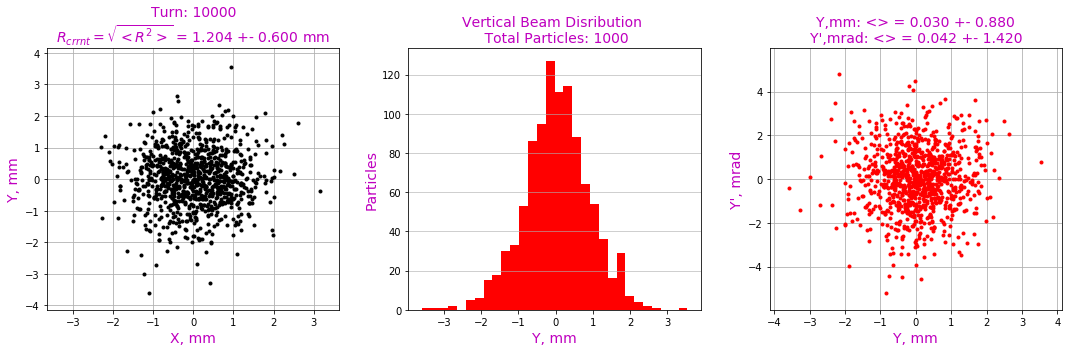


              After 10000 turns:


Update and plotting are completed (CPU time =  1.450 seconds)

Turn 10001 is completed (CPU time =  0.570 seconds)
Turn 10002 is completed (CPU time =  0.600 seconds)
Turn 10003 is completed (CPU time =  0.570 seconds)
Turn 10004 is completed (CPU time =  0.560 seconds)
Turn 10005 is completed (CPU time =  0.560 seconds)
Turn 10006 is completed (CPU time =  0.560 seconds)
Turn 10007 is completed (CPU time =  0.570 seconds)
Turn 10008 is completed (CPU time =  0.580 seconds)
Turn 10009 is completed (CPU time =  0.570 seconds)
Turn 10010 is completed (CPU time =  0.570 seconds)
Turn 10011 is completed (CPU time =  0.560 seconds)
Turn 10012 is completed (CPU time =  0.580 seconds)
Turn 10013 is completed (CPU time =  0.570 seconds)
Turn 10014 is completed (CPU time =  0.560 seconds)
Turn 10015 is completed (CPU time =  0.580 seconds)
Turn 10016 is completed (CPU time =  0.570 seconds)
Turn 10017 is completed (CPU time =  0.560 seconds)
Turn 10018 is com

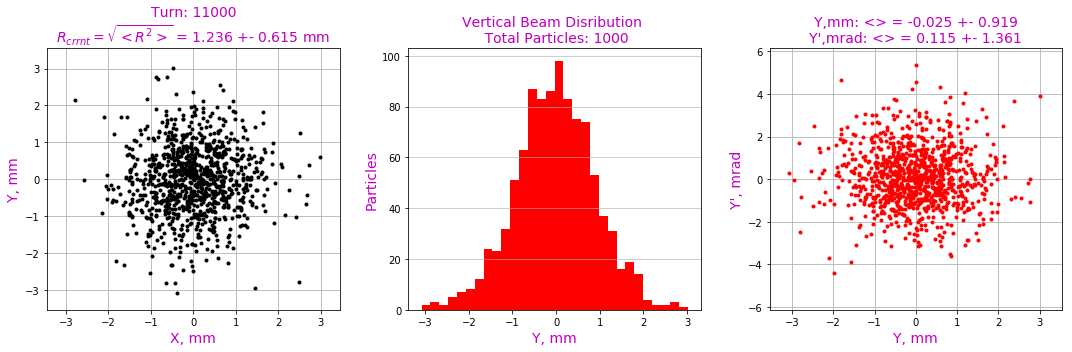


              After 11000 turns:


Update and plotting are completed (CPU time =  1.430 seconds)

Turn 11001 is completed (CPU time =  0.560 seconds)
Turn 11002 is completed (CPU time =  0.570 seconds)
Turn 11003 is completed (CPU time =  0.560 seconds)
Turn 11004 is completed (CPU time =  0.560 seconds)
Turn 11005 is completed (CPU time =  0.550 seconds)
Turn 11006 is completed (CPU time =  0.570 seconds)
Turn 11007 is completed (CPU time =  0.560 seconds)
Turn 11008 is completed (CPU time =  0.560 seconds)
Turn 11009 is completed (CPU time =  0.560 seconds)
Turn 11010 is completed (CPU time =  0.560 seconds)
Turn 11011 is completed (CPU time =  0.560 seconds)
Turn 11012 is completed (CPU time =  0.550 seconds)
Turn 11013 is completed (CPU time =  0.560 seconds)
Turn 11014 is completed (CPU time =  0.570 seconds)
Turn 11015 is completed (CPU time =  0.560 seconds)
Turn 11016 is completed (CPU time =  0.560 seconds)
Turn 11017 is completed (CPU time =  0.570 seconds)
Turn 11018 is com

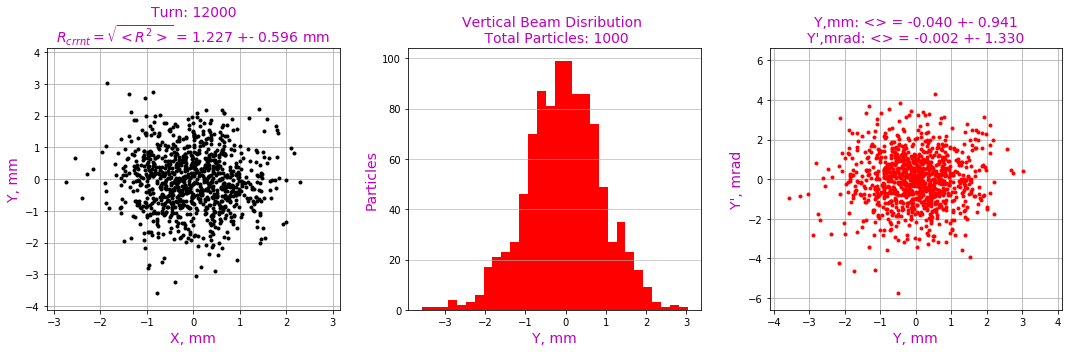


              After 12000 turns:


Update and plotting are completed (CPU time =  1.520 seconds)

Turn 12001 is completed (CPU time =  0.560 seconds)
Turn 12002 is completed (CPU time =  0.560 seconds)
Turn 12003 is completed (CPU time =  0.560 seconds)
Turn 12004 is completed (CPU time =  0.560 seconds)
Turn 12005 is completed (CPU time =  0.560 seconds)
Turn 12006 is completed (CPU time =  0.580 seconds)
Turn 12007 is completed (CPU time =  0.560 seconds)
Turn 12008 is completed (CPU time =  0.560 seconds)
Turn 12009 is completed (CPU time =  0.570 seconds)
Turn 12010 is completed (CPU time =  0.580 seconds)
Turn 12011 is completed (CPU time =  0.580 seconds)
Turn 12012 is completed (CPU time =  0.560 seconds)
Turn 12013 is completed (CPU time =  0.560 seconds)
Turn 12014 is completed (CPU time =  0.570 seconds)
Turn 12015 is completed (CPU time =  0.560 seconds)
Turn 12016 is completed (CPU time =  0.590 seconds)
Turn 12017 is completed (CPU time =  0.560 seconds)
Turn 12018 is com

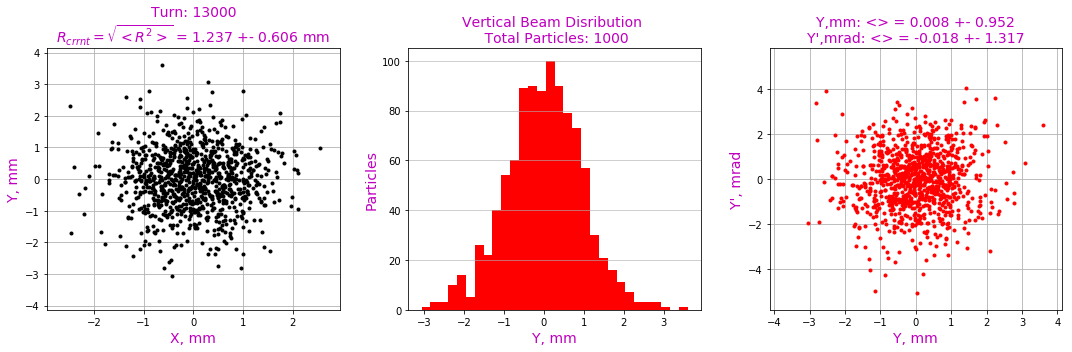


              After 13000 turns:


Update and plotting are completed (CPU time =  1.450 seconds)

Turn 13001 is completed (CPU time =  0.570 seconds)
Turn 13002 is completed (CPU time =  0.560 seconds)
Turn 13003 is completed (CPU time =  0.570 seconds)
Turn 13004 is completed (CPU time =  0.570 seconds)
Turn 13005 is completed (CPU time =  0.560 seconds)
Turn 13006 is completed (CPU time =  0.560 seconds)
Turn 13007 is completed (CPU time =  0.570 seconds)
Turn 13008 is completed (CPU time =  0.550 seconds)
Turn 13009 is completed (CPU time =  0.570 seconds)
Turn 13010 is completed (CPU time =  0.560 seconds)
Turn 13011 is completed (CPU time =  0.560 seconds)
Turn 13012 is completed (CPU time =  0.570 seconds)
Turn 13013 is completed (CPU time =  0.560 seconds)
Turn 13014 is completed (CPU time =  0.560 seconds)
Turn 13015 is completed (CPU time =  0.580 seconds)
Turn 13016 is completed (CPU time =  0.560 seconds)
Turn 13017 is completed (CPU time =  0.560 seconds)
Turn 13018 is com

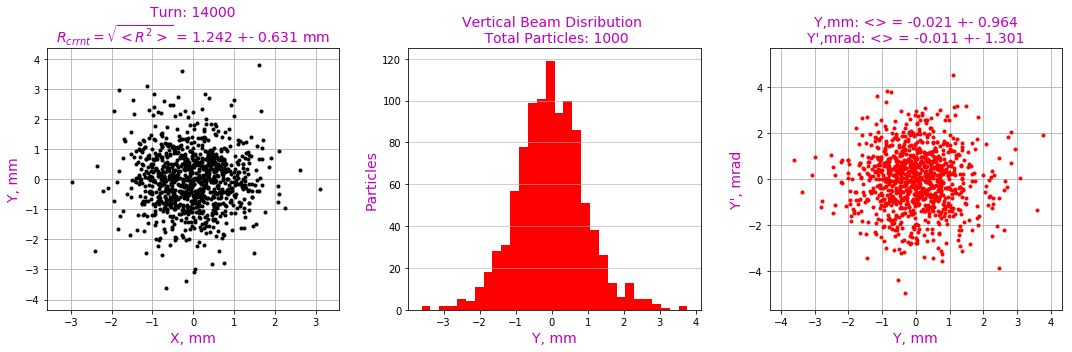


              After 14000 turns:


Update and plotting are completed (CPU time =  1.460 seconds)

Turn 14001 is completed (CPU time =  0.580 seconds)
Turn 14002 is completed (CPU time =  0.580 seconds)
Turn 14003 is completed (CPU time =  0.560 seconds)
Turn 14004 is completed (CPU time =  0.560 seconds)
Turn 14005 is completed (CPU time =  0.560 seconds)
Turn 14006 is completed (CPU time =  0.560 seconds)
Turn 14007 is completed (CPU time =  0.570 seconds)
Turn 14008 is completed (CPU time =  0.560 seconds)
Turn 14009 is completed (CPU time =  0.560 seconds)
Turn 14010 is completed (CPU time =  0.560 seconds)
Turn 14011 is completed (CPU time =  0.560 seconds)
Turn 14012 is completed (CPU time =  0.570 seconds)
Turn 14013 is completed (CPU time =  0.560 seconds)
Turn 14014 is completed (CPU time =  0.570 seconds)
Turn 14015 is completed (CPU time =  0.560 seconds)
Turn 14016 is completed (CPU time =  0.560 seconds)
Turn 14017 is completed (CPU time =  0.570 seconds)
Turn 14018 is com

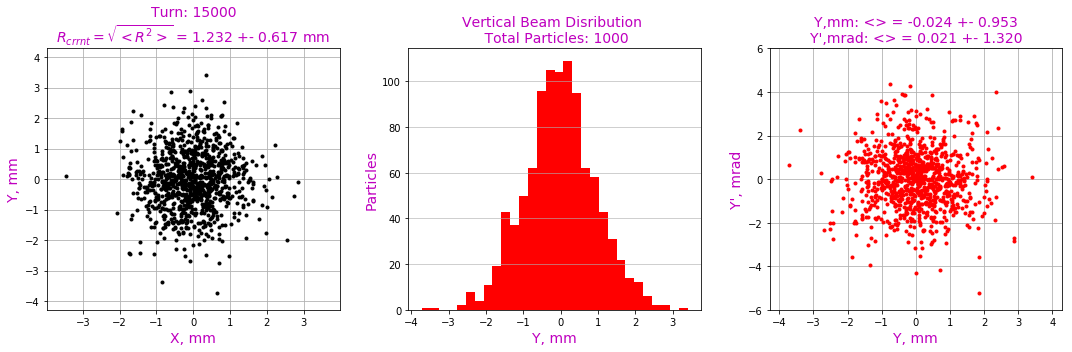


              After 15000 turns:


Update and plotting are completed (CPU time =  1.450 seconds)

Turn 15001 is completed (CPU time =  0.590 seconds)
Turn 15002 is completed (CPU time =  0.570 seconds)
Turn 15003 is completed (CPU time =  0.560 seconds)
Turn 15004 is completed (CPU time =  0.560 seconds)
Turn 15005 is completed (CPU time =  0.570 seconds)
Turn 15006 is completed (CPU time =  0.580 seconds)
Turn 15007 is completed (CPU time =  0.560 seconds)
Turn 15008 is completed (CPU time =  0.560 seconds)
Turn 15009 is completed (CPU time =  0.560 seconds)
Turn 15010 is completed (CPU time =  0.580 seconds)
Turn 15011 is completed (CPU time =  0.560 seconds)
Turn 15012 is completed (CPU time =  0.580 seconds)
Turn 15013 is completed (CPU time =  0.560 seconds)
Turn 15014 is completed (CPU time =  0.580 seconds)
Turn 15015 is completed (CPU time =  0.590 seconds)
Turn 15016 is completed (CPU time =  0.560 seconds)
Turn 15017 is completed (CPU time =  0.560 seconds)
Turn 15018 is com

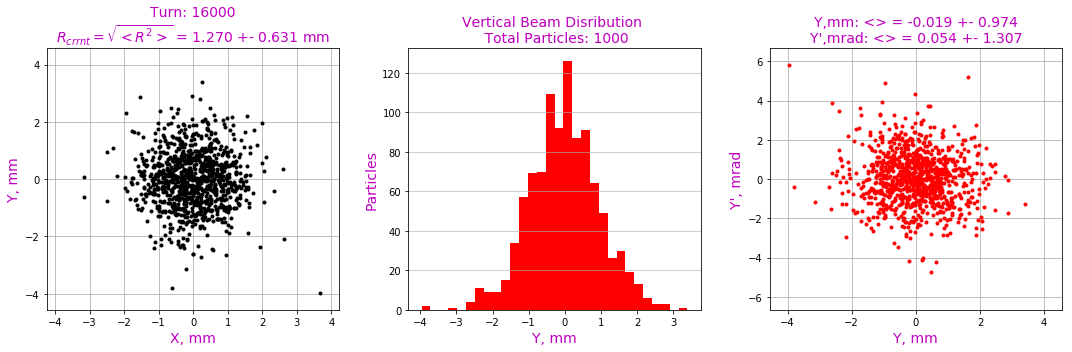


              After 16000 turns:


Update and plotting are completed (CPU time =  1.420 seconds)

Turn 16001 is completed (CPU time =  0.560 seconds)
Turn 16002 is completed (CPU time =  0.570 seconds)
Turn 16003 is completed (CPU time =  0.560 seconds)
Turn 16004 is completed (CPU time =  0.560 seconds)
Turn 16005 is completed (CPU time =  0.570 seconds)
Turn 16006 is completed (CPU time =  0.560 seconds)
Turn 16007 is completed (CPU time =  0.570 seconds)
Turn 16008 is completed (CPU time =  0.560 seconds)
Turn 16009 is completed (CPU time =  0.560 seconds)
Turn 16010 is completed (CPU time =  0.560 seconds)
Turn 16011 is completed (CPU time =  0.560 seconds)
Turn 16012 is completed (CPU time =  0.560 seconds)
Turn 16013 is completed (CPU time =  0.560 seconds)
Turn 16014 is completed (CPU time =  0.560 seconds)
Turn 16015 is completed (CPU time =  0.560 seconds)
Turn 16016 is completed (CPU time =  0.560 seconds)
Turn 16017 is completed (CPU time =  0.560 seconds)
Turn 16018 is com

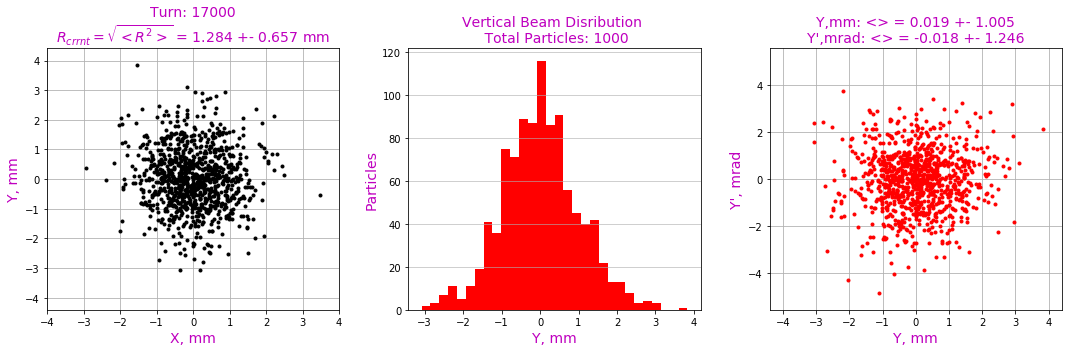


              After 17000 turns:


Update and plotting are completed (CPU time =  1.580 seconds)

Turn 17001 is completed (CPU time =  0.570 seconds)
Turn 17002 is completed (CPU time =  0.570 seconds)
Turn 17003 is completed (CPU time =  0.550 seconds)
Turn 17004 is completed (CPU time =  0.550 seconds)
Turn 17005 is completed (CPU time =  0.560 seconds)
Turn 17006 is completed (CPU time =  0.550 seconds)
Turn 17007 is completed (CPU time =  0.550 seconds)
Turn 17008 is completed (CPU time =  0.570 seconds)
Turn 17009 is completed (CPU time =  0.560 seconds)
Turn 17010 is completed (CPU time =  0.570 seconds)
Turn 17011 is completed (CPU time =  0.560 seconds)
Turn 17012 is completed (CPU time =  0.570 seconds)
Turn 17013 is completed (CPU time =  0.580 seconds)
Turn 17014 is completed (CPU time =  0.570 seconds)
Turn 17015 is completed (CPU time =  0.580 seconds)
Turn 17016 is completed (CPU time =  0.570 seconds)
Turn 17017 is completed (CPU time =  0.570 seconds)
Turn 17018 is com

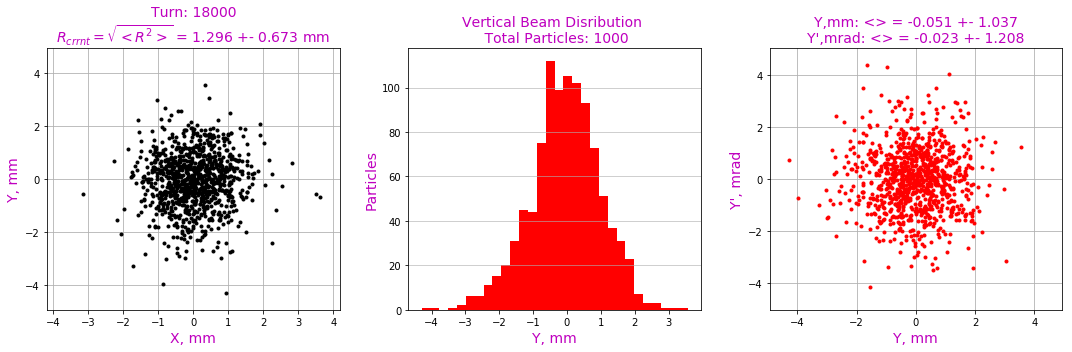


              After 18000 turns:


Update and plotting are completed (CPU time =  1.400 seconds)

Turn 18001 is completed (CPU time =  0.590 seconds)
Turn 18002 is completed (CPU time =  0.580 seconds)
Turn 18003 is completed (CPU time =  0.580 seconds)
Turn 18004 is completed (CPU time =  0.570 seconds)
Turn 18005 is completed (CPU time =  0.560 seconds)
Turn 18006 is completed (CPU time =  0.560 seconds)
Turn 18007 is completed (CPU time =  0.580 seconds)
Turn 18008 is completed (CPU time =  0.580 seconds)
Turn 18009 is completed (CPU time =  0.560 seconds)
Turn 18010 is completed (CPU time =  0.580 seconds)
Turn 18011 is completed (CPU time =  0.570 seconds)
Turn 18012 is completed (CPU time =  0.570 seconds)
Turn 18013 is completed (CPU time =  0.590 seconds)
Turn 18014 is completed (CPU time =  0.560 seconds)
Turn 18015 is completed (CPU time =  0.580 seconds)
Turn 18016 is completed (CPU time =  0.570 seconds)
Turn 18017 is completed (CPU time =  0.580 seconds)
Turn 18018 is com

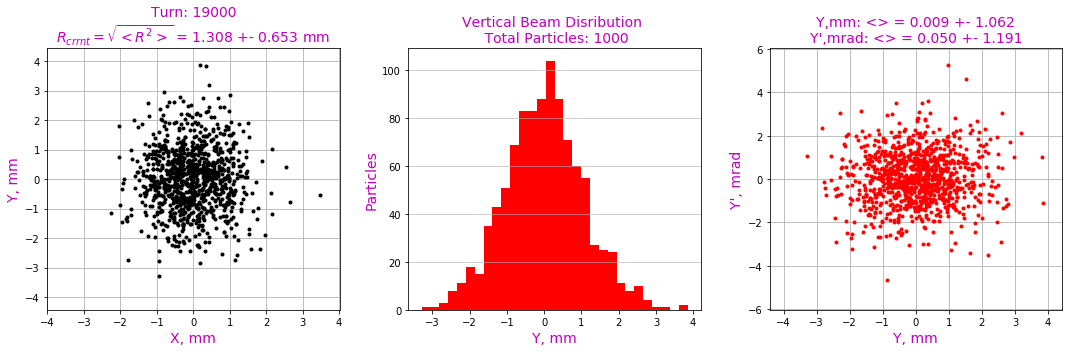


              After 19000 turns:


Update and plotting are completed (CPU time =  1.480 seconds)

Turn 19001 is completed (CPU time =  0.570 seconds)
Turn 19002 is completed (CPU time =  0.560 seconds)
Turn 19003 is completed (CPU time =  0.590 seconds)
Turn 19004 is completed (CPU time =  0.570 seconds)
Turn 19005 is completed (CPU time =  0.560 seconds)
Turn 19006 is completed (CPU time =  0.570 seconds)
Turn 19007 is completed (CPU time =  0.550 seconds)
Turn 19008 is completed (CPU time =  0.560 seconds)
Turn 19009 is completed (CPU time =  0.560 seconds)
Turn 19010 is completed (CPU time =  0.560 seconds)
Turn 19011 is completed (CPU time =  0.560 seconds)
Turn 19012 is completed (CPU time =  0.560 seconds)
Turn 19013 is completed (CPU time =  0.570 seconds)
Turn 19014 is completed (CPU time =  0.580 seconds)
Turn 19015 is completed (CPU time =  0.570 seconds)
Turn 19016 is completed (CPU time =  0.560 seconds)
Turn 19017 is completed (CPU time =  0.560 seconds)
Turn 19018 is com

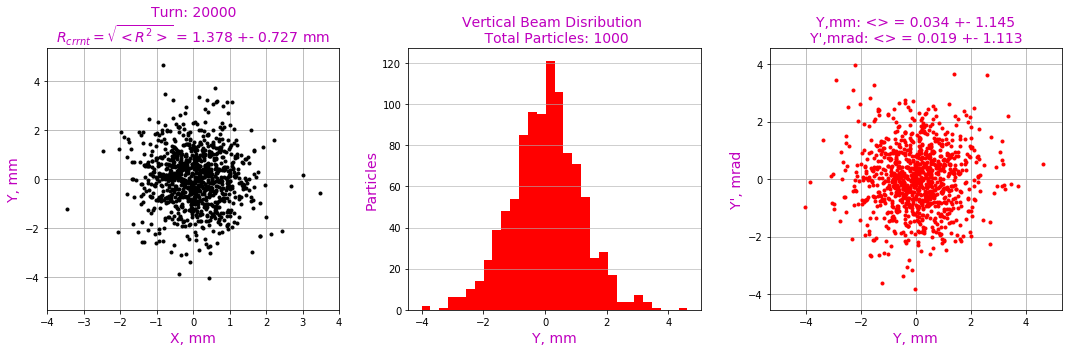


              After 20000 turns:


Update and plotting are completed (CPU time =  1.390 seconds)

Turn 20001 is completed (CPU time =  0.560 seconds)
Turn 20002 is completed (CPU time =  0.560 seconds)
Turn 20003 is completed (CPU time =  0.560 seconds)
Turn 20004 is completed (CPU time =  0.560 seconds)
Turn 20005 is completed (CPU time =  0.560 seconds)
Turn 20006 is completed (CPU time =  0.560 seconds)
Turn 20007 is completed (CPU time =  0.560 seconds)
Turn 20008 is completed (CPU time =  0.560 seconds)
Turn 20009 is completed (CPU time =  0.560 seconds)
Turn 20010 is completed (CPU time =  0.560 seconds)
Turn 20011 is completed (CPU time =  0.560 seconds)
Turn 20012 is completed (CPU time =  0.560 seconds)
Turn 20013 is completed (CPU time =  0.550 seconds)
Turn 20014 is completed (CPU time =  0.560 seconds)
Turn 20015 is completed (CPU time =  0.560 seconds)
Turn 20016 is completed (CPU time =  0.560 seconds)
Turn 20017 is completed (CPU time =  0.560 seconds)
Turn 20018 is com

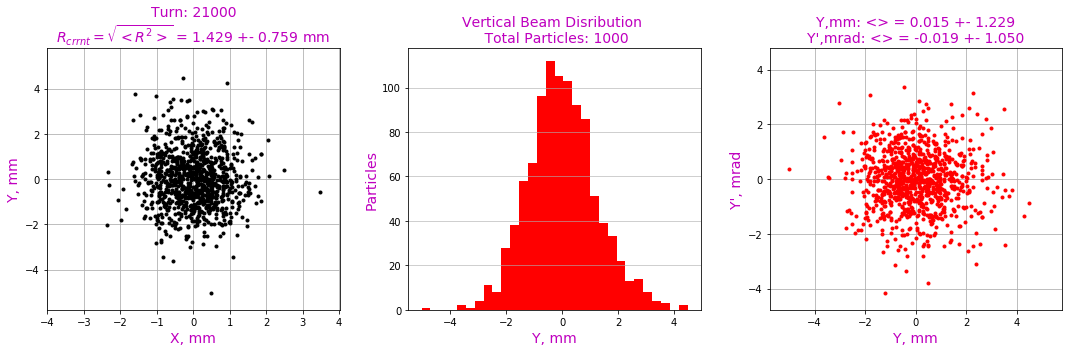


              After 21000 turns:


Update and plotting are completed (CPU time =  1.360 seconds)

Turn 21001 is completed (CPU time =  0.570 seconds)
Turn 21002 is completed (CPU time =  0.570 seconds)
Turn 21003 is completed (CPU time =  0.560 seconds)
Turn 21004 is completed (CPU time =  0.560 seconds)
Turn 21005 is completed (CPU time =  0.560 seconds)
Turn 21006 is completed (CPU time =  0.560 seconds)
Turn 21007 is completed (CPU time =  0.560 seconds)
Turn 21008 is completed (CPU time =  0.560 seconds)
Turn 21009 is completed (CPU time =  0.570 seconds)
Turn 21010 is completed (CPU time =  0.560 seconds)
Turn 21011 is completed (CPU time =  0.560 seconds)
Turn 21012 is completed (CPU time =  0.560 seconds)
Turn 21013 is completed (CPU time =  0.560 seconds)
Turn 21014 is completed (CPU time =  0.570 seconds)
Turn 21015 is completed (CPU time =  0.550 seconds)
Turn 21016 is completed (CPU time =  0.560 seconds)
Turn 21017 is completed (CPU time =  0.560 seconds)
Turn 21018 is com

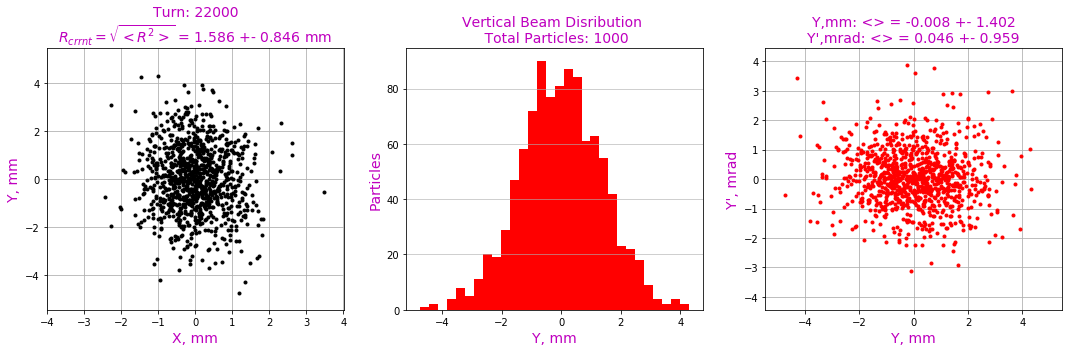


              After 22000 turns:


Update and plotting are completed (CPU time =  1.410 seconds)

Turn 22001 is completed (CPU time =  0.580 seconds)
Turn 22002 is completed (CPU time =  0.570 seconds)
Turn 22003 is completed (CPU time =  0.560 seconds)
Turn 22004 is completed (CPU time =  0.570 seconds)
Turn 22005 is completed (CPU time =  0.570 seconds)
Turn 22006 is completed (CPU time =  0.560 seconds)
Turn 22007 is completed (CPU time =  0.560 seconds)
Turn 22008 is completed (CPU time =  0.580 seconds)
Turn 22009 is completed (CPU time =  0.570 seconds)
Turn 22010 is completed (CPU time =  0.570 seconds)
Turn 22011 is completed (CPU time =  0.560 seconds)
Turn 22012 is completed (CPU time =  0.560 seconds)
Turn 22013 is completed (CPU time =  0.550 seconds)
Turn 22014 is completed (CPU time =  0.560 seconds)
Turn 22015 is completed (CPU time =  0.560 seconds)
Turn 22016 is completed (CPU time =  0.560 seconds)
Turn 22017 is completed (CPU time =  0.570 seconds)
Turn 22018 is com

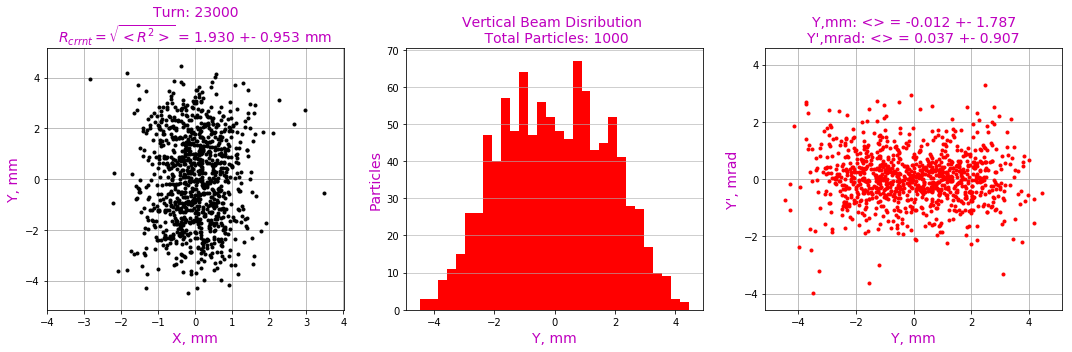


              After 23000 turns:


Update and plotting are completed (CPU time =  1.490 seconds)

Turn 23001 is completed (CPU time =  0.570 seconds)
Turn 23002 is completed (CPU time =  0.580 seconds)
Turn 23003 is completed (CPU time =  0.570 seconds)
Turn 23004 is completed (CPU time =  0.570 seconds)
Turn 23005 is completed (CPU time =  0.580 seconds)
Turn 23006 is completed (CPU time =  0.570 seconds)
Turn 23007 is completed (CPU time =  0.570 seconds)
Turn 23008 is completed (CPU time =  0.560 seconds)
Turn 23009 is completed (CPU time =  0.570 seconds)
Turn 23010 is completed (CPU time =  0.560 seconds)
Turn 23011 is completed (CPU time =  0.560 seconds)
Turn 23012 is completed (CPU time =  0.580 seconds)
Turn 23013 is completed (CPU time =  0.570 seconds)
Turn 23014 is completed (CPU time =  0.570 seconds)
Turn 23015 is completed (CPU time =  0.580 seconds)
Turn 23016 is completed (CPU time =  0.570 seconds)
Turn 23017 is completed (CPU time =  0.560 seconds)
Turn 23018 is com

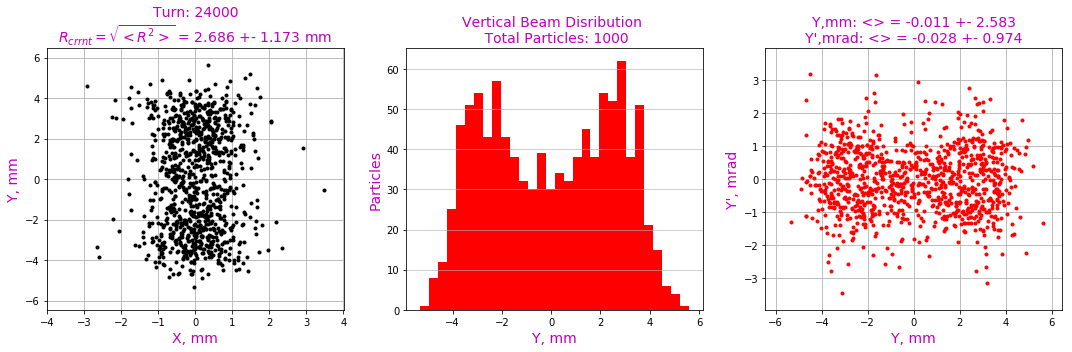


              After 24000 turns:


Update and plotting are completed (CPU time =  1.460 seconds)

Turn 24001 is completed (CPU time =  0.580 seconds)
Turn 24002 is completed (CPU time =  0.560 seconds)
Turn 24003 is completed (CPU time =  0.570 seconds)
Turn 24004 is completed (CPU time =  0.560 seconds)
Turn 24005 is completed (CPU time =  0.560 seconds)
Turn 24006 is completed (CPU time =  0.560 seconds)
Turn 24007 is completed (CPU time =  0.560 seconds)
Turn 24008 is completed (CPU time =  0.560 seconds)
Turn 24009 is completed (CPU time =  0.560 seconds)
Turn 24010 is completed (CPU time =  0.570 seconds)
Turn 24011 is completed (CPU time =  0.570 seconds)
Turn 24012 is completed (CPU time =  0.560 seconds)
Turn 24013 is completed (CPU time =  0.570 seconds)
Turn 24014 is completed (CPU time =  0.570 seconds)
Turn 24015 is completed (CPU time =  0.560 seconds)
Turn 24016 is completed (CPU time =  0.560 seconds)
Turn 24017 is completed (CPU time =  0.560 seconds)
Turn 24018 is com

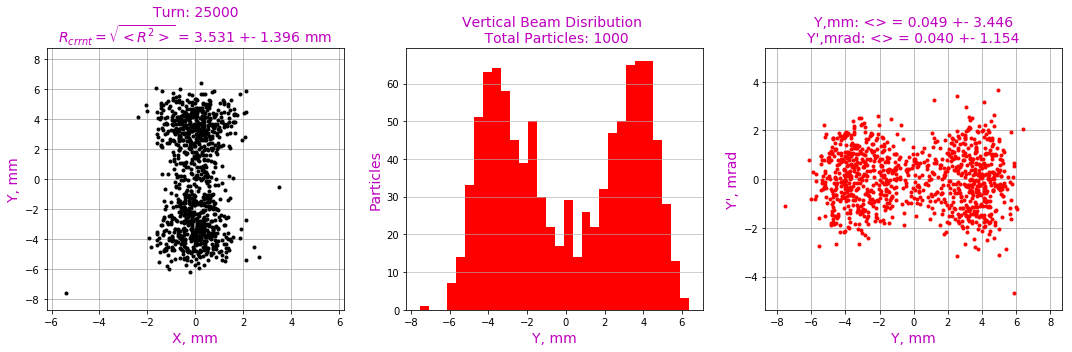


              After 25000 turns:


Update and plotting are completed (CPU time =  1.490 seconds)

Turn 25001 is completed (CPU time =  0.580 seconds)
Turn 25002 is completed (CPU time =  0.580 seconds)
Turn 25003 is completed (CPU time =  0.560 seconds)
Turn 25004 is completed (CPU time =  0.560 seconds)
Turn 25005 is completed (CPU time =  0.560 seconds)
Turn 25006 is completed (CPU time =  0.560 seconds)
Turn 25007 is completed (CPU time =  0.560 seconds)
Turn 25008 is completed (CPU time =  0.570 seconds)
Turn 25009 is completed (CPU time =  0.570 seconds)
Turn 25010 is completed (CPU time =  0.570 seconds)
Turn 25011 is completed (CPU time =  0.560 seconds)
Turn 25012 is completed (CPU time =  0.570 seconds)
Turn 25013 is completed (CPU time =  0.560 seconds)
Turn 25014 is completed (CPU time =  0.570 seconds)
Turn 25015 is completed (CPU time =  0.560 seconds)
Turn 25016 is completed (CPU time =  0.570 seconds)
Turn 25017 is completed (CPU time =  0.550 seconds)
Turn 25018 is com

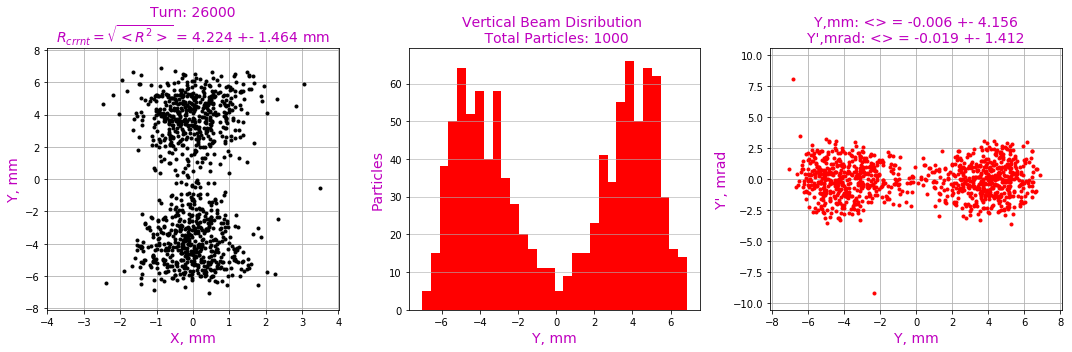


              After 26000 turns:


Update and plotting are completed (CPU time =  1.520 seconds)

Turn 26001 is completed (CPU time =  0.560 seconds)
Turn 26002 is completed (CPU time =  0.580 seconds)
Turn 26003 is completed (CPU time =  0.560 seconds)
Turn 26004 is completed (CPU time =  0.560 seconds)
Turn 26005 is completed (CPU time =  0.560 seconds)
Turn 26006 is completed (CPU time =  0.550 seconds)
Turn 26007 is completed (CPU time =  0.560 seconds)
Turn 26008 is completed (CPU time =  0.580 seconds)
Turn 26009 is completed (CPU time =  0.580 seconds)
Turn 26010 is completed (CPU time =  0.570 seconds)
Turn 26011 is completed (CPU time =  0.560 seconds)
Turn 26012 is completed (CPU time =  0.560 seconds)
Turn 26013 is completed (CPU time =  0.560 seconds)
Turn 26014 is completed (CPU time =  0.570 seconds)
Turn 26015 is completed (CPU time =  0.560 seconds)
Turn 26016 is completed (CPU time =  0.580 seconds)
Turn 26017 is completed (CPU time =  0.590 seconds)
Turn 26018 is com

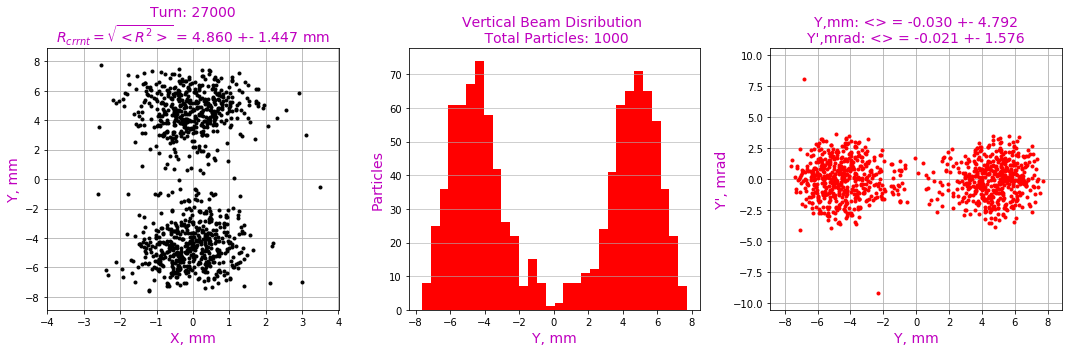


              After 27000 turns:


Update and plotting are completed (CPU time =  1.520 seconds)

Turn 27001 is completed (CPU time =  0.560 seconds)
Turn 27002 is completed (CPU time =  0.580 seconds)
Turn 27003 is completed (CPU time =  0.580 seconds)
Turn 27004 is completed (CPU time =  0.560 seconds)
Turn 27005 is completed (CPU time =  0.560 seconds)
Turn 27006 is completed (CPU time =  0.560 seconds)
Turn 27007 is completed (CPU time =  0.560 seconds)
Turn 27008 is completed (CPU time =  0.560 seconds)
Turn 27009 is completed (CPU time =  0.560 seconds)
Turn 27010 is completed (CPU time =  0.570 seconds)
Turn 27011 is completed (CPU time =  0.580 seconds)
Turn 27012 is completed (CPU time =  0.570 seconds)
Turn 27013 is completed (CPU time =  0.560 seconds)
Turn 27014 is completed (CPU time =  0.570 seconds)
Turn 27015 is completed (CPU time =  0.570 seconds)
Turn 27016 is completed (CPU time =  0.570 seconds)
Turn 27017 is completed (CPU time =  0.560 seconds)
Turn 27018 is com

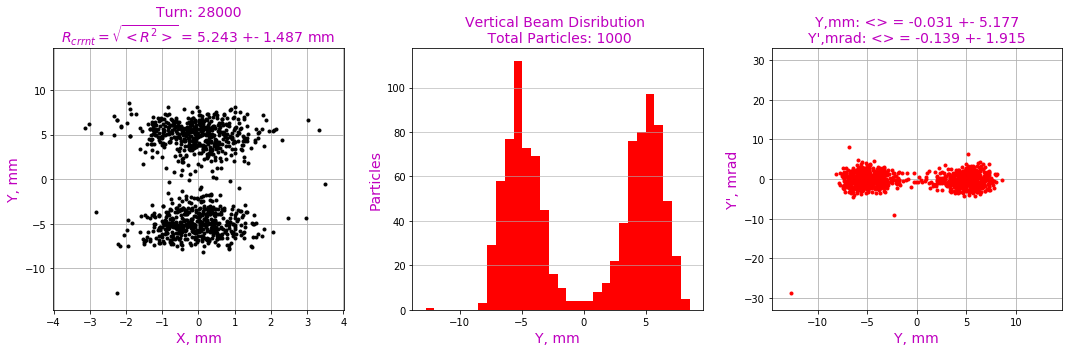


              After 28000 turns:


Update and plotting are completed (CPU time =  1.470 seconds)

Turn 28001 is completed (CPU time =  0.590 seconds)
Turn 28002 is completed (CPU time =  0.560 seconds)
Turn 28003 is completed (CPU time =  0.560 seconds)
Turn 28004 is completed (CPU time =  0.560 seconds)
Turn 28005 is completed (CPU time =  0.580 seconds)
Turn 28006 is completed (CPU time =  0.570 seconds)
Turn 28007 is completed (CPU time =  0.570 seconds)
Turn 28008 is completed (CPU time =  0.590 seconds)
Turn 28009 is completed (CPU time =  0.580 seconds)
Turn 28010 is completed (CPU time =  0.580 seconds)
Turn 28011 is completed (CPU time =  0.580 seconds)
Turn 28012 is completed (CPU time =  0.590 seconds)
Turn 28013 is completed (CPU time =  0.570 seconds)
Turn 28014 is completed (CPU time =  0.570 seconds)
Turn 28015 is completed (CPU time =  0.570 seconds)
Turn 28016 is completed (CPU time =  0.580 seconds)
Turn 28017 is completed (CPU time =  0.580 seconds)
Turn 28018 is com

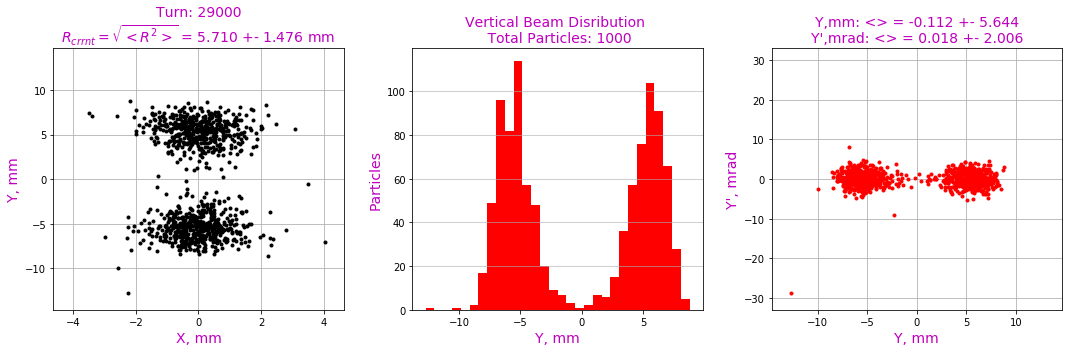


              After 29000 turns:


Update and plotting are completed (CPU time =  1.370 seconds)

Turn 29001 is completed (CPU time =  0.560 seconds)
Turn 29002 is completed (CPU time =  0.570 seconds)
Turn 29003 is completed (CPU time =  0.560 seconds)
Turn 29004 is completed (CPU time =  0.560 seconds)
Turn 29005 is completed (CPU time =  0.560 seconds)
Turn 29006 is completed (CPU time =  0.560 seconds)
Turn 29007 is completed (CPU time =  0.560 seconds)
Turn 29008 is completed (CPU time =  0.560 seconds)
Turn 29009 is completed (CPU time =  0.560 seconds)
Turn 29010 is completed (CPU time =  0.580 seconds)
Turn 29011 is completed (CPU time =  0.570 seconds)
Turn 29012 is completed (CPU time =  0.560 seconds)
Turn 29013 is completed (CPU time =  0.560 seconds)
Turn 29014 is completed (CPU time =  0.560 seconds)
Turn 29015 is completed (CPU time =  0.560 seconds)
Turn 29016 is completed (CPU time =  0.570 seconds)
Turn 29017 is completed (CPU time =  0.560 seconds)
Turn 29018 is com

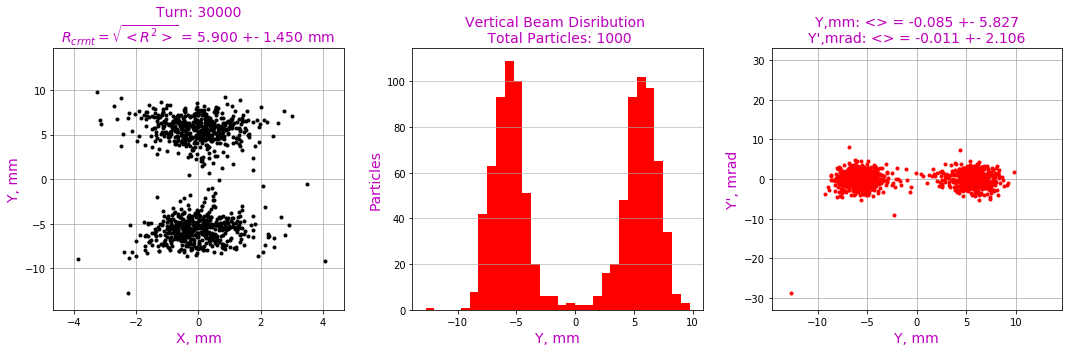


              After 30000 turns:


Update and plotting are completed (CPU time =  1.390 seconds)

Turn 30001 is completed (CPU time =  0.560 seconds)
Turn 30002 is completed (CPU time =  0.560 seconds)
Turn 30003 is completed (CPU time =  0.560 seconds)
Turn 30004 is completed (CPU time =  0.560 seconds)
Turn 30005 is completed (CPU time =  0.580 seconds)
Turn 30006 is completed (CPU time =  0.580 seconds)
Turn 30007 is completed (CPU time =  0.570 seconds)
Turn 30008 is completed (CPU time =  0.580 seconds)
Turn 30009 is completed (CPU time =  0.560 seconds)
Turn 30010 is completed (CPU time =  0.560 seconds)
Turn 30011 is completed (CPU time =  0.570 seconds)
Turn 30012 is completed (CPU time =  0.580 seconds)
Turn 30013 is completed (CPU time =  0.560 seconds)
Turn 30014 is completed (CPU time =  0.580 seconds)
Turn 30015 is completed (CPU time =  0.580 seconds)
Turn 30016 is completed (CPU time =  0.560 seconds)
Turn 30017 is completed (CPU time =  0.580 seconds)
Turn 30018 is com

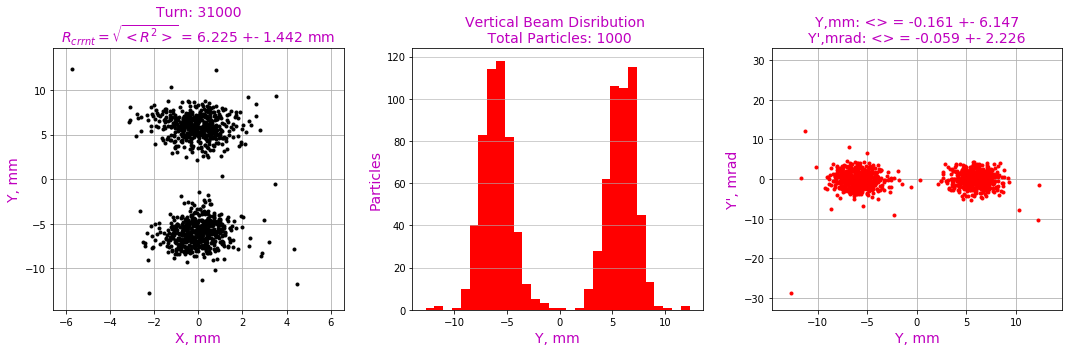


              After 31000 turns:


Update and plotting are completed (CPU time =  1.410 seconds)

Turn 31001 is completed (CPU time =  0.570 seconds)
Turn 31002 is completed (CPU time =  0.570 seconds)
Turn 31003 is completed (CPU time =  0.580 seconds)
Turn 31004 is completed (CPU time =  0.560 seconds)
Turn 31005 is completed (CPU time =  0.580 seconds)
Turn 31006 is completed (CPU time =  0.570 seconds)
Turn 31007 is completed (CPU time =  0.570 seconds)
Turn 31008 is completed (CPU time =  0.580 seconds)
Turn 31009 is completed (CPU time =  0.590 seconds)
Turn 31010 is completed (CPU time =  0.570 seconds)
Turn 31011 is completed (CPU time =  0.560 seconds)
Turn 31012 is completed (CPU time =  0.580 seconds)
Turn 31013 is completed (CPU time =  0.580 seconds)
Turn 31014 is completed (CPU time =  0.550 seconds)
Turn 31015 is completed (CPU time =  0.560 seconds)
Turn 31016 is completed (CPU time =  0.570 seconds)
Turn 31017 is completed (CPU time =  0.560 seconds)
Turn 31018 is com

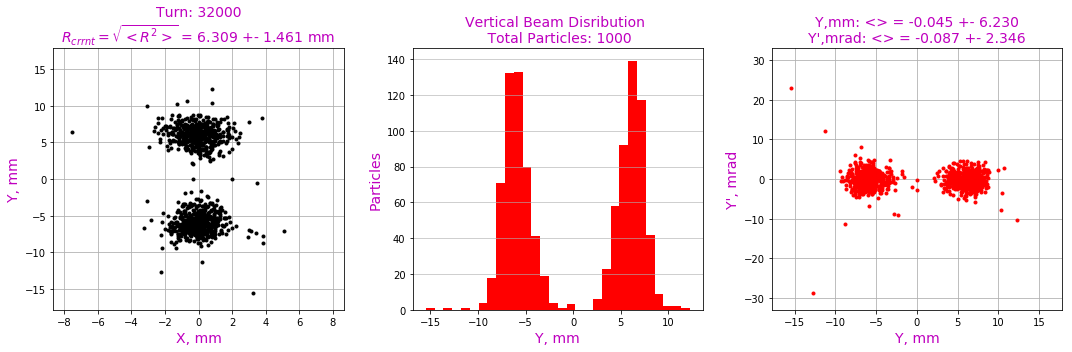


              After 32000 turns:


Update and plotting are completed (CPU time =  1.410 seconds)

Turn 32001 is completed (CPU time =  0.570 seconds)
Turn 32002 is completed (CPU time =  0.570 seconds)
Turn 32003 is completed (CPU time =  0.560 seconds)
Turn 32004 is completed (CPU time =  0.560 seconds)
Turn 32005 is completed (CPU time =  0.560 seconds)
Turn 32006 is completed (CPU time =  0.560 seconds)
Turn 32007 is completed (CPU time =  0.560 seconds)
Turn 32008 is completed (CPU time =  0.580 seconds)
Turn 32009 is completed (CPU time =  0.550 seconds)
Turn 32010 is completed (CPU time =  0.560 seconds)
Turn 32011 is completed (CPU time =  0.560 seconds)
Turn 32012 is completed (CPU time =  0.550 seconds)
Turn 32013 is completed (CPU time =  0.560 seconds)
Turn 32014 is completed (CPU time =  0.560 seconds)
Turn 32015 is completed (CPU time =  0.570 seconds)
Turn 32016 is completed (CPU time =  0.570 seconds)
Turn 32017 is completed (CPU time =  0.570 seconds)
Turn 32018 is com

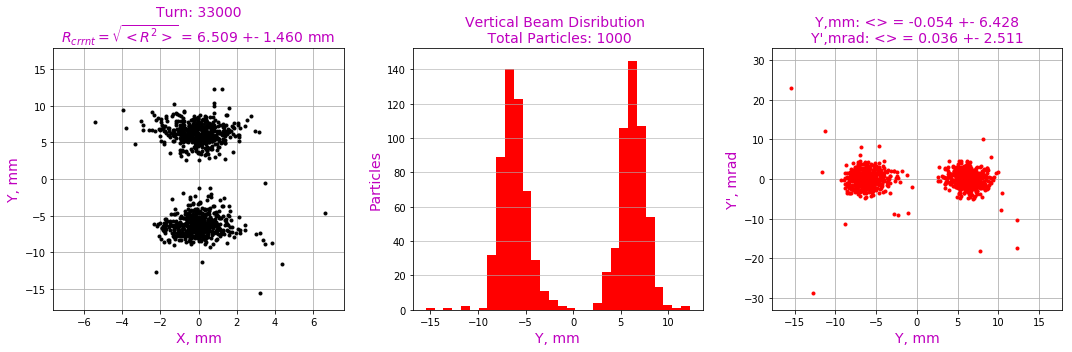


              After 33000 turns:


Update and plotting are completed (CPU time =  1.430 seconds)

Turn 33001 is completed (CPU time =  0.570 seconds)
Turn 33002 is completed (CPU time =  0.570 seconds)
Turn 33003 is completed (CPU time =  0.570 seconds)
Turn 33004 is completed (CPU time =  0.570 seconds)
Turn 33005 is completed (CPU time =  0.570 seconds)
Turn 33006 is completed (CPU time =  0.580 seconds)
Turn 33007 is completed (CPU time =  0.560 seconds)
Turn 33008 is completed (CPU time =  0.550 seconds)
Turn 33009 is completed (CPU time =  0.570 seconds)
Turn 33010 is completed (CPU time =  0.560 seconds)
Turn 33011 is completed (CPU time =  0.560 seconds)
Turn 33012 is completed (CPU time =  0.570 seconds)
Turn 33013 is completed (CPU time =  0.570 seconds)
Turn 33014 is completed (CPU time =  0.570 seconds)
Turn 33015 is completed (CPU time =  0.570 seconds)
Turn 33016 is completed (CPU time =  0.560 seconds)
Turn 33017 is completed (CPU time =  0.550 seconds)
Turn 33018 is com

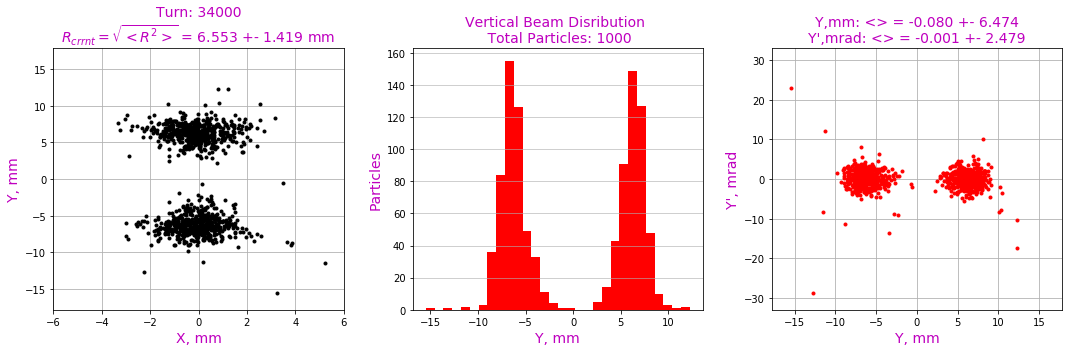


              After 34000 turns:


Update and plotting are completed (CPU time =  1.520 seconds)

Turn 34001 is completed (CPU time =  0.570 seconds)
Turn 34002 is completed (CPU time =  0.560 seconds)
Turn 34003 is completed (CPU time =  0.560 seconds)
Turn 34004 is completed (CPU time =  0.560 seconds)
Turn 34005 is completed (CPU time =  0.560 seconds)
Turn 34006 is completed (CPU time =  0.550 seconds)
Turn 34007 is completed (CPU time =  0.560 seconds)
Turn 34008 is completed (CPU time =  0.570 seconds)
Turn 34009 is completed (CPU time =  0.560 seconds)
Turn 34010 is completed (CPU time =  0.550 seconds)
Turn 34011 is completed (CPU time =  0.550 seconds)
Turn 34012 is completed (CPU time =  0.560 seconds)
Turn 34013 is completed (CPU time =  0.550 seconds)
Turn 34014 is completed (CPU time =  0.560 seconds)
Turn 34015 is completed (CPU time =  0.550 seconds)
Turn 34016 is completed (CPU time =  0.570 seconds)
Turn 34017 is completed (CPU time =  0.550 seconds)
Turn 34018 is com

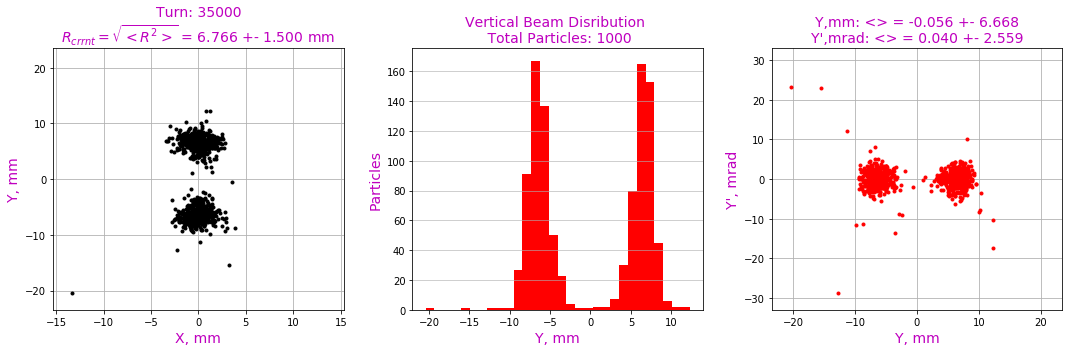


              After 35000 turns:


Update and plotting are completed (CPU time =  1.470 seconds)

Turn 35001 is completed (CPU time =  0.570 seconds)
Turn 35002 is completed (CPU time =  0.560 seconds)
Turn 35003 is completed (CPU time =  0.550 seconds)
Turn 35004 is completed (CPU time =  0.550 seconds)
Turn 35005 is completed (CPU time =  0.570 seconds)
Turn 35006 is completed (CPU time =  0.570 seconds)
Turn 35007 is completed (CPU time =  0.550 seconds)
Turn 35008 is completed (CPU time =  0.560 seconds)
Turn 35009 is completed (CPU time =  0.550 seconds)
Turn 35010 is completed (CPU time =  0.570 seconds)
Turn 35011 is completed (CPU time =  0.550 seconds)
Turn 35012 is completed (CPU time =  0.560 seconds)
Turn 35013 is completed (CPU time =  0.550 seconds)
Turn 35014 is completed (CPU time =  0.560 seconds)
Turn 35015 is completed (CPU time =  0.570 seconds)
Turn 35016 is completed (CPU time =  0.550 seconds)
Turn 35017 is completed (CPU time =  0.560 seconds)
Turn 35018 is com

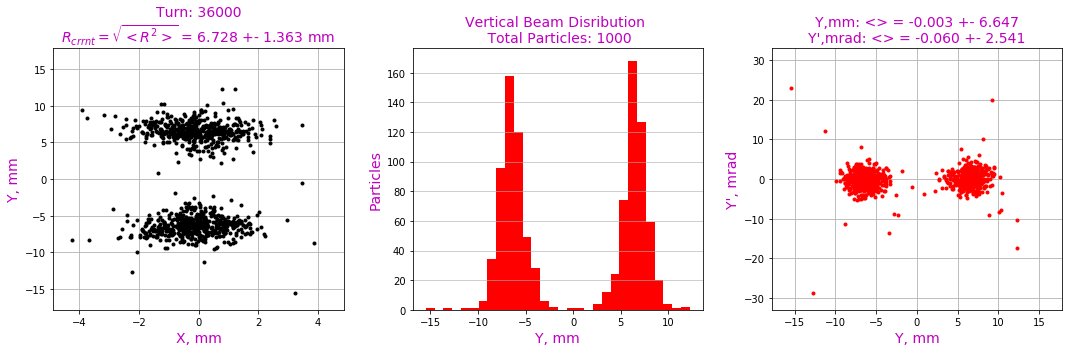


              After 36000 turns:


Update and plotting are completed (CPU time =  1.410 seconds)

Turn 36001 is completed (CPU time =  0.560 seconds)
Turn 36002 is completed (CPU time =  0.560 seconds)
Turn 36003 is completed (CPU time =  0.560 seconds)
Turn 36004 is completed (CPU time =  0.550 seconds)
Turn 36005 is completed (CPU time =  0.550 seconds)
Turn 36006 is completed (CPU time =  0.550 seconds)
Turn 36007 is completed (CPU time =  0.560 seconds)
Turn 36008 is completed (CPU time =  0.560 seconds)
Turn 36009 is completed (CPU time =  0.550 seconds)
Turn 36010 is completed (CPU time =  0.560 seconds)
Turn 36011 is completed (CPU time =  0.570 seconds)
Turn 36012 is completed (CPU time =  0.550 seconds)
Turn 36013 is completed (CPU time =  0.550 seconds)
Turn 36014 is completed (CPU time =  0.560 seconds)
Turn 36015 is completed (CPU time =  0.550 seconds)
Turn 36016 is completed (CPU time =  0.550 seconds)
Turn 36017 is completed (CPU time =  0.560 seconds)
Turn 36018 is com

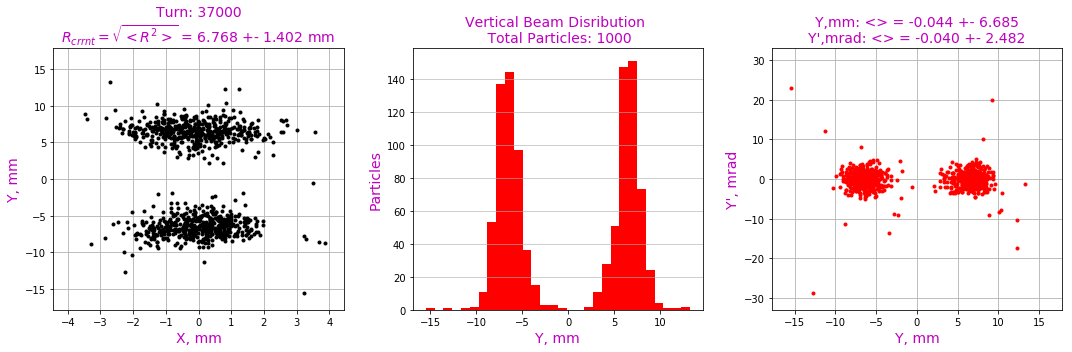


              After 37000 turns:


Update and plotting are completed (CPU time =  1.450 seconds)

Turn 37001 is completed (CPU time =  0.580 seconds)
Turn 37002 is completed (CPU time =  0.560 seconds)
Turn 37003 is completed (CPU time =  0.550 seconds)
Turn 37004 is completed (CPU time =  0.550 seconds)
Turn 37005 is completed (CPU time =  0.550 seconds)
Turn 37006 is completed (CPU time =  0.550 seconds)
Turn 37007 is completed (CPU time =  0.550 seconds)
Turn 37008 is completed (CPU time =  0.560 seconds)
Turn 37009 is completed (CPU time =  0.560 seconds)
Turn 37010 is completed (CPU time =  0.550 seconds)
Turn 37011 is completed (CPU time =  0.560 seconds)
Turn 37012 is completed (CPU time =  0.550 seconds)
Turn 37013 is completed (CPU time =  0.550 seconds)
Turn 37014 is completed (CPU time =  0.570 seconds)
Turn 37015 is completed (CPU time =  0.550 seconds)
Turn 37016 is completed (CPU time =  0.550 seconds)
Turn 37017 is completed (CPU time =  0.550 seconds)
Turn 37018 is com

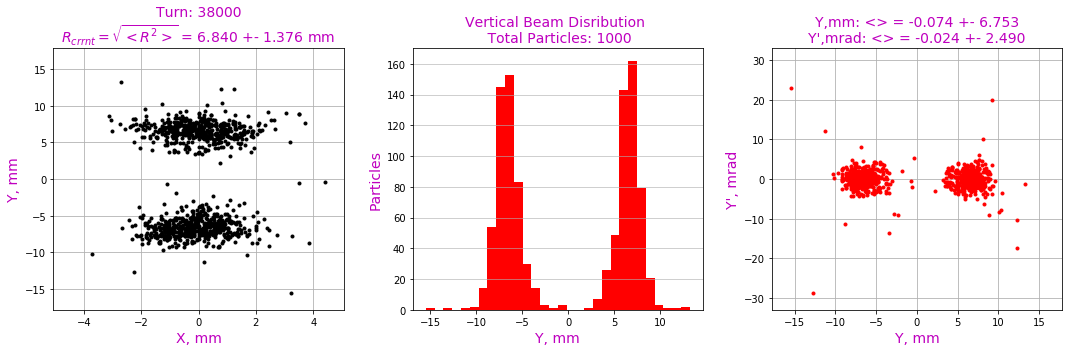


              After 38000 turns:


Update and plotting are completed (CPU time =  1.400 seconds)

Turn 38001 is completed (CPU time =  0.560 seconds)
Turn 38002 is completed (CPU time =  0.570 seconds)
Turn 38003 is completed (CPU time =  0.550 seconds)
Turn 38004 is completed (CPU time =  0.560 seconds)
Turn 38005 is completed (CPU time =  0.570 seconds)
Turn 38006 is completed (CPU time =  0.570 seconds)
Turn 38007 is completed (CPU time =  0.560 seconds)
Turn 38008 is completed (CPU time =  0.570 seconds)
Turn 38009 is completed (CPU time =  0.570 seconds)
Turn 38010 is completed (CPU time =  0.560 seconds)
Turn 38011 is completed (CPU time =  0.550 seconds)
Turn 38012 is completed (CPU time =  0.560 seconds)
Turn 38013 is completed (CPU time =  0.550 seconds)
Turn 38014 is completed (CPU time =  0.570 seconds)
Turn 38015 is completed (CPU time =  0.570 seconds)
Turn 38016 is completed (CPU time =  0.570 seconds)
Turn 38017 is completed (CPU time =  0.560 seconds)
Turn 38018 is com

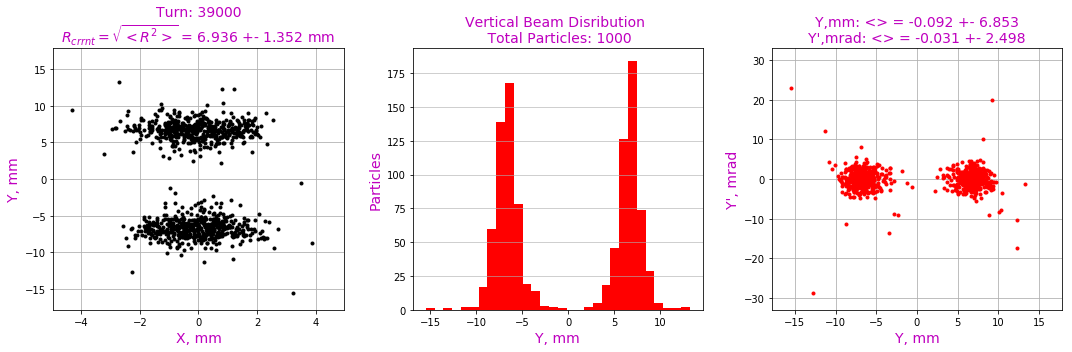


              After 39000 turns:


Update and plotting are completed (CPU time =  1.530 seconds)

Turn 39001 is completed (CPU time =  0.570 seconds)
Turn 39002 is completed (CPU time =  0.570 seconds)
Turn 39003 is completed (CPU time =  0.550 seconds)
Turn 39004 is completed (CPU time =  0.550 seconds)
Turn 39005 is completed (CPU time =  0.550 seconds)
Turn 39006 is completed (CPU time =  0.550 seconds)
Turn 39007 is completed (CPU time =  0.550 seconds)
Turn 39008 is completed (CPU time =  0.560 seconds)
Turn 39009 is completed (CPU time =  0.550 seconds)
Turn 39010 is completed (CPU time =  0.550 seconds)
Turn 39011 is completed (CPU time =  0.560 seconds)
Turn 39012 is completed (CPU time =  0.550 seconds)
Turn 39013 is completed (CPU time =  0.570 seconds)
Turn 39014 is completed (CPU time =  0.570 seconds)
Turn 39015 is completed (CPU time =  0.550 seconds)
Turn 39016 is completed (CPU time =  0.550 seconds)
Turn 39017 is completed (CPU time =  0.550 seconds)
Turn 39018 is com

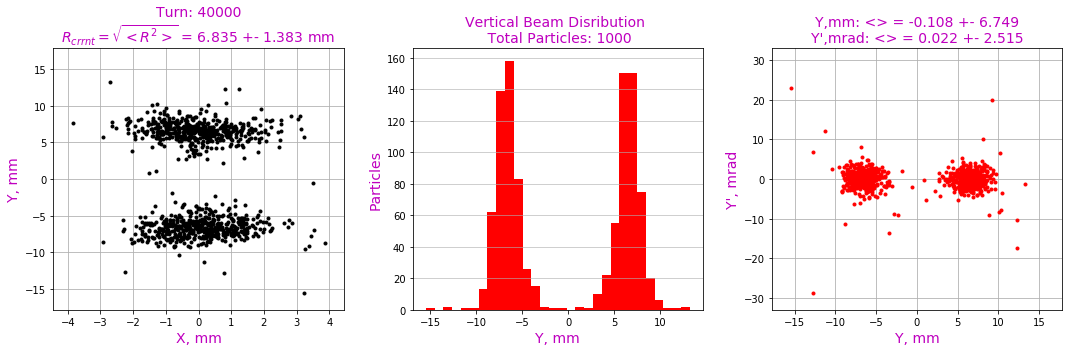


              After 40000 turns:


Update and plotting are completed (CPU time =  1.440 seconds)

Turn 40001 is completed (CPU time =  0.560 seconds)
Turn 40002 is completed (CPU time =  0.550 seconds)
Turn 40003 is completed (CPU time =  0.550 seconds)
Turn 40004 is completed (CPU time =  0.550 seconds)
Turn 40005 is completed (CPU time =  0.560 seconds)
Turn 40006 is completed (CPU time =  0.550 seconds)
Turn 40007 is completed (CPU time =  0.550 seconds)
Turn 40008 is completed (CPU time =  0.550 seconds)
Turn 40009 is completed (CPU time =  0.550 seconds)
Turn 40010 is completed (CPU time =  0.550 seconds)
Turn 40011 is completed (CPU time =  0.550 seconds)
Turn 40012 is completed (CPU time =  0.550 seconds)
Turn 40013 is completed (CPU time =  0.550 seconds)
Turn 40014 is completed (CPU time =  0.550 seconds)
Turn 40015 is completed (CPU time =  0.560 seconds)
Turn 40016 is completed (CPU time =  0.550 seconds)
Turn 40017 is completed (CPU time =  0.550 seconds)
Turn 40018 is com

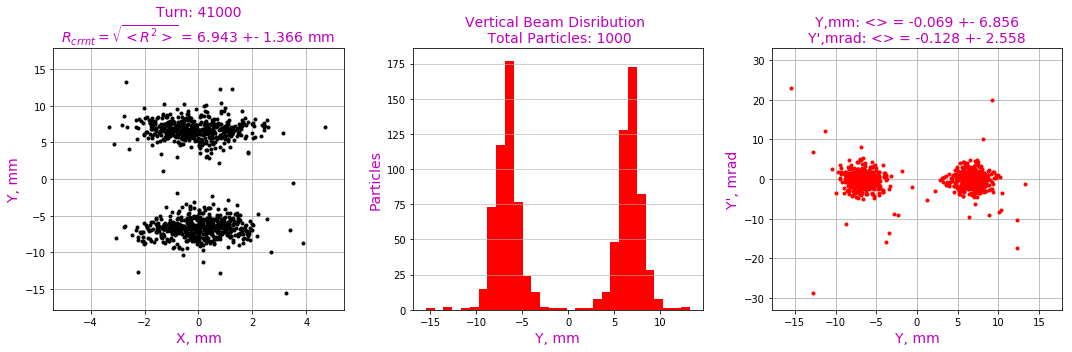


              After 41000 turns:


Update and plotting are completed (CPU time =  1.400 seconds)

Turn 41001 is completed (CPU time =  0.560 seconds)
Turn 41002 is completed (CPU time =  0.550 seconds)
Turn 41003 is completed (CPU time =  0.550 seconds)
Turn 41004 is completed (CPU time =  0.550 seconds)
Turn 41005 is completed (CPU time =  0.560 seconds)
Turn 41006 is completed (CPU time =  0.550 seconds)
Turn 41007 is completed (CPU time =  0.550 seconds)
Turn 41008 is completed (CPU time =  0.540 seconds)
Turn 41009 is completed (CPU time =  0.550 seconds)
Turn 41010 is completed (CPU time =  0.550 seconds)
Turn 41011 is completed (CPU time =  0.550 seconds)
Turn 41012 is completed (CPU time =  0.550 seconds)
Turn 41013 is completed (CPU time =  0.550 seconds)
Turn 41014 is completed (CPU time =  0.550 seconds)
Turn 41015 is completed (CPU time =  0.550 seconds)
Turn 41016 is completed (CPU time =  0.550 seconds)
Turn 41017 is completed (CPU time =  0.550 seconds)
Turn 41018 is com

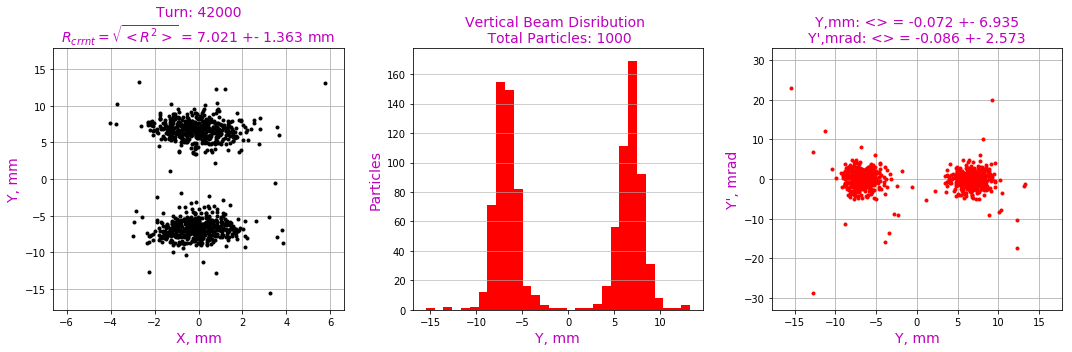


              After 42000 turns:


Update and plotting are completed (CPU time =  1.430 seconds)

Turn 42001 is completed (CPU time =  0.580 seconds)
Turn 42002 is completed (CPU time =  0.570 seconds)
Turn 42003 is completed (CPU time =  0.550 seconds)
Turn 42004 is completed (CPU time =  0.560 seconds)
Turn 42005 is completed (CPU time =  0.550 seconds)
Turn 42006 is completed (CPU time =  0.550 seconds)
Turn 42007 is completed (CPU time =  0.550 seconds)
Turn 42008 is completed (CPU time =  0.550 seconds)
Turn 42009 is completed (CPU time =  0.550 seconds)
Turn 42010 is completed (CPU time =  0.550 seconds)
Turn 42011 is completed (CPU time =  0.540 seconds)
Turn 42012 is completed (CPU time =  0.550 seconds)
Turn 42013 is completed (CPU time =  0.550 seconds)
Turn 42014 is completed (CPU time =  0.550 seconds)
Turn 42015 is completed (CPU time =  0.560 seconds)
Turn 42016 is completed (CPU time =  0.550 seconds)
Turn 42017 is completed (CPU time =  0.550 seconds)
Turn 42018 is com

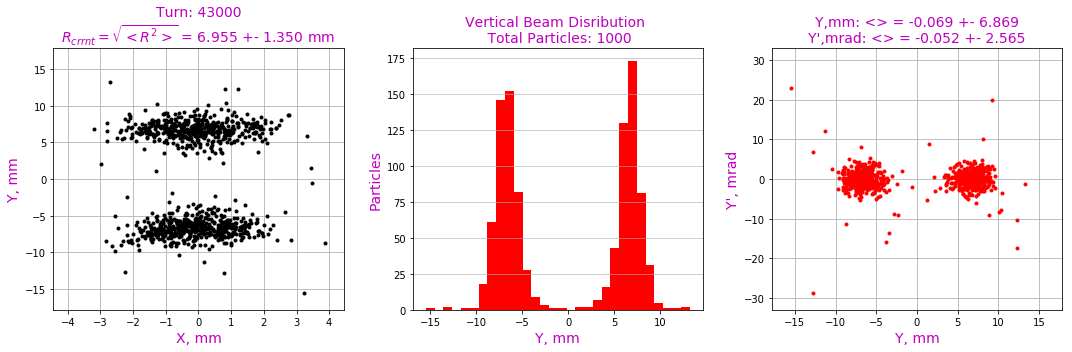


              After 43000 turns:


Update and plotting are completed (CPU time =  1.470 seconds)

Turn 43001 is completed (CPU time =  0.560 seconds)
Turn 43002 is completed (CPU time =  0.570 seconds)
Turn 43003 is completed (CPU time =  0.550 seconds)
Turn 43004 is completed (CPU time =  0.550 seconds)
Turn 43005 is completed (CPU time =  0.550 seconds)
Turn 43006 is completed (CPU time =  0.550 seconds)
Turn 43007 is completed (CPU time =  0.550 seconds)
Turn 43008 is completed (CPU time =  0.550 seconds)
Turn 43009 is completed (CPU time =  0.570 seconds)
Turn 43010 is completed (CPU time =  0.550 seconds)
Turn 43011 is completed (CPU time =  0.550 seconds)
Turn 43012 is completed (CPU time =  0.550 seconds)
Turn 43013 is completed (CPU time =  0.550 seconds)
Turn 43014 is completed (CPU time =  0.550 seconds)
Turn 43015 is completed (CPU time =  0.550 seconds)
Turn 43016 is completed (CPU time =  0.570 seconds)
Turn 43017 is completed (CPU time =  0.560 seconds)
Turn 43018 is com

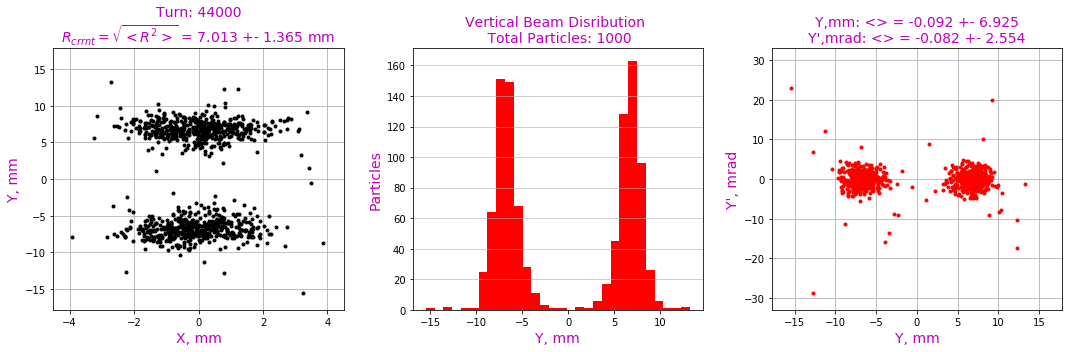


              After 44000 turns:


Update and plotting are completed (CPU time =  1.430 seconds)

Turn 44001 is completed (CPU time =  0.570 seconds)
Turn 44002 is completed (CPU time =  0.570 seconds)
Turn 44003 is completed (CPU time =  0.550 seconds)
Turn 44004 is completed (CPU time =  0.550 seconds)
Turn 44005 is completed (CPU time =  0.560 seconds)
Turn 44006 is completed (CPU time =  0.570 seconds)
Turn 44007 is completed (CPU time =  0.550 seconds)
Turn 44008 is completed (CPU time =  0.550 seconds)
Turn 44009 is completed (CPU time =  0.570 seconds)
Turn 44010 is completed (CPU time =  0.550 seconds)
Turn 44011 is completed (CPU time =  0.570 seconds)
Turn 44012 is completed (CPU time =  0.560 seconds)
Turn 44013 is completed (CPU time =  0.550 seconds)
Turn 44014 is completed (CPU time =  0.550 seconds)
Turn 44015 is completed (CPU time =  0.560 seconds)
Turn 44016 is completed (CPU time =  0.550 seconds)
Turn 44017 is completed (CPU time =  0.560 seconds)
Turn 44018 is com

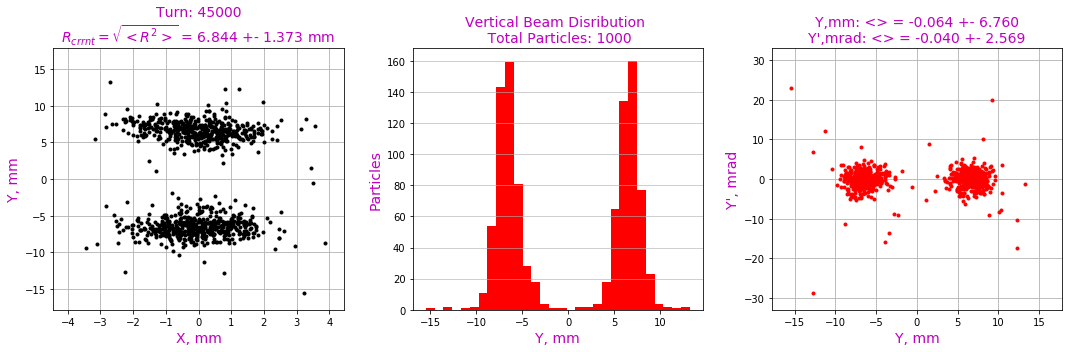


              After 45000 turns:


Update and plotting are completed (CPU time =  1.520 seconds)

Turn 45001 is completed (CPU time =  0.570 seconds)
Turn 45002 is completed (CPU time =  0.590 seconds)
Turn 45003 is completed (CPU time =  0.570 seconds)
Turn 45004 is completed (CPU time =  0.550 seconds)
Turn 45005 is completed (CPU time =  0.550 seconds)
Turn 45006 is completed (CPU time =  0.560 seconds)
Turn 45007 is completed (CPU time =  0.550 seconds)
Turn 45008 is completed (CPU time =  0.550 seconds)
Turn 45009 is completed (CPU time =  0.550 seconds)
Turn 45010 is completed (CPU time =  0.540 seconds)
Turn 45011 is completed (CPU time =  0.560 seconds)
Turn 45012 is completed (CPU time =  0.550 seconds)
Turn 45013 is completed (CPU time =  0.550 seconds)
Turn 45014 is completed (CPU time =  0.560 seconds)
Turn 45015 is completed (CPU time =  0.550 seconds)
Turn 45016 is completed (CPU time =  0.550 seconds)
Turn 45017 is completed (CPU time =  0.560 seconds)
Turn 45018 is com

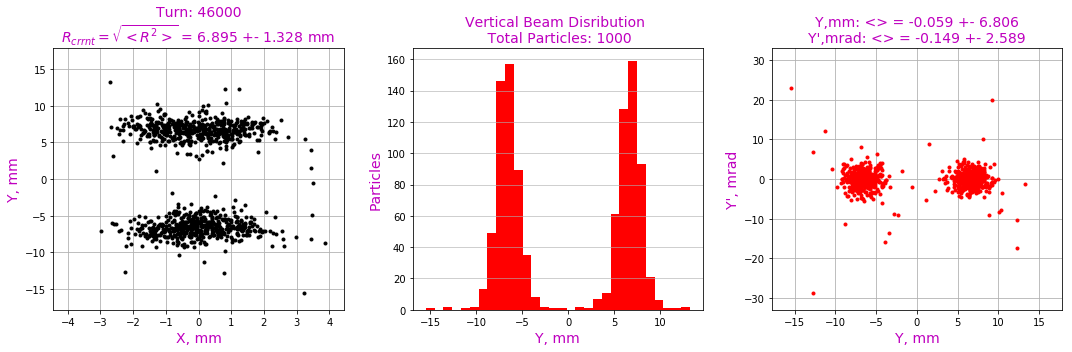


              After 46000 turns:


Update and plotting are completed (CPU time =  1.460 seconds)

Turn 46001 is completed (CPU time =  0.570 seconds)
Turn 46002 is completed (CPU time =  0.570 seconds)
Turn 46003 is completed (CPU time =  0.550 seconds)
Turn 46004 is completed (CPU time =  0.560 seconds)
Turn 46005 is completed (CPU time =  0.550 seconds)
Turn 46006 is completed (CPU time =  0.570 seconds)
Turn 46007 is completed (CPU time =  0.560 seconds)
Turn 46008 is completed (CPU time =  0.570 seconds)
Turn 46009 is completed (CPU time =  0.570 seconds)
Turn 46010 is completed (CPU time =  0.570 seconds)
Turn 46011 is completed (CPU time =  0.570 seconds)
Turn 46012 is completed (CPU time =  0.560 seconds)
Turn 46013 is completed (CPU time =  0.550 seconds)
Turn 46014 is completed (CPU time =  0.560 seconds)
Turn 46015 is completed (CPU time =  0.560 seconds)
Turn 46016 is completed (CPU time =  0.570 seconds)
Turn 46017 is completed (CPU time =  0.570 seconds)
Turn 46018 is com

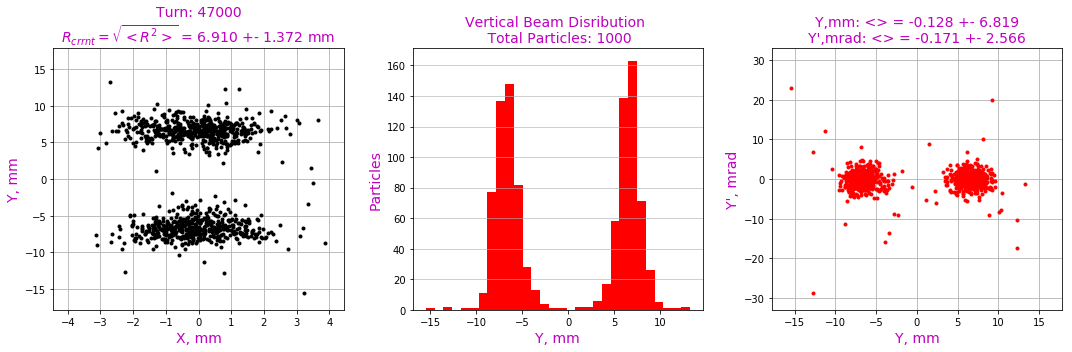


              After 47000 turns:


Update and plotting are completed (CPU time =  1.420 seconds)

Turn 47001 is completed (CPU time =  0.550 seconds)
Turn 47002 is completed (CPU time =  0.560 seconds)
Turn 47003 is completed (CPU time =  0.550 seconds)
Turn 47004 is completed (CPU time =  0.550 seconds)
Turn 47005 is completed (CPU time =  0.550 seconds)
Turn 47006 is completed (CPU time =  0.550 seconds)
Turn 47007 is completed (CPU time =  0.550 seconds)
Turn 47008 is completed (CPU time =  0.550 seconds)
Turn 47009 is completed (CPU time =  0.550 seconds)
Turn 47010 is completed (CPU time =  0.550 seconds)
Turn 47011 is completed (CPU time =  0.550 seconds)
Turn 47012 is completed (CPU time =  0.550 seconds)
Turn 47013 is completed (CPU time =  0.550 seconds)
Turn 47014 is completed (CPU time =  0.550 seconds)
Turn 47015 is completed (CPU time =  0.550 seconds)
Turn 47016 is completed (CPU time =  0.550 seconds)
Turn 47017 is completed (CPU time =  0.550 seconds)
Turn 47018 is com

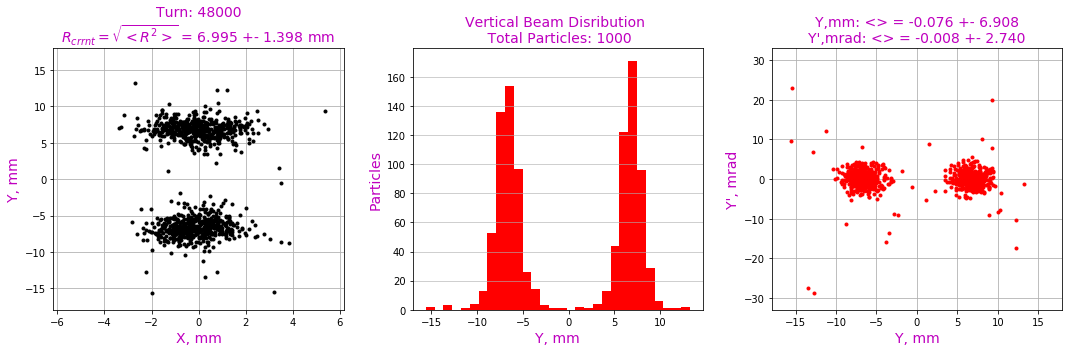


              After 48000 turns:


Update and plotting are completed (CPU time =  1.410 seconds)

Turn 48001 is completed (CPU time =  0.550 seconds)
Turn 48002 is completed (CPU time =  0.570 seconds)
Turn 48003 is completed (CPU time =  0.560 seconds)
Turn 48004 is completed (CPU time =  0.560 seconds)
Turn 48005 is completed (CPU time =  0.550 seconds)
Turn 48006 is completed (CPU time =  0.550 seconds)
Turn 48007 is completed (CPU time =  0.550 seconds)
Turn 48008 is completed (CPU time =  0.550 seconds)
Turn 48009 is completed (CPU time =  0.550 seconds)
Turn 48010 is completed (CPU time =  0.550 seconds)
Turn 48011 is completed (CPU time =  0.570 seconds)
Turn 48012 is completed (CPU time =  0.560 seconds)
Turn 48013 is completed (CPU time =  0.540 seconds)
Turn 48014 is completed (CPU time =  0.550 seconds)
Turn 48015 is completed (CPU time =  0.550 seconds)
Turn 48016 is completed (CPU time =  0.550 seconds)
Turn 48017 is completed (CPU time =  0.550 seconds)
Turn 48018 is com

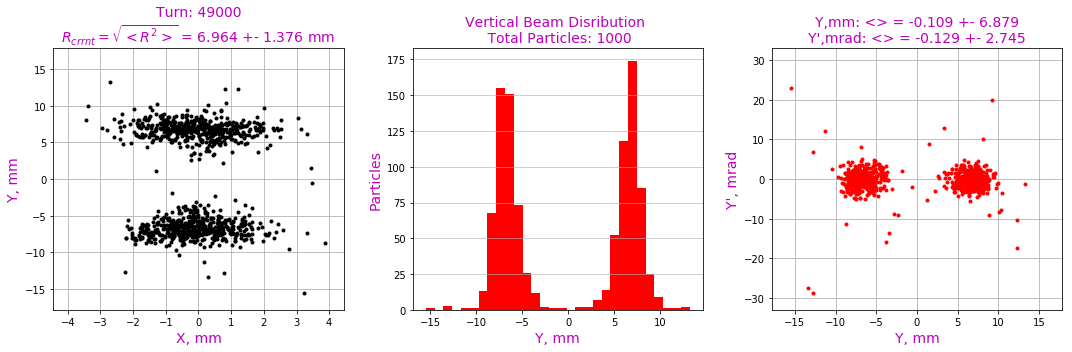


              After 49000 turns:


Update and plotting are completed (CPU time =  1.430 seconds)

Turn 49001 is completed (CPU time =  0.550 seconds)
Turn 49002 is completed (CPU time =  0.560 seconds)
Turn 49003 is completed (CPU time =  0.550 seconds)
Turn 49004 is completed (CPU time =  0.560 seconds)
Turn 49005 is completed (CPU time =  0.550 seconds)
Turn 49006 is completed (CPU time =  0.560 seconds)
Turn 49007 is completed (CPU time =  0.560 seconds)
Turn 49008 is completed (CPU time =  0.570 seconds)
Turn 49009 is completed (CPU time =  0.540 seconds)
Turn 49010 is completed (CPU time =  0.550 seconds)
Turn 49011 is completed (CPU time =  0.560 seconds)
Turn 49012 is completed (CPU time =  0.550 seconds)
Turn 49013 is completed (CPU time =  0.560 seconds)
Turn 49014 is completed (CPU time =  0.570 seconds)
Turn 49015 is completed (CPU time =  0.570 seconds)
Turn 49016 is completed (CPU time =  0.550 seconds)
Turn 49017 is completed (CPU time =  0.550 seconds)
Turn 49018 is com

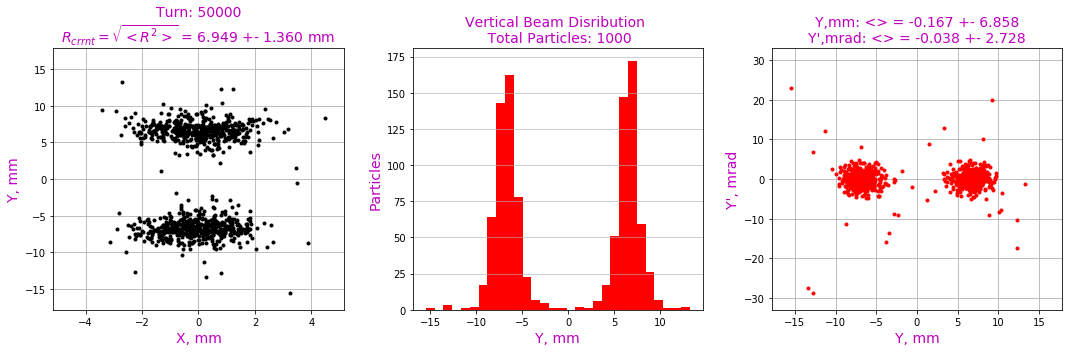

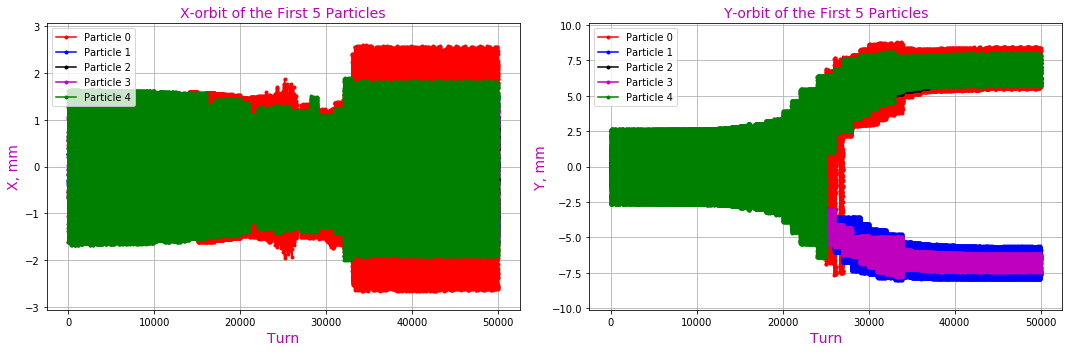

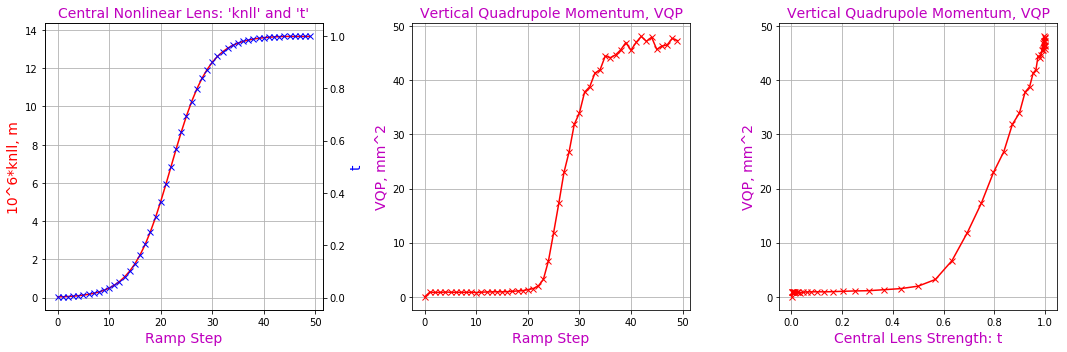


totalLostParticles =  269


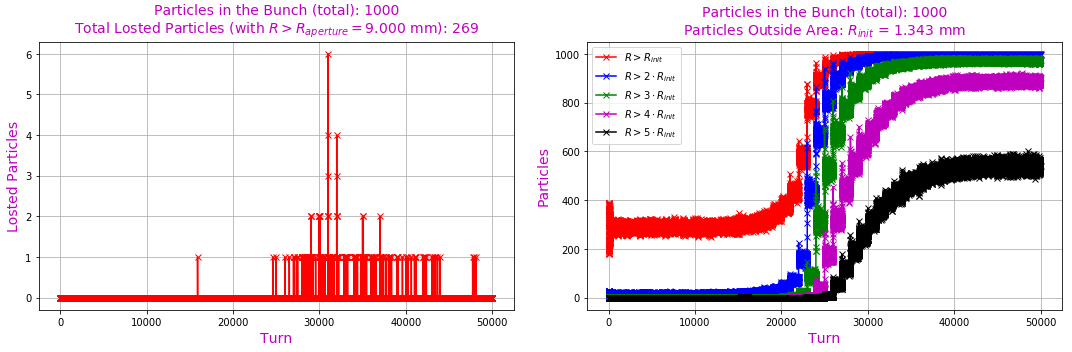


For 50000 turns CPU time = 28201.430 seconds



In [ ]:
# 
# This script develops the script 'variabledNLsimulation_v1.py' (Yury Eidelman)
#
#    Started at June 28, 2019
#
# The three laws to change the strengths 't' of all nonlinear lens are implemented.
# From initial value t_i to final value t_f during N stepsthese laws are follows.
# 1) Linear: for step number n
#           t(n) = t_0 + (t_f-t_0)*n/(N-1) for n = 0,1,...,N-1 .
# 2) Parabolic: for step number n
#           t(n) = t_0 + (t_f-t_0)*n^2/(N-1)^2 for n = 0,1,...,N-1 .
# 3) Smooth sign-function: for step number n
#           t(n) = .5*(t_0+t_f) + .5*(t_f-t_0)*tanh(x(n)), where
#           x(n) = (6*n-3*(N-1))/(N-1) for n=0,1,...,N-1 .
# In this approach x(0) = -3., x(N-1) = 3.; so, tanh(3.) = - tanh(-3.) = .9951
#
# The possibility of relative or absolute changing of the strengths of nonlinear lenses 
# is also included: 
#
# In the first case (relative), the strengths of all lenses sequentially in steps change 
# with the same coefficient, chosen so that at the last step of the adjustment to reach 
# the specified full level of change of the initial (from lattice file) strengths of the 
# lenses. 
#
# In the second version of the changing (absolute), the lenses strengths start with the
# values determined by the initial value of the parameter t_in for the central lens of a 
# nonlinear insertion (and not from the values recorded in lattice file) and end with the 
# values corresponding to the final parameter value t_fin for the central lens.
#
# The script uses the following two scripts as its own part:
#      'nonlinearInsertion.py' and 'lawsMagnification.py' .
#
# Version v2 of rge script was finished at 07/12/2019
#
# Version v3 started at 07/12/2019
#

import synergia
import os, sys
import inspect
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec

import rssynergia 
from rssynergia.base_diagnostics import lfplot
from rssynergia.base_diagnostics import plotbeam
from rssynergia.base_diagnostics import pltbunch

def averageRadius(x,y,numbPartcls):
    x2y2sum = 0.
    for k in range(numbPartcls):
        x2y2sum += x[k]**2+y[k]**2
    x2y2avr = np.sqrt(x2y2sum/numbPartcls)
    x2y2dSum = 0.
    for k in range(numbPartcls):
        x2y2dSum += (np.sqrt(x[k]**2+y[k]**2)-x2y2avr)**2
    x2y2dAvr = np.sqrt(x2y2dSum/numbPartcls)
    return x2y2avr,x2y2dAvr

def plotcoordDistr(bunchParticles,saveFlag,turn,knllCentrLens):
#    
# Plot X-X', Y-Y', and X-Y distributions for 'bunchParticles'
#
# bunchParticles is a 'bunch' object;
# particles is 2D array: (numberOfParticles,(x,x',y,y',s,dp(?),ID);
#
    numbPartcls = bunchParticles.shape[0]
    particles = bunchParticles.real
    newCoordinates = np.zeros((6,numbPartcls))
    for k in range(numbPartcls):
        for j in range(6):
            newCoordinates[j,k] = 1.e3*particles[k,j]  # Units: mm and mrad 
    xmax = 1.15*np.max(abs(newCoordinates[0,:]))
    xpmax = 1.15*np.max(abs(newCoordinates[1,:]))
    ymax = 1.15*np.max(abs(newCoordinates[2,:]))
    ypmax = 1.15*np.max(abs(newCoordinates[3,:]))
    meanX = np.mean(newCoordinates[0,:])
    meanPX = np.mean(newCoordinates[1,:])
    stdX = np.std(newCoordinates[0,:])
    stdPX = np.std(newCoordinates[1,:])
    meanY = np.mean(newCoordinates[2,:])
    meanPY = np.mean(newCoordinates[3,:])
    stdY = np.std(newCoordinates[2,:])
    stdPY = np.std(newCoordinates[3,:])
    x2y2avr,x2y2dAvr = \
    averageRadius(newCoordinates[0,:],newCoordinates[2,:],numbPartcls)

# Another way - use gridspec
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
    
    ax0 = plt.subplot(gs[0])
    plt.plot(newCoordinates[0,:],newCoordinates[2,:],'.',color='k')
    x0Title = "Turn: {:4d}".format(int(turn))+"\n$R_{crrnt}=\sqrt{<R^2>}$ = "+"{:.3f} +- {:.3f} mm". \
              format(x2y2avr,x2y2dAvr)
    ax0.set_title(x0Title,color='m',fontsize='14')
    ax0.set_xlim([-xmax,xmax])
    ax0.set_ylim([-ymax,ymax])
    ax0.set_xlabel('X, mm',color='m',fontsize='14')
    ax0.set_ylabel('Y, mm',color='m',fontsize='14')
    ax0.grid(True)
    
#    ax1 = plt.subplot(gs[1])
#    plt.plot(newCoordinates[0,:],newCoordinates[1,:],'.',color='b')
#    x1Title = "X,mm: <> = {:.3f} +- {:.3f}\nX\',mrad: <> = {:.3f} +- {:.3f}". \
#              format(meanX,stdX,meanPX,stdPX)
#    ax1.set_title(x1Title,color='m',fontsize='14')
#    ax1.set_xlim([-xmax,xmax])
#    ax1.set_ylim([-xpmax,xpmax])
#    ax1.set_xlabel('X, mm',color='m',fontsize='14')
#    ax1.set_ylabel('X\', mrad',color='m',fontsize='14')
#    ax1.grid(True)

    ax1 = plt.subplot(gs[1])
    ax1.hist(newCoordinates[2,:], color='r', bins=30)    
    ax1.grid(axis='y', alpha=0.75)
    ax1.set_xlabel('Y, mm',color='m',fontsize='14')
    ax1.set_ylabel('Particles',color='m',fontsize='14')
    x1Title = "Vertical Beam Disribution \n Total Particles: {}".format(numbPartcls)
    ax1.set_title(x1Title,color='m',fontsize='14')

    ax2 = plt.subplot(gs[2])
    plt.plot(newCoordinates[2,:],newCoordinates[3,:],'.',color='r')
    x2Title = "Y,mm: <> = {:.3f} +- {:.3f}\nY\',mrad: <> = {:.3f} +- {:.3f}". \
              format(meanY,stdY,meanPY,stdPY)
    ax2.set_title(x2Title,color='m',fontsize='14')
    ax2.set_xlim([-ymax,ymax])
    ax2.set_ylim([-ypmax,ypmax])
    ax2.set_xlabel('Y, mm',color='m',fontsize='14')
    ax2.set_ylabel('Y\', mrad',color='m',fontsize='14')
    ax2.grid(True)
    
#    fig.canvas.set_window_title('Synergia Phase Space Distribution')
    fig.tight_layout()
    plt.show()
#    if saveFlag == 1:
#        fileName = "coordDistr_turn-{:04d}_knll-{:.3e}.pdf".format(turn,knllCentrLens)
#        plt.savefig(fileName,bbox_inches='tight')
#        plt.savefig(fileName)
    return

def plotTracks(tracksCoords,numberTracks):
#    
# Plot'numberTracks' tracks from 'tracksCoords'
#
# tracksCoords is 3D array: (totalTurns,particles,(x,y))
#
#    print "numberTracks = ",numberTracks
    trackColor = ['r','b','k','m','g']
    numbPoints = tracksCoords.shape[0]
#    print "numbPoints = ",numbPoints
    xmax = 1.15*np.max(np.max(abs(tracksCoords[:,0:numberTracks,0])))
    ymax = 1.15*np.max(np.max(abs(tracksCoords[:,0:numberTracks,1])))

    turn = np.arange(0,numbPoints)
# Another way - use gridspec
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
    
    ax0 = plt.subplot(gs[0])
    for prtcl in range(numberTracks):
        plt.plot(turn,tracksCoords[0:numbPoints,prtcl,0],'.-',color=trackColor[prtcl])
#    x0Title = "X,mm: <> = {:.3f} +- {:.3f}\nY,mm: <> = {:.3f} +- {:.3f}". \
#              format(meanX,stdX,meanY,stdY)
    x0Title = "X-orbit of the First 5 Particles"
    ax0.set_title(x0Title,color='m',fontsize='14')
    ax0.set_ylim([-xmax,xmax])
    ax0.set_xlabel('Turn',color='m',fontsize='14')
    ax0.set_ylabel('X, mm',color='m',fontsize='14')
    ax0.legend(['Particle 0','Particle 1','Particle 2','Particle 3','Particle 4'],loc='upper left')
    ax0.grid(True)

    ax1 = plt.subplot(gs[1])
    for prtcl in range(numberTracks):
        plt.plot(turn,tracksCoords[0:numbPoints,prtcl,1],'.-',color=trackColor[prtcl])
#    x1Title = "X,mm: <> = {:.3f} +- {:.3f}\nY,mm: <> = {:.3f} +- {:.3f}". \
#              format(meanX,stdX,meanY,stdY)
    x1Title = "Y-orbit of the First 5 Particles"
    ax1.set_title(x1Title,color='m',fontsize='14')
    ax1.set_ylim([-ymax,ymax])
    ax1.set_xlabel('Turn',color='m',fontsize='14')
    ax1.set_ylabel('Y, mm',color='m',fontsize='14')
    ax1.legend(['Particle 0','Particle 1','Particle 2','Particle 3','Particle 4'],loc='upper left')
    ax1.grid(True)
       
#    fig.canvas.set_window_title('Synergia Phase Space Distribution')
    fig.tight_layout()
    plt.show()
    return

def plotParamLens(s_center,knll,cnll,title0,title1):
#
# Plot distribution of the strength 'knll' of the nonlinear lens inside
# nonlinear insertion:
#
    knll_plot = np.zeros(len(knll))
    for n in range(len(knll)):
        knll_plot[n]=1.e6*knll[n]
# Another way - use gridspec
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
    
    ax0 = plt.subplot(gs[0])
    plt.plot(s_center,knll_plot,'-x',color='r')
    ax0.set_xlabel('s, m',color='m',fontsize=14)
    ax0.set_ylabel('10^6 * knll, m',color='m',fontsize=14)
    ax0.set_title(title0,color='m',fontsize=14)
    ax0.grid(True)

    ax1 = plt.subplot(gs[1])
    plt.plot(s_center,cnll,'-x',color='r')
    ax1.set_xlabel('s, m',color='m',fontsize=14)
    ax1.set_ylabel('cnll, m^1/2',color='m',fontsize=14)
    ax1.set_title(title1,color='m',fontsize=14)
    ax1.grid(True)
       
    fig.tight_layout()
    plt.show()
    return

def printAttributes(object,name,title):
#
# List of all attributes of 'object' for checking:
#
    attrList = inspect.getmembers(object)
    strTitle = "\nattrList ("+name+" = "+title+"):\n{}\n"
    print strTitle.format(attrList)

def tracksCoords(bunchParticles):
#
# Preparation of the track coordinates:
#
# 'bunchParticle' is a 'bunch' object;
# 'particles' is 2D array: (numberParticle,(x,x',y,y',s,dE,ID));
#
    numbPartcls = bunchParticles.shape[0]
    particles = bunchParticles.real
# 'trackCoordinates' is 2D array: (numberParticle,(x,y)):
    trackCoordinates = np.zeros((numbPartcls,2))
    for prtcl in range(numbPartcls):
        trackCoordinates[prtcl,0] = 1.e3*particles[prtcl,0]       # x, mm
        trackCoordinates[prtcl,1] = 1.e3*particles[prtcl,2]       # y, mm
#        if prtcl < 3:
#            print "Particle {}: x = {} mm, y = {} mm". \
#            format(prtcl,trackCoordinates[prtcl,0],trackCoordinates[prtcl,1])
    return trackCoordinates 
    
class NonlinearInsertion(object):
#  
# Generation of the nonlinear lenses as set of segments of the nonlinear insertion
#
# Source: 
#   1) Nonlinear Accelerator Lattices with One and Two Analytic Invariants.
#      V. Danilov and S. Nagaitsev. Phys. Rev. ST Accel. Beams 13, 084002 (2010);
#      https://journals.aps.org/prab/pdf/10.1103/PhysRevSTAB.13.084002.  
#   2) Complex Representation of Potentials and Fields for the Nonlinear 
#      Magnetic Insert of the Integrable Optics Test Accelerator.
#      Chad Mitchell. March 2017; https://esholarship.org/uc/item/7dt4t236.
#   3) Madx CERN User Guide. Chapter 10.10 - Nonlinear Lens with Elliptical Potential.
#      http://mad.web.cern.ch/mad/
#
# Input args:
#   length:     the length of the nonlinear insertion (float, m);
#   phase:      the phase advance modulo 2pi through the nonlinear insertion;
#   t:          the strength parameter for center of the insertion (float, dimensionless, 
#               defaults to 0.1);
#   c:          the aperture parameter for center of the insertion 
#               (float, m^1/2, is defined by poles in the x-axis, defaults to 0.01);
#   num_lens:   the number of lonlinear lenses as an segments of the insertion (int, defaults to 20).   

#
# Output attributes are the same as input one.
#
    def __init__(self, length, phase, t = 0.1, c = 0.01, num_lens = 20):
        self.length = length
        self.phase = phase
        self.t = t
        self._c = c
        self.num_lens = num_lens
#        print "Input data for NonlinearInsertion:\nlength = ",self.length,", phase = ",self.phase, \
#              ", t = ",self.t,", c = ",self.c,", num_lens = ",self.num_lens
# Aperture parameter c must be positive:
    @property
    def c(self):
        return self._c
    @c.setter
    def c(self, cval):
        if cval < 0:
            raise ValueError("Aperture parameter c must be positive")     
        self._c = c
#
# Output attributes of 'generate_lens' method:
#
#   same as output of 'NonlinearInsertion'class and as well:
#   s_vals (ndArray): coordinates of the center of each nonlinear lens (float ndArray, m);
#   knll (ndArray):   "strength" of each nonlinear lens (float ndArray, m);
#   cnll (ndArray):   aperture parameters for each nonlinear lens (float ndArray, m^1/2).
#   
    def generate_lens(self,flag):
        indxShift = self.num_lens-2*((self.num_lens+1)/2)+1
# Focal length f0 of the insertion (m):
        f0 = self.length/4.0*(1.0+1.0/np.tan(np.pi*self.phase)**2)
#        print "f0 = ",f0
# Coordinates s_vals of the center of each nonlinear lens (m):
        first_lens = .5*(self.length/self.num_lens)
        last_lens = self.length - first_lens
        s_vals = np.linspace(first_lens,last_lens,self.num_lens) 
        self.s_vals = s_vals
        
# Set the structural beta-function of the nonlinear magnet (m):
        beta_n = self.length*(1.-s_vals*(self.length-s_vals)/self.length/f0)/ \
                 np.sqrt(1.0-(1.0-self.length/2.0/f0)**2)
#        self.betas = beta_n
        
        cnll = self.c*np.sqrt(beta_n)

        knn = self.t*self.length/self.num_lens/beta_n**2
        knll = knn*cnll**2
# Sequence of lenses start from the minimal value of knll (flag = 1):
        self.cnll = cnll
        self.knll = knll
# Sequence of lenses start from the maximal value of knll (flag = 2):
        if flag == 2:
            cnll_help = []
            knll_help = []
            indxMax = 0
            for n in range(self.num_lens-1):
                if knll[n] < knll[n+1]:
                    indxMax = n+1
                else:
                    break
            for n in range (self.num_lens):
                if n <= indxMax:
                    cnll_help.append(float(cnll[indxMax-n]))
                    knll_help.append(float(knll[indxMax-n]))
                else:
                    cnll_help.append(float(cnll[n-indxMax-indxShift]))
                    knll_help.append(float(knll[n-indxMax-indxShift]))
            self.cnll = cnll_help
            self.knll = knll_help
        return self
                
# Pickle helper is not necessary but is retained for this example
#
class Pickle_helper:
    __getstate_manages_dict__ = 1
    def __init__(self, *args):
        self.args = args
    def __getinitargs__(self):
        return self.args
    def __getstate__(self):
        return self.__dict__
    def __setstate__(self, state):
        self.__dict__ = state
        
# Definition of class to ramp nonlinear lens

class Ramp_actions(synergia.simulation.Propagate_actions, Pickle_helper):
#
# Args of 'Ramp_actions' method are: 
# 'type'             - type of magnification (1 - relative, 2 - absolute),
# 'stepNumber'       - current step of magnification,
# 'strengthLens'     - set of strengthes 't' of central lens of the nonlinear insertion for all steps of
#                      magnification (relative magnification) or set of strengthes 't' of all lenses for 
#                      current step (absolute magnification),
# 'updateOutputFlag' - flag to output the strength of one of nonlinear lens after it's magnification 
#                      for current step,
# controlName        - name of lens with maximal strength to use in output for checking of process 
#                     of magnification.    
#

#
# The arguments to __init__ are what the Ramp_actions instance is initialized with:
    def __init__(self, type,stepNumber,strengthLens,outputFlag,controlName):
        selfObject = synergia.simulation.Propagate_actions.__init__(self)
# To recognize attributes of 'selfObject':
#        printAttributes(selfObject,'selfObject','synergia.simulation.Propagate_actions.__init__(self)')

# Pickling the arguments to the initializer allows the module to resume
# after checkpointing. They should be in the same order as the arguments to __init__.
        Pickle_helper.__init__(self, type,stepNumber,strengthLens,outputFlag,controlName)
        self.type = type
        self.stepNumber = stepNumber
        self.strengthLens = strengthLens        
        self.outputFlag = outputFlag
        self.controlName = controlName
    
    def turn_end_action(self, stepper, bunch, turn_num):
#---------------------------
# For checking:
#        testObject = stepper.get_lattice_simulator().get_lattice()
# To recognize attributes of 'testObject':
#        printAttributes(testObject,'testObject','stepper.get_lattice_simulator().get_lattice()')
#        print "testName = '{}'".format(testObject.get_name())
#---------------------------

# Relative magnification:
        if self.type == 1:
            if self.stepNumber == 0:
                self.multiplier = self.strengthLens[0]
                print "Initialization lattice (relative magnification): Step ",self.stepNumber, \
                      ", multiplier = ",self.multiplier
            else:
                self.multiplier = self.strengthLens[self.stepNumber]/self.strengthLens[self.stepNumber-1]
# Output title for checking of variables update:   
#                print "Modified lattice (relative magnification): Step ",self.stepNumber, \
#                      ", multiplier = ",self.multiplier
            for element in stepper.get_lattice_simulator().get_lattice().get_elements():
# To recognize attributes of 'element':
#                printAttributes(element,'element', \
#                                    'stepper.get_lattice_simulator().get_lattice().get_elements()')
                if element.get_type() == "nllens":
                    old_knll = element.get_double_attribute("knll")
                    new_knll = self.multiplier*old_knll
                    element.set_double_attribute("knll", new_knll)
# Output for checking of variables update checking nonlinear lens 'n.11' only:  
#                    if ((self.outputFlag == 1) and (element.get_name() == self.controlName)):
#                        print element.get_name(),":  knll=",old_knll," --> ",new_knll
# Absolute magnification:
        if self.type == 2:
# Output title for checking of variables update:   
#            print "Modified lattice (absolute magnification): Step ",self.stepNumber
            crrntLens = 0
            for element in stepper.get_lattice_simulator().get_lattice().get_elements():
# To recognize attributes of 'element':
#                printAttributes(element,'element', \
#                                    'stepper.get_lattice_simulator().get_lattice().get_elements()')
                if element.get_type() == "nllens":
                    old_knll = element.get_double_attribute("knll")
                    new_knll = self.strengthLens[crrntLens]
                    element.set_double_attribute("knll", new_knll)
                    crrntLens += 1
# Output for checking of variables update checking nonlinear lens 'n.11' only:  
#                    if ((self.outputFlag == 1) and (element.get_name() == self.controlName)):
#                        print element.get_name(),":  knll=",old_knll," --> ",new_knll
        stepper.get_lattice_simulator().update()

def t_on_knll_function(l0,mu0,cval,lensNumb,plotFlag):
#
# "Reverse" dependence dimensionless strength 'tval' of nonlinear central lens on 
# parameter 'knll' of this lens
#
    nPoints = 50
    knll = np.zeros(nPoints)
    t = np.zeros(nPoints)
    knll_logMin = math.log10(1.e-7)
    knll_logMax = math.log10(1.e-4)
    for n in range(nPoints):
        knll_log10 = knll_logMin + n*(knll_logMax - knll_logMin)/nPoints
        knll[n] = math.pow(10.,knll_log10)
        t[n] = knll[n]/mainNLfactor(l0,mu0,cval,lensNumb)
    if plotFlag == 1:    
        fig_10 = plt.figure(figsize=(15,5))
        gs_10 = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
    
        ax_10 = plt.subplot(gs_10[0])
#        plt.semilogx(knll,t,'-x',color='r')
        plt.loglog(knll,t,'-x',color='r')
        ax_10.set_xlabel('Srength Parameter of the central lens, knnl (m)',color='m',fontsize=14)
        ax_10.set_ylabel('Srength Parameter of the central lens, t',color='m',fontsize=14)
# Attempt to change number of grid lines:
#            start, end = ax_10.get_xlim()
#        ax_10.xaxis.set_ticks(np.arange(start, end, (end-start)/30))

        title_t = "Nonlinear Insertion ({} lenses): L={:.2f} m, phase= {:.2f}, c={:.2f}". \
                  format(lensNumb,l0, mu0, cval)+" m$^{1/2}$"
        ax_10.set_title(title_t,color='m',fontsize=14)
        ax_10.grid(True)

        fig_10.tight_layout()
        plt.show()
    return

def lawsMagnification(t_i,t_f,stepsTotal,stepsRamp):

# For relative magnification: t_i = 1., t_f = magnification: 
#
# Three laws of magnification are in use
#
# 1) Linear: for step number n
#       t(n) = t_i + (t_f-t_i)*n/(N-1) for n = 0,1,...,N-1 .
    tLin = np.zeros(stepsTotal)
    for n in range(stepsRamp):
        tLin[n] = t_i+n*(t_f-t_i)/(stepsRamp-1)
# 2) Parabolic: for step number n
#            t(n) = t_i + (t_f-t_i)*n^2/(N-1)^2 for n = 0,1,...,N-1 .
    tPar= np.zeros(stepsTotal)
    for n in range(stepsRamp):
        tPar[n] = t_i+n**2*(t_f-t_i)/(stepsRamp-1)**2
# 3) Smooth sign-function: for step number n
#           t(n) = .5*(t_f+t_i) + .5*(t_f-t_i)*tanh(x(n)), where
#           x(n) = (6*n-3*(N-1))/(N-1) for n=0,1,...,N-1 .
# In this approach x(0) = -3., x(N-1) = 3.; so, tanh(3.) = - tanh(-3.) = .9951
    tSSF= np.zeros(stepsTotal)
    for n in range(stepsRamp):
        x = (6.*n-3.*(stepsRamp-1))/(stepsRamp-1)
        tSSF[n] = .5*(t_f+t_i)+.5*(t_f-t_i)*np.tanh(x)
    for n in range(stepsTotal-stepsRamp):
        tLin[stepsRamp+n] = tLin[stepsRamp-1]
        tPar[stepsRamp+n] = tPar[stepsRamp-1]
        tSSF[stepsRamp+n] = tSSF[stepsRamp-1]
# Plotting all cases:
    step = range(stepsTotal)
    tMin = .975*min(tLin)
    tMax = 1.025*max(tLin)
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
    
    ax0 = plt.subplot(gs[0])
    plt.plot(step,tLin,'-x',color='r')
    x0Title = 'Linear Magnification'
    ax0.set_title(x0Title,color='m',fontsize='16')
    ax0.set_xlim([-1,stepsTotal+1])
    ax0.set_ylim([tMin,tMax])
    ax0.set_xlabel('Ramp Steps',color='m',fontsize='14')
    ax0.set_ylabel('Strength of Central Lens, t',color='m',fontsize='14')
    ax0.grid(True)
    
    ax1 = plt.subplot(gs[1])
    plt.plot(step,tPar,'-x',color='r')
    x1Title = 'Parabolic Magnification'
    ax1.set_title(x1Title,color='m',fontsize='16')
    ax1.set_xlim([-1,stepsTotal+1])
    ax1.set_ylim([tMin,tMax])
    ax1.set_xlabel('Ramp Steps',color='m',fontsize='14')
    ax1.set_ylabel('Strength of Central Lens, t',color='m',fontsize='14')
    ax1.grid(True)
    
    ax2 = plt.subplot(gs[2])
    plt.plot(step,tSSF,'-x',color='r')
    x2Title = 'Smooth Sign-function Magnification'
    ax2.set_title(x2Title,color='m',fontsize='16')
    ax2.set_xlim([-1,stepsTotal+1])
    ax2.set_ylim([tMin,tMax])
    ax2.set_xlabel('Ramp Steps',color='m',fontsize='14')
    ax2.set_ylabel('Strength of Central Lens, t',color='m',fontsize='14')
    ax2.grid(True)

    fig.tight_layout()
    plt.show()

    selection = int(raw_input("\nYour selection of the law magnification \
    \n(1 - linear, 2 - parabolic, 3 - smooth sign-function; -1 - exit): "))
    return selection

def mainNLfactor(l0,mu0,cval,lensNumb):

    f0Crrnt = l0/4.0*(1.0+1.0/np.tan(np.pi*mu0)**2)
    first_lens_center = .5*(l0/lensNumb)
    last_lens_center = l0 - first_lens_center
# Coordinates of the center of the nonlinear lenses in the nonlinear inserion (m):
    s_vals = np.linspace(first_lens_center,last_lens_center,lensNumb) 
#    print "s_val =",s_vals        
# Coordinate of the center of the nonlinear lens in the middle of nonlinear inserion (m):
    s_center = s_vals[(lensNumb+1)/2]
# Structural beta-function of the nonlinear magnet (m):
    beta_center = l0*(1.-s_center*(l0-s_center)/l0/f0Crrnt)/ \
                          np.sqrt(1.0-(1.0-l0/2.0/f0Crrnt)**2)
    cnll_center = cval*np.sqrt(beta_center)
#    print "s_center = ",s_center," m, beta_center = ",beta_center, \
#                      " m, cnll_center = ",cnll_center," m"
    mainFactor = l0/lensNumb*(cnll_center/beta_center)**2
    return mainFactor
    
def from_t_to_knll(l0,mu0,t_center,cval,lensNumb):
#
# Calculate value 'knll', which correspond to current value of strength 't':
#
    knll_center = t_center*mainNLfactor(l0,mu0,cval,lensNumb)
    return knll_center

def from_knll_to_t(l0,mu0,knll_center,cval,lensNumb):
#
# Calculate value 't', which correspond to current value of strength 'knll':
#
    t_center = knll_center/mainNLfactor(l0,mu0,cval,lensNumb)
    return t_center

def plotResult_1(knll_strength,t_strength,vertQuadMomentum,steps):
#
# Plot
#
    knll_strength_plot = np.zeros(steps)
    for n in range(steps):
        knll_strength_plot[n] = 1.e6*knll_strength[n]
    fig_11 = plt.figure(figsize=(15,5))
    gs_11 = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
    
    ax_11 = plt.subplot(gs_11[0])
    step = range(steps)
    ax_11.plot(step,knll_strength_plot,'-',color='r')
    ax_11.set_xlabel('Ramp Step',color='m',fontsize=14)
    ax_11.set_ylabel('10^6*knll, m',color='r',fontsize=14)
    title = "Central Nonlinear Lens: 'knll' and 't'"
    ax_11.set_title(title,color='m',fontsize=14)
    ax_11.grid(True)

    ax_11_2 = ax_11.twinx()  # instantiate a second axes that shares the same x-axis
    ax_11_2.plot(step,t_strength,'x',color='b')
    ax_11_2.set_ylabel('t',color='b',fontsize=14)

    ax_12 = plt.subplot(gs_11[1])
    plt.plot(step,vertQuadMomentum,'-x',color='r')
    ax_12.set_xlabel('Ramp Step',color='m',fontsize=14)
    ax_12.set_ylabel('VQP, mm^2',color='m',fontsize=14)
    title = "Vertical Quadrupole Momentum, VQP"
    ax_12.set_title(title,color='m',fontsize=14)
    ax_12.grid(True)

    ax_13 = plt.subplot(gs_11[2])
    plt.plot(t_strength,vertQuadMomentum,'-x',color='r')
    ax_13.set_xlabel('Central Lens Strength: t',color='m',fontsize=14)
    ax_13.set_ylabel('VQP, mm^2',color='m',fontsize=14)
    title = "Vertical Quadrupole Momentum, VQP"
    ax_13.set_title(title,color='m',fontsize=14)
    ax_13.grid(True)

    fig_11.tight_layout()
    plt.show()
    return

def plotResult_2(lostedParticles,prtclsOutOfArea,totalTurns,totalPrtcl,roundAperture,initialRadius):

    fig_21 = plt.figure(figsize=(15,5))
    gs_21 = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
    
    ax_20 = plt.subplot(gs_21[0])
    turn = range(totalTurns)
    lostedTotal = int(sum(lostedParticles))
    plt.plot(turn,lostedParticles,'-x',color='r')
    ax_20.set_xlabel('Turn',color='m',fontsize=14)
    ax_20.set_ylabel('Losted Particles',color='m',fontsize=14)
    title = "Particles in the Bunch (total): {}".format(totalPrtcl)+ \
            "\nTotal Losted Particles (with $R>R_{aperture}=$"+"{:.3f} mm): {}". \
            format(roundAperture,lostedTotal)
    ax_20.set_title(title,color='m',fontsize=14)
    ax_20.grid(True)

    ax_21 = plt.subplot(gs_21[1])
    plt.plot(turn,prtclsOutOfArea[:,0],'-x',color='r')
    plt.plot(turn,prtclsOutOfArea[:,1],'-x',color='b')
    plt.plot(turn,prtclsOutOfArea[:,2],'-x',color='g')
    plt.plot(turn,prtclsOutOfArea[:,3],'-x',color='m')
    plt.plot(turn,prtclsOutOfArea[:,4],'-x',color='k')
    ax_21.set_xlabel('Turn',color='m',fontsize=14)
    ax_21.set_ylabel('Particles',color='m',fontsize=14)
    title = "Particles in the Bunch (total): {}".format(totalPrtcl)+ \
            "\nParticles Outside Area: $R_{init}$ = "+"{:.3f}".format(initialRadius)+" mm"
    ax_21.set_title(title,color='m',fontsize=14)
    plt.legend(['$R > R_{init}$','$R > 2 \cdot R_{init}$','$R > 3 \cdot R_{init}$', \
               '$R > 4 \cdot R_{init}$','$R > 5 \cdot R_{init}$'],loc='upper left')
    ax_21.grid(True)

    fig_21.tight_layout()
    plt.show()

def vertQuadMomnt(coordsTracks,numbPartcls):
#
# 2D-array coordsTracks[numbParticls,2]: first index - number of current particle, 
# second - x- (index = 0) and y-coordinate (index = 1) of this particle, mm
#
    vertMomnt = 0.
    for prtcl in range(numbPartcls):
        vertMomnt += coordsTracks[prtcl,1]**2
    vertMomnt /= numbPartcls          # mm^2
    return vertMomnt
    
    
#============================================================
#   
# Main method 'simulation':
#
def simulation():
#
# Main predefined parameters of the nonlinear insertion:
    insrtn_l0 = 1.8      # total length, m
    insrtn_mu0 = .3      # phase/2pi, rad ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    insrtn_c = .01       # aperture factor c,  m^(1/2)
    num_lens = 20        # number of lens inside insertion
#
# Interactive input of the parameters for simulation:
#
    particlesInBunch = int(raw_input('\nTotal number of particles (= -1 to interrupt simulation):')) 
    if particlesInBunch == -1:
        return

    totalTurns = int(raw_input('\nTotal number of turns (= -1 to interrupt simulation):')) 
    if totalTurns == -1:
        return

    rampTurns = int(raw_input('\nNumber turns for ramp (= -1 to interrupt simulation):')) 
    if rampTurns == -1:
        return

    updateAfterTurns = int(raw_input( \
    '\nPeriodicity (in turns) to update the parameters and nonlinear insertion \n (= -1 to interrupt simulation):'))
    if updateAfterTurns == -1:
        return
    stepsInMgnfctn = int(totalTurns/updateAfterTurns)
    stepsInRamp = int(rampTurns/updateAfterTurns)
    print "Steps for magnification: ",stepsInMgnfctn,", steps for ramp = ",stepsInRamp

    updateOutputFlag = int(raw_input('\nupdateOutputFlag (0 - no, 1 - yes, -1 - to interrupt simulation):'))
    if updateOutputFlag == -1:
        return

    magnificationType = int(raw_input( \
                     '\nMagnification type \n(1 - relative, 2 - absolute, 0 - to interrupt simulation):'))
    if magnificationType == 0:
        return
    else:
        if magnificationType == 1:
            mgnfctnFctr = float(raw_input( \
    "\nFactor of relative magnification (RM) of the strength 't' of all (!) nonlinear lenses \n (RM = t_f/t_i; -1. - to interrupt simulation):"))
            if mgnfctnFctr == -1.:
                return
            else: 
                t_i = 1.
                t_f = mgnfctnFctr
        else:
            print "\nInformation for help (20 nonlinear lenses inside of the insertion): \n"
            t_on_knll_function(insrtn_l0,insrtn_mu0,insrtn_c,20,1)
            t_i = float(raw_input( \
    "\nInitial value 't_i' of the strength of the central (!) nonlinear lens \n (-1.- to interrupt simulation):"))
            if t_i == -1.:
                return
            t_f = float(raw_input( \
    "\nFinal value 't_f' of the strength of nonlinear lens \n (-1.- to interrupt simulation):"))
            if t_f == -1.:
                return
    print ""
    law = lawsMagnification(t_i,t_f,stepsInMgnfctn,stepsInRamp)
    print 'Your selection of law magnification: ', law
    if law == -1:
        return
    roundApertureLost = float(raw_input("\nRound aperture for losted particles (mm; -1.- to interrupt simulation):"))
    if roundApertureLost <= 0 :
        return
    

# Input data for simulation:
    print "\n################################################################\n###"
    print "###            Parameters for simulation:\n###"
    print "###     Particles in the bunch = ",particlesInBunch
    print "###     Total number of turns = ",totalTurns
    print "###     Number of turns for ramp = ",rampTurns
    print "###     Periodicity (in turns) to update the parameters = ",updateAfterTurns
    print "###     magnificationType = ",magnificationType
    if magnificationType == 1:
        print "###     Factor of relative magnification (RM) = ",mgnfctnFctr
    if magnificationType == 2:
        print "###     For absolute magnification (AM) initial value t_i = ",t_i
        print "###     For absolute magnification (AM) final value t_f = ",t_f
    laws = ['linear', 'parabolic', 'smooth sign-function']
    print "###     Law of magnification: ",laws[law-1]
    print "###     Steps of ramps: ",stepsInMgnfctn
    print "###     Round aperture: ",roundApertureLost," mm"
    print "###\n###        Predefined parameters for nonlinear insertion:\n###"
    print "###     Length, l0 = ",insrtn_l0," m"
    print "###     Phase, mu0 = ",insrtn_mu0," rad (/2pi)"
    print "###     Aperture factor, cval = ",insrtn_c," m^(1/2)"
    print "###     Number of lens inside insertion = ",num_lens
    print "###\n################################################################"
#
# For relative type of maginfication (magnificationType = 1):
#
    if magnificationType == 1:
#
# t_i = 1. and t_f is total factor of magnification.
# So, 1D-array 'strengthLens[0:stepsInMgnfctn]' describes current value of the 
# strength (knll) of lens for current step n; Then 1D-array 'magnifications[0:stepsInMgnfctn]'
# describe magnification factor to pass from old_knll_value = knll[n-1] to 
# new_knll_value = knll[n] on step n:
#    new_knll_value = magnifications[n]*old_knll_value .
# Factor 'magnifications' is the same for all lens of nonlinear insertion!
#
        strengthLens = np.zeros(stepsInMgnfctn)
        magnifications = np.zeros(stepsInMgnfctn)
        totalMgnfcn = 1.
#
# For absolute magnification  (magnificationType = 2):
#
    if magnificationType == 2:
#
# parameters t_i and t_f characterize only central lens of nonlinear insertion. 
# So, the strength of 't' for all rest lenses must be recalculate in corresponding  
# distribution of beta-function inside the insertion by using method 'generate_lens'. 
# So, 1D-array 'strengthLens[0:stepsInMgnfctn]' describes value of the strength 
# of central lens only for current step n. 
# 
        strengthLens = np.zeros(stepsInMgnfctn)
    for n in range(stepsInRamp):
        if law == 1:
# 1) Linear: for step number n
#           t(n) = t_i + (t_f-t_i)*n/(N-1) for n = 0,1,...,N-1 .
            strengthLens[n] = t_i+n*(t_f-t_i)/(stepsInRamp-1)
        elif law == 2:
# 2) Parabolic: for step number n
#           t(n) = t_i + (t_f-t_i)*n^2/(N-1)^2 for n = 0,1,...,N-1 .
            strengthLens[n] = t_i+n**2*(t_f-t_i)/(stepsInRamp-1)**2
        elif law == 3:
# 3) Smooth sign-function: for step number n
#           t(n) = .5*(t_i+t_f) + .5*(t_f-t_i)*tanh(x(n)), where
#           x(n) = (6*n-3*(N-1))/(N-1) for n=0,1,...,N-1 .
# In this approach x(0) = -3., x(N-1) = 3.; so, tanh(3.) = - tanh(-3.) = .9951
            x = (6.*n-3.*(stepsInRamp-1))/(stepsInRamp-1)
            strengthLens[n] = .5*(t_i+t_f)+.5*(t_f-t_i)*np.tanh(x)
    for n in range(stepsInMgnfctn-stepsInRamp):
        strengthLens[stepsInRamp+n] = strengthLens[stepsInRamp-1]
    for n in range(stepsInMgnfctn):
        if magnificationType == 1:
            if n == 0:
                print "\nRelative magnification:"
                magnifications[n] = strengthLens[n]
            else:
                magnifications[n] = strengthLens[n]/strengthLens[n-1]
            print "    magnifications[{}] = {}".format(n,magnifications[n])
            totalMgnfcn *= magnifications[n]
            if n == stepsInMgnfctn-1:
                print "Total relative magnification (RM) will be = ",totalMgnfcn
        if magnificationType == 2:
            if n == 0:
                print \
            "\nStrengths 't' and corresponding values 'knll' of cenrtal lens for absolute magnification:"
            knll_center = from_t_to_knll(insrtn_l0,insrtn_mu0,strengthLens[n],insrtn_c,num_lens)
            print "   t[{}]] = {} ==> knll = {} m".format(n,strengthLens[n],knll_center)
#
# Simulated lattice:
#
    fileIOTA = ".../ioptics/ioptics/lattices/Iota8-2/lattice_1IO_nll_center.madx"
    print "\nIOTA Nonlinear lattice: {} \n".format(fileIOTA)
    lattice = synergia.lattice.MadX_reader().get_lattice("iota", \
    "../ioptics/ioptics/lattices/Iota8-2/lattice_1IO_nll_center.madx")
# To recognize attributes of 'lattice':
#    printAttributes(lattice,'lattice','synergia.lattice.MadX_reader().get_lattice')


#    fileIOTA = ".../ioptics/ioptics/lattices/Iota8-4/lattice_8-4_1IO_nll_forTest.madx"
#    print "\nIOTA Nonlinear lattice: {} \n".format(fileIOTA)
#    lattice = synergia.lattice.MadX_reader().get_lattice("iota", \
#    "../ioptics/ioptics/lattices/Iota8-4/lattice_8-4_1IO_nll_forTest.madx")

# For checking only:
#    k = 0
#    for elem in lattice.get_elements():
#        if k == 0:
#            printAttributes(elem,'elem','lattice.get_elements')
#       k += 1
#        if elem.get_type() == 'nllens':
#            elem.set_string_attribute("extractor_type", "chef_propagate")
#        else:
#            elem.set_string_attribute("extractor_type", "chef_map")
#        print "elem ({}): name = {}, type = {}, stringAttrbt ={}". \
#              format(k,elem.get_name(),elem.get_type(),elem.get_string_attribute("extractor_type"))
    
    knllLenses = []
    nameLenses = []
    placeLenses = []
    numberLenses = 0
    for element in lattice.get_elements():
        if element.get_type() == 'nllens':
            knllLenses.append(float(element.get_double_attribute("knll")))
            nameLenses.append(element.get_name())
            placeLenses.append(int(numberLenses))
            numberLenses += 1 
    num_lens = numberLenses        # number of lens inside insertion
#    print "placeLenses: ",placeLenses
#    print "nameLenses: ",nameLenses        
#    print "knllLenses: ",knllLenses
#    print "Number of lenses: ",numberLenses
# Name  and position of lens with maximal strength to use in output for checking 
# of process of magnification:    
    controlName = nameLenses[np.argmax(knllLenses)]
    positionControlLens = placeLenses[np.argmax(knllLenses)]
#    print "controlName: ",controlName, ", position: ",positionControlLens

    startSequenceLenses = 1              # First lens has minimal knll
    if knllLenses[0] > knllLenses[1]:
        startSequenceLenses = 2          # First lens has maximal knll
#    print "startSequenceLenses = ",startSequenceLenses    


# Original version:
#     lattice_simulator = synergia.simulation.Lattice_simulator(lattice, 2)
# Bunch:
#     bunch = synergia.optics.generate_matched_bunch_transverse(lattice_simulator, 1e-6, \
#                                                          1e-6, 1e-3, 1e-4, 1e9, 10000, seed=1234)

# YuE version:
    stepperCrrnt = synergia.simulation.Independent_stepper_elements(lattice,2,3)
    lattice_simulator_Crrnt = stepperCrrnt.get_lattice_simulator()
# Bunch:
    bunch_origin = synergia.optics.generate_matched_bunch_transverse( \
                   lattice_simulator_Crrnt, 1e-6, 1e-6, 1e-3, 1e-4, 1e9, particlesInBunch, seed=1234)
# For checking:
# To recognize attributes of 'bunch_origin':
#     printAttributes(bunch_origin,'bunch_origin','synergia.optics.generate_matched_bunch_transverse')
#     particlesTmp = bunch_origin.get_local_particles()
# To recognize attributes of 'particlesTmp':
#     printAttributes(particlesTmp,'particlesTmp','bunch_origin.get_local_particles')
# 'particlesCrrnt' is 2D array: (numberoFParticle,(x,x',y,y',s,dE,ID));
#     particlesCrrnt = particlesTmp.real
#     print "                 particlesCrrnt:"
#     for prtcl in range(5):
#         print "x (m) for particle {}: {}".format(prtcl,particlesCrrnt[prtcl,0])
#         print "y (m) for particle {}: {}".format(prtcl,particlesCrrnt[prtcl,2])
#         print "s (m) for particle {}: {}".format(prtcl,particlesCrrnt[prtcl,4])
# End of checking


#-------------------------------------------------
# For checking only:
#
# 1) Attributes:
#     printAttributes(bunch,'bunch','synergia.optics.generate_matched_bunch_transverse')
# 2) Distributions X-Y, X-X', Y-Y' using method 'pltbunch.plot_bunch':
    loclTitle = "\nThese distributions were constructed using "
    loclTitle += "'synergia.optics.generated_matched_bunch_transverse' method:\n"
    print loclTitle
    pltbunch.plot_bunch(bunch_origin)     
# 3) Distributions X-Y, X-X', Y-Y' using method 'plotcoordDistr':
    bunchParticles = bunch_origin.get_local_particles()
# To recognize attributes of 'bunchParticles':
#     printAttributes(bunchParticles,'bunchParticles', 'bunch.get_local_particles()')
    plotcoordDistr(bunchParticles,0,0,0.)
#--------------------------------------------------

# Steppers (YuE: both case 'splitoperator' and 'independent' work properly!):
#     stepper = 'splitoperator'
    stepper = 'independent'
    if stepper == "splitoperator":
# Use the Split operator stepper with a dummy collective operator (with evenly-spaced steps)
        no_op = synergia.simulation.Dummy_collective_operator("stub")
        stepper = synergia.simulation.Split_operator_stepper(
                            lattice_simulator_Crrnt, no_op, 4)
    elif stepper == "independent":
# Use the Independent particle stepper (by element)
        stepper = synergia.simulation.Independent_stepper_elements(
                            lattice_simulator_Crrnt, 4)
    else:
        sys.stderr.write("fodo.py: stepper must be either 'independent' or 'splitoperator'\n")
        exit(1)

# Bunch simulator:
    bunch_simulator = synergia.simulation.Bunch_simulator(bunch_origin)


# This diagnostics does not use!
# Diagnostics:
#    diagnostic_flag = 'None'
#    for part in range(0, 0):
#        bunch_simulator.add_per_step(synergia.bunch.Diagnostics_track("step_track_%02d.h5" % part,
#                                                                   part))
#    if diagnostic_flag == 'step_full2':
#        bunch_simulator.add_per_step(synergia.bunch.Diagnostics_full2("step_full2.h5"))
#    if diagnostic_flag == 'step_particles':
#        bunch_simulator.add_per_step(synergia.bunch.Diagnostics_particles("step_particles.h5"))
#    for part in range(0, 0):
#        bunch_simulator.add_per_turn(synergia.bunch.Diagnostics_track("turn_track_%02d.h5" % part,
#                                                                   part))
#    if diagnostic_flag == 'turn_full2':
#    bunch_simulator.add_per_turn(synergia.bunch.Diagnostics_full2("turn_full2.h5"))
#    if diagnostic_flag == 'turn_particles':
#        bunch_simulator.add_per_turn(synergia.bunch.Diagnostics_particles("turn_particles.h5"))
    

#---------------------------
# Propagate
#---------------------------
# Ramp action is instantiated and passed to the propagator instance during the propagate method

    print "\n-------------------\n"
    print "           Nonlinear parameters will be CHANGED after each {} turns".format(updateAfterTurns)
    print "\n-------------------\n"

# Кe-setting the original 'bunch_origin' object, because it was changed (for some unknown reason) 
# while pulling a 'bunch' object through a fixed number of turns in a linear structure
    bunch_origin = synergia.optics.generate_matched_bunch_transverse(lattice_simulator_Crrnt, 1e-6, \
                                                          1e-6, 1e-3, 1e-4, 1e9, particlesInBunch, seed=1234)
# For checking (to verify that particles from "old" and "new" 'bunch_origin' objects are the same):
#     particlesOrg4 = bunch_origin.get_local_particles()
# To recognize attributes of 'particlesOrg2':
#     printAttributes(particlesOrg4,'particlesOrg4','bunch_origin.get_local_particles')
# End of checking (result: particles in both "old" and "new" objects are the same!)

    bunch = bunch_origin
# For checking:
#     particlesTmp2 = bunch.get_local_particles()
# To recognize attributes of 'particlesTmp2':
#     printAttributes(particlesTmp2,'particlesTmp2','bunch.get_local_particles')
#     particlesCrrnt2 = particlesTmp2.real
#     print "                 particlesCrrnt (again for nonlinear):"
#     for prtcl in range(5):
#         print "x (m) for particle {}: {}".format(prtcl,particlesCrrnt2[prtcl,0])
#         print "y (m) for particle {}: {}".format(prtcl,particlesCrrnt2[prtcl,2])
# End of checking

    bunch_simulator = synergia.simulation.Bunch_simulator(bunch)

    propagator = synergia.simulation.Propagator(stepper)
#     propagator.set_checkpoint_period(0)
#     propagator.set_checkpoint_with_xml(True)

##################################################
#####                                       ######
#####        Main loop through turns        ######
#####                                       ######
##################################################
# tracksNonLinear is 3D array: (totalTurns,bunchParticles,(x,y)) 
    tracksNonLinear = np.zeros((totalTurns,particlesInBunch,2))
# 2D-Array 'lostedParticles' with description of the lost particles: 
#      first index - particle number;
#      second index:
#              0 - turn, when firsly crrntR > round aperture,
#              1 - maximum of crrntR,
#              2 - turn, when crrntR has maximum
#
    lostedParticles = np.zeros((particlesInBunch,3))
# Number of losted particle for each turn. 
# Particle is losted if its radius > roundAperure:
    numbLostedParticles = np.zeros(totalTurns)
# 2D-Array 'prtclsOutOfArea' describe  for each turn the number
# of particles outside the areas with different sizes:
#      first index - turn number;
#      second index:
#          0 - area with radius > initialRadius,
#          1 - area with radius > 2*initialRadius,
#          2 - area with radius > 3*initialRadius,
#          3 - area with radius > 4*initialRadius,
#          4 - area with radius > 5*initialRadius
#
    prtclsOutOfArea = np.zeros((totalTurns,5))
    secondVertBeamMomentum = np.zeros(stepsInMgnfctn)
    knll_lenses = np.zeros(stepsInMgnfctn)
    t_lenses = np.zeros(stepsInMgnfctn)
    totalLostParticles = 0
    nUpdate = 1
    stepOfMgnfcn = 1
    totalTimeCPU = 0.
    for turnCrrnt in range(totalTurns):
        timeStart = os.times()
#------------------
### Without of initialization:
##        propagatorCrrnt = propagator.propagate(bunch_simulator, 1, 1, 0)
### To recognize attributes of 'propagatorCrrnt':
###        printAttributes(propagatorCrrnt,'propagatorCrrnt', \
###                    'propagator.propagate(bunch_simulator, 1, 1, 0)')
        if turnCrrnt == 0:
#------------------
# Initialization of the lattice before first turn:
#
            if magnificationType == 1:
                knll_lenses[0] = from_t_to_knll(insrtn_l0, insrtn_mu0, strengthLens[0], \
                                   insrtn_c, num_lens)
                t_lenses[0] = from_knll_to_t(insrtn_l0, insrtn_mu0, knll_lenses[0], \
                                   insrtn_c, num_lens)
#                print "Initialization(lin): powerOfLenses[",stepOfMgnfcn,"] = ",powerOfLenses[stepOfMgnfcn]
                ramp_actions = Ramp_actions(magnificationType,0,strengthLens, \
                                            updateOutputFlag,controlName)   
            if magnificationType == 2:
                dataInsertion = \
                NonlinearInsertion(insrtn_l0, insrtn_mu0, strengthLens[stepOfMgnfcn], \
                                   insrtn_c, num_lens).generate_lens(startSequenceLenses)
                knll_lens = dataInsertion.knll
                knll_lenses[0] = knll_lens[positionControlLens]
                t_lenses[0] = from_knll_to_t(insrtn_l0, insrtn_mu0, knll_lenses[0], \
                                   insrtn_c, num_lens)
#                print "Initialization(abs): powerOfLenses[",stepOfMgnfcn,"] = ",powerOfLenses[stepOfMgnfcn]
                ramp_actions = Ramp_actions(magnificationType,0,knll_lens, \
                                            updateOutputFlag,controlName)   
        propagatorCrrnt = propagator.propagate( \
                              bunch_simulator, ramp_actions, 1, 1, 0)
### To recognize attributes of 'propagatorCrrnt':
#            printAttributes(propagatorCrrnt,'propagatorCrrnt', \
#                            'propagator.propagate(bunch_simulator, 1, 1, 0)')
#
# End of initialization of the lattice before first turn
#------------------

# bunchParticles is 2D array: (numberParrticles,(x,x',y,y',s,dE,ID))
#        print "Start of turn = ",turnCrrnt+1
        bunchParticles = bunch.get_local_particles()
        if turnCrrnt == 0:
            plotcoordDistr(bunchParticles,1,0,knll_lenses[0])
# coordsTracks is 2D array: (bunchParticles,(x,y)) 
            coordsTracks = tracksCoords(bunchParticles)
            numbPartcls = bunchParticles.shape[0]
            initialRadius,initialRadiusPM = \
            averageRadius(coordsTracks[:,0],coordsTracks[:,1],numbPartcls) 
#            print "initialRadius: ",initialRadius," +- ",initialRadiusPM
# coordsTracks is 2D array: (bunchParticles,(x,y)) 
        coordsTracks = tracksCoords(bunchParticles)
        numbPartcls = bunchParticles.shape[0]
# Calculation of the vertical quadrupole momentum of the bunch:
        if stepOfMgnfcn < stepsInMgnfctn:
            secondVertBeamMomentum[stepOfMgnfcn] = vertQuadMomnt(coordsTracks,numbPartcls)
        for prtcl in range(numbPartcls):
            for k in range(2):
                tracksNonLinear[turnCrrnt,prtcl,k] = coordsTracks[prtcl,k]
#            if prtcl < 3:
#                print "tracksNonLinear (turn {}) for particle {}: x = {} mm, y = {} mm". \
#                format(turnCrrnt,prtcl,tracksNonLinear[turnCrrnt,prtcl,0], \
#                       tracksNonLinear[turnCrrnt,prtcl,1])

        for prtcl in range(numbPartcls):
# Checking of the lost particles (outside of round aperture):
            crrntRadius = np.sqrt(coordsTracks[prtcl,0]**2 + coordsTracks[prtcl,1]**2)
            if crrntRadius > lostedParticles[prtcl,1]:
                lostedParticles[prtcl,1] = crrntRadius 
                lostedParticles[prtcl,2] = int(turnCrrnt)+1 
            if crrntRadius > roundApertureLost:
                if lostedParticles[prtcl,0] == 0:
                    lostedParticles[prtcl,0] = int(turnCrrnt)+0
#                    print "turn ",turnCrrnt+1,": prtcl = ",prtcl,", r = ",crrntRadius
                    numbLostedParticles[int(lostedParticles[prtcl,0])] += 1
                    totalLostParticles += 1
# Number of particles outside the areas with different sizes:
#            if prtcl == 0:
#                print "               Turn ",turnCrrnt+1
            for m in range(5):
                if crrntRadius > (5-m)*initialRadius:
                    prtclsOutOfArea[int(turnCrrnt),4-m] += 1
        turnNumber = turnCrrnt+1
        timeEnd = os.times()
        timeOfTurn = float(timeEnd[0] - timeStart[0])              # CPU time in seconds
        totalTimeCPU += timeOfTurn
        print ('Turn %3d is completed (CPU time = %6.3f seconds)' % (turnNumber, timeOfTurn))
        if turnCrrnt == totalTurns-1:
            break
        sys.stdout.flush()
        if nUpdate == updateAfterTurns:
            timeStart = os.times()
            print "\n"
            plotcoordDistr(bunchParticles,0,turnNumber,knll_lens[positionControlLens])
#== #
#== # Possibility for future to redefine parameters "in-fly" of simulation:
#== #
#==             if updateInsideSmlnFlag == 1:
#==                 print "Old multiplyier for knl = {}".format(knlMultiplier)
#== # Multiplier 'knlMultiplier' is the same for all nonlinear lenses:   
#==                 knlMultiplier = float(raw_input('\nNew multiplyier for knl:'))
#==                 print "Old multiplyier for cnll = {}".format(cnllMultiplier)
#== # IF NEEDED: multiplier 'cnllMultiplier' is the same for all nonlinear lenses:   
#==                 cnllMultiplier = float(raw_input('\nNew multiplyier for cnll:'))

            if magnificationType == 1:
#
# Relative magnification - for current step 'stepOfMgnfcn' > 1 multipliers for all lenses are the same 
# and equal to ratio strengthLens[stepOfMgnfcn]/strengthLens[stepOfMgnfcn-1] (except the first step): 
#
                knll_lenses[stepOfMgnfcn] = \
                from_t_to_knll(insrtn_l0, insrtn_mu0, strengthLens[stepOfMgnfcn], \
                               insrtn_c, num_lens,0)
                t_lenses[stepOfMgnfcn] = from_knll_to_t(insrtn_l0, insrtn_mu0, knll_lenses[stepOfMgnfcn], \
                                   insrtn_c, num_lens)
#                print "Step ",stepOfMgnfcn,"(lin): powerOfLenses[",stepOfMgnfcn, \
#                       "] = ",powerOfLenses[stepOfMgnfcn]
                if stepOfMgnfcn == 0:
                    knlMultiplier = strengthLens[stepOfMgnfcn] 
                else:
                    knlMultiplier = strengthLens[stepOfMgnfcn]/strengthLens[stepOfMgnfcn-1]
#                print "Step for relative magnification ",stepOfMgnfcn,": knlMultiplier = ", \
#                      knlMultiplier
#
# REMINDER regarding of 'Ramp_actions' class!
#
# Args are: 
# magnificationType - type of magnification (1 - relative, 2 - absolute),
# stepOfMgnfcn      - current step of magnification,
# strengthLens      - set of strengths 't' of central lens of the nonlinear insertion for all steps of
#                     magnification (relative magnification) or set of strengths 't' of all lenses for 
#                     current step (absolute magnification),
# updateOutputFlag  - flag to output the strength of one of nonlinear lens after it's magnification 
#                     for current step,
# controlName       - name of lens with maximal strength to use in output for checking of process of
#                     magnification.    
#
                ramp_actions = Ramp_actions(magnificationType,stepOfMgnfcn,strengthLens, \
                                            updateOutputFlag,controlName)   
            if magnificationType == 2:
#
# Absolute magnification - for current step stepOfMgnfcn the strength 't' for central nonlinear lens 
# equals strengthLens[stepOfMgnfcn] 
#

#
# REMINDER regarding of 'NonlinearInsertion' class!
#
# Input args:
#   length:     the length of the nonlinear insertion (float, m);
#   phase:      the phase advance modulo 2pi through the nonlinear insertion;
#   t:          the strength parameter for center of the insertion (float, dimensionless, defaults to 0.1);
#   c:          the aperture parameter for center of the insertion 
#               (float, m^1/2, is defined by poles in the x-axis, defaults to 0.01);
#   num_lens:   the number of nonlinear lenses as an segments of the insertion (int, defaults to 20).
#
# Output attributes are the same as input one.
#
 
#
# REMINDER regarding of 'generate_lens' method!
#
# Input arg:
# startSequenceLenses - flag of the distribution 'knll' parameter of the lenses 
# (1 - nonlinear insertion in *.madx description of the IOTA ring started from lens with minimal strength,
#  2 - nonlinear insertion in *.madx description of the IOTA ring started from lens with maximal strength).
#
# Output attributes:
#
#   same as output of 'NonlinearInsertion' class and as well:
#   s_vals (ndArray) - coordinates of the center of each nonlinear lens (float ndArray, m);
#   knll (ndArray)   -   "strength" of each nonlinear lens (float ndArray, m);
#   cnll (ndArray)   -   aperture parameters for each nonlinear lens (float ndArray, m^1/2).
#   
                dataInsertion = NonlinearInsertion( \
                insrtn_l0, insrtn_mu0, strengthLens[stepOfMgnfcn], insrtn_c, num_lens). \
                generate_lens(startSequenceLenses)
                coords_lens = dataInsertion.s_vals
                knll_lens = dataInsertion.knll
                knll_lenses[stepOfMgnfcn] = knll_lens[positionControlLens]
                t_lenses[stepOfMgnfcn] = from_knll_to_t(insrtn_l0, insrtn_mu0, \
                                         knll_lenses[stepOfMgnfcn],insrtn_c, num_lens)
#                print "Step ",stepOfMgnfcn,"(abs): powerOfLenses[",stepOfMgnfcn, \
#                       "] = ",powerOfLenses[stepOfMgnfcn]
                cnll_lens = dataInsertion.cnll
#                if stepOfMgnfcn > 0:
#                    print "Step for absolute magnification ",stepOfMgnfcn, \
#                          ": for central lens current 't' = ",strengthLens[stepOfMgnfcn]

#                print "coords_lens = ",coords_lens
#                print "knll_lens = ",knll_lens
#                print "cnll_lens = ",cnll_lens

# title_k for knll-plot, title_c - for cnll-plot for 'plotParamLens' method:
                title_k = \
         "Nonlinear Insertion:\nL={:.3f}m, phase={:.2f}, t={:.4f}, c={:.2f}m^1/2". \
                format(insrtn_l0, insrtn_mu0, strengthLens[stepOfMgnfcn], insrtn_c)
#                print "title_k = ",title_k
                title_c = title_k
#                print "title_c = ",title_c
# For checking:
#                plotParamLens(coords_lens,knll_lens,cnll_lens,title_k,title_c)
#                print "Step ",stepOfMgnfcn,": knll = ",knll_lens
                ramp_actions = Ramp_actions(magnificationType,stepOfMgnfcn,knll_lens, \
                                            updateOutputFlag,controlName)   
            
#            secondBeamMomentum[stepOfMgnfcn]  =
            stepOfMgnfcn += 1

            nUpdate = 0
            print "\n              After {} turns:\n".format(turnNumber)
            propagatorCrrnt = propagator.propagate(bunch_simulator, ramp_actions, 1, 1, 0)
            timeEnd = os.times()
            timeUpdateAndPlot = float(timeEnd[0] - timeStart[0])              # CPU time in seconds
            totalTimeCPU += timeUpdateAndPlot
            print ('\nUpdate and plotting are completed (CPU time = %6.3f seconds)\n' % \
                   timeUpdateAndPlot)
        nUpdate += 1
#     for prtcl in range(5):
#         print "x (mm) for particle {}: {}".format(prtcl,tracksNonLinear[:,prtcl,0])
#         print "y (mm) for particle {}: {}".format(prtcl,tracksNonLinear[:,prtcl,1])

    print "\n\n                        Final results: \n\n"
# To recognize attributes of 'bunch':
#    printAttributes(bunch,'bunch','bunch')
# To recognize attributes of 'bunchParticles':
#    printAttributes(bunchParticles,'bunchParticles','bunch.get_local_particles()')
#    loc_num = bunch.get_local_num()
# To recognize attributes of 'loc_num':
#    printAttributes(loc_num,'loc_num','bunch.get_local_num()')
#    print "\nloc_num = ",loc_num
    plotcoordDistr(bunchParticles,1,totalTurns,knll_lenses[0])
    print ""
    plotTracks(tracksNonLinear,5)
    print ""
    plotResult_1(knll_lenses,t_lenses,secondVertBeamMomentum,stepsInMgnfctn)
#    print "\n         Particle was lost on the following turn:"
#    for prtcl in range(particlesInBunch):
#        if lostedParticles[prtcl,0] > 0:
#            print prtcl,": ",int(lostedParticles[prtcl,0])
#    print "\n         For following turn was losted these numbers of particles:"
#    for turn in range(totalTurns):
#        if numbLostedParticles[turn] > 0:
#            print turn,": ",numbLostedParticles[turn]
    print "\ntotalLostParticles = ",int(totalLostParticles)
    plotResult_2(numbLostedParticles,prtclsOutOfArea,totalTurns,particlesInBunch, \
                 roundApertureLost,initialRadius)
    print ('\nFor %5d turns CPU time = %6.3f seconds\n' % (totalTurns, totalTimeCPU))
#    for prtcl in range(particlesInBunch):
#        print prtcl,": rMax = ",lostedParticles[prtcl,1]," on turn ",int(lostedParticles[prtcl,2])
    return
#
# End of main method 'simulation'
#
#========================================================

#
# Start of the script:
#
fileIOTA = ".../ioptics/ioptics/lattices/Iota8-2/lattice_1IO_nll_center.madx"
# fileIOTA = ".../ioptics/ioptics/lattices/Iota8-4/lattice_8-4_1IO_nll_forTest.madx"
print "\nIOTA Nonlinear lattice: {} \n".format(fileIOTA)
lattice = synergia.lattice.MadX_reader().get_lattice("iota", \
          "../ioptics/ioptics/lattices/Iota8-2/lattice_1IO_nll_center.madx")

# --------- Games -----------------------------
# indices = np.argsort(knllLenses) 
# print "indices = ",indices 
# for n in range(nLenses+1):
#     print n,") name after sorting is ",nameLenses[indices[n]]
# for n in range(nLenses+1):
#     print n,") knll after sorting is ",knllLenses[indices[n]]
# for n in range(nLenses+1):
#     print n,") place after sorting is ",placeLenses[indices[n]]
# ----------- End of games --------------------

stepperCrrnt = synergia.simulation.Independent_stepper_elements(lattice,2,3)
lattice_simulator_Crrnt = stepperCrrnt.get_lattice_simulator()
# To recognize attributes of 'bunchParticles':
# printAttributes(lattice_simulator_Crrnt,'lattice_simulator_Crrnt','stepperCrrnt.get_lattice_simulator()')
# slicesHelp = lattice_simulator_Crrnt.get_slices()
# To recognize attributes of 'slicesHelp':
# printAttributes(slicesHelp,'slicesHelp','lattice_simulator_Crrnt.get_slices()')

# Bunch:
bunch_origin = synergia.optics.generate_matched_bunch_transverse(lattice_simulator_Crrnt, 1e-6, \
                                                          1e-6, 1e-3, 1e-4, 1e9, 1000, seed=1234)
#
# To compare two methods for drawing of the particles distributions:
#
loclTitle = "\nThese distributions were constructed using \
'synergia.optics.generated_matched_bunch_transverse' method"
loclTitle += "\nand plotted using two methods - 'pltbunch.plot_bunch' from the code synergia" 
loclTitle += "\nand 'plotcoordDistr' from this script (to verify method 'plotcoordDistr'):"
print loclTitle
pltbunch.plot_bunch(bunch_origin)     
# Distributions X-Y, X-X', Y-Y' using method 'plotcoordDistr':
bunchParticles = bunch_origin.get_local_particles()
# To recognize attributes of 'bunchParticles':
#     printAttributes(bunchParticles,'bunchParticles', 'bunch.get_local_particles()')
plotcoordDistr(bunchParticles,1,0,1.5e-6)

selection = 'loop'
while selection == 'loop':
    simulation() 
    selection = raw_input("\nTo continue the simulation ('yes' or 'no'):")
    print'Your selection is ',selection
    if selection == 'yes':
        selection = 'loop'
#    if selection == 'no':
#        exit(0)

